In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/enz-eff-project
!pip install -r requirements.txt

/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 M

In [ ]:
%cd improved_code/preprocessing

/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/preprocessing


In [ ]:
!pip install PyBioMed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyBioMed: filename=PyBioMed-1.0-py3-none-any.whl size=11266895 sha256=83fd26806eeea29eb934e90771aed84f822c876c2e7fa397469b9d5a910a7c12
  Stored in directory: /root/.cache/pip/wheels/03/c8/be/74f7e3ad04bbbb4a2977551bc19e784919a025b97ba6da1a17
Successfully built PyBioMed


In [ ]:
import pandas as pd
import numpy as np
from os.path import join
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from drfp import DrfpEncoder
from rdkit.Chem import Crippen
from rdkit.Chem import Descriptors
from rdkit.Chem import MACCSkeys
from bioservices import *
from data_preprocessing import *
import warnings
warnings.filterwarnings('ignore')
import sys
from PyBioMed import Pyprotein
import ast
import re
# import pybel

CURRENT_DIR = os.getcwd()

Creating directory /root/.config/bioservices 


In [ ]:
print(pd.__version__)

1.5.3


In [ ]:
df = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_ours.pkl"))
for i, col in enumerate(df.columns):
  print(i, col, df[col].isna().sum())

0 Reaction ID 0
1 Sequence ID 0
2 kcat_values 0
3 Uniprot IDs 0
4 from_BRENDA 0
5 from_Sabio 0
6 from_Uniprot 0
7 checked 0
8 Sequence 0
9 substrates 0
10 products 0
11 MW_frac 0
12 max_kcat_for_UID 0
13 max_kcat_for_RID 0
14 ECs 0
15 max_kcat_for_EC 213
16 ESM1b 0
17 ESM1b_ts 0
18 structural_fp 0
19 difference_fp 0
20 DRFP 0
21 #substrates 0
22 #products 0
23 maccs_key0 13
24 maccs_key1 13
25 maccs_key2 13
26 maccs_key3 13
27 maccs_key4 13
28 maccs_key5 13
29 maccs_key6 13
30 maccs_key7 13
31 maccs_key8 13
32 maccs_key9 13
33 maccs_key10 13
34 maccs_key11 13
35 maccs_key12 13
36 maccs_key13 13
37 maccs_key14 13
38 maccs_key15 13
39 maccs_key16 13
40 maccs_key17 13
41 maccs_key18 13
42 maccs_key19 13
43 maccs_key20 13
44 maccs_key21 13
45 maccs_key22 13
46 maccs_key23 13
47 maccs_key24 13
48 maccs_key25 13
49 maccs_key26 13
50 maccs_key27 13
51 maccs_key28 13
52 maccs_key29 13
53 maccs_key30 13
54 maccs_key31 13
55 maccs_key32 13
56 maccs_key33 13
57 maccs_key34 13
58 maccs_key35 13
59

## 1. Merging the kcat datasets from BRENDA, Sabio-RK, and UniProt:

### (a) Loading BRENDA data

In [ ]:
df_Brenda = pd.read_pickle(join("..", "..", "data", "kcat_data", "BRENDA_kcat.pkl"))
#adding reaction information:
df_Brenda.rename(columns = {"correct reaction ID" : "BRENDA reaction ID"})


df_Brenda["Uniprot ID"] = np.nan
for ind in df_Brenda.index:
    try:
        df_Brenda["Uniprot ID"][ind] = df_Brenda["UNIPROT_list"][ind][0]
    except IndexError:
        pass

df_Brenda = df_Brenda.loc[~pd.isnull(df_Brenda["Uniprot ID"])]


df_Brenda.drop(columns = ["index", "ID", "comment", "kcat", "kcat_new", "enzyme",
                         "new", "LITERATURE", "UNIPROT_list", "new enzyme"],
               inplace = True)

df_Brenda.rename(columns = {"correct kcat" : "kcat", "correct reaction ID" : "BRENDA reaction ID",
                           "substrate_ID_list" : "substrate_IDs",
                           "product_ID_list" : "product_IDs"}, inplace = True)


print("Number of data points: %s" % len(df_Brenda))
print("Number of UniProt IDs: %s" % len(set(df_Brenda["Uniprot ID"])))
print("Number of checked data points: %s" % len(df_Brenda.loc[df_Brenda["checked"]]))
print("Number of unchecked data points: %s" % len(df_Brenda.loc[~df_Brenda["checked"]]))


df_Brenda["from BRENDA"] = 1
df_Brenda["from Uniprot"] = 0
df_Brenda["from Sabio"] = 0
df_Brenda.head()

Number of data points: 8267
Number of UniProt IDs: 3149
Number of checked data points: 3611
Number of unchecked data points: 4656


,EC,ORGANISM,PMID,BRENDA reaction ID,kcat,checked,#UIDs,substrate_IDs,product_IDs,Uniprot ID,from BRENDA,from Uniprot,from Sabio
44,1.1.1.363,Leuconostoc mesenteroides,1304341.0,1485,1125.0,True,1,[InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-1...,"[InChI=1S/p+1, InChI=1S/C21H29N7O14P2/c22-17-1...",P11411,1,0,0
45,3.6.1.1,Thermoplasma acidophilum,1327774.0,26801,2200.0,True,1,"[InChI=1S/H2O/h1H2, InChI=1S/H4O7P2/c1-8(2,3)7...","[InChI=1S/H3O4P/c1-5(2,3)4/h(H3,1,2,3,4)/p-3]",P37981,1,0,0
64,2.5.1.7,Escherichia coli,1512209.0,12872,4.75,True,1,"[InChI=1S/C3H5O6P/c1-2(3(4)5)9-10(6,7)8/h1H2,(...","[InChI=1S/H3O4P/c1-5(2,3)4/h(H3,1,2,3,4)/p-3, ...",P0A749,1,0,0
65,1.12.98.2,Methanothermobacter marburgensis,1521540.0,3791,1462.0,True,1,"[InChI=1S/p+1, InChI=1S/C31H45N6O16P/c1-13-22-...","[InChI=1S/H2/h1H, InChI=1S/C31H43N6O16P/c1-13-...",P32440,1,0,0
84,4.1.3.40,Escherichia coli,1644758.0,28554,0.82,True,1,[InChI=1S/C10H10O6/c1-5(9(12)13)16-8-4-6(10(14...,"[InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)/p-1...",P26602,1,0,0


### (b) Loading Sabio data

In [ ]:
df_Sabio = pd.read_pickle(join("..", "..", "data", "kcat_data", "Sabio_kcat.pkl"))
df_Sabio.drop(columns = ["unit", "complete", "KEGG ID"], inplace = True)
df_Sabio.rename(columns = {"products_IDs": "product_IDs"}, inplace = True)

print("Number of data points: %s" % len(df_Sabio))
print("Number of UniProt IDs: %s" % len(set(df_Sabio["Uniprot ID"])))

df_Sabio["checked"] = False
df_Sabio["#UIDs"] = 1
df_Sabio["complete"] = True

df_Sabio["from BRENDA"] = 0
df_Sabio["from Uniprot"] = 0
df_Sabio["from Sabio"] = 1
df_Sabio.head()

Number of data points: 2830
Number of UniProt IDs: 289


,Uniprot ID,kcat,Substrates,Products,PMID,substrate_IDs,product_IDs,checked,#UIDs,complete,from BRENDA,from Uniprot,from Sabio
0,P20932,2.8,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1
1,P20932,0.05,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1
2,P20932,0.11,Riboflavin-5-phosphate;(S)-Mandelate,alpha-Oxo-benzeneacetic acid;Reduced FMN,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1
3,P20932,205.0,Riboflavin-5-phosphate;(S)-Mandelate,alpha-Oxo-benzeneacetic acid;Reduced FMN,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1
4,P20932,2.3,Riboflavin-5-phosphate;(S)-Mandelate,alpha-Oxo-benzeneacetic acid;Reduced FMN,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1


### (c) Loading UniProt data:

In [ ]:
df_Uniprot = pd.read_pickle(join("..", "..", "data", "kcat_data", "Uniprot_kcat.pkl"))

df_Uniprot.drop(columns = ["unit", "reaction ID"], inplace = True)
df_Uniprot.rename(columns = {"substrate CHEBI IDs" : "Substrates", "product CHEBI IDs" : "Products",
                            "substrate InChIs" : "substrate_IDs", "product InChIs" : "product_IDs",
                            "kcat [1/sec]" : "kcat"}, inplace = True)

print("Number of data points: %s" % len(df_Uniprot))
print("Number of UniProt IDs: %s" % len(set(df_Uniprot["Uniprot ID"])))

df_Uniprot["checked"] = False
df_Uniprot["#UIDs"] = 1

df_Uniprot["from BRENDA"] = 0
df_Uniprot["from Uniprot"] = 1
df_Uniprot["from Sabio"] = 0
df_Uniprot.head()

Number of data points: 1738
Number of UniProt IDs: 1054


,kcat,Uniprot ID,Substrates,Products,substrate_IDs,product_IDs,complete,checked,#UIDs,from BRENDA,from Uniprot,from Sabio
0,30.000000,P55217,"[CHEBI:35235, CHEBI:57661]","[CHEBI:15378, CHEBI:58161, CHEBI:30031]","[InChI=1S/C3H7NO2S/c4-2(1-7)3(5)6/h2,7H,1,4H2,...","[InChI=1S/p+1, InChI=1S/C7H14N2O4S/c8-4(6(10)1...",True,False,1,0,1,0
2,114.000000,O24721,"[CHEBI:15992, CHEBI:15379]","[CHEBI:58794, CHEBI:15378]",[InChI=1S/C11H8O3/c12-10-8-4-2-1-3-7(8)5-6-9(1...,[InChI=1S/C11H8O5/c12-9(11(15)16)6-5-7-3-1-2-4...,True,False,1,0,1,0
4,32.000000,Q79EM7,"[CHEBI:58203, CHEBI:15377, CHEBI:57540]","[CHEBI:15378, CHEBI:57945, CHEBI:17563]",[InChI=1S/C8H6O3/c9-5-6-3-1-2-4-7(6)8(10)11/h1...,"[InChI=1S/p+1, InChI=1S/C21H29N7O14P2/c22-17-1...",True,False,1,0,1,0
5,0.021667,F5BFC8,"[CHEBI:59560, CHEBI:58095, CHEBI:15379]","[CHEBI:15642, CHEBI:78290]",[InChI=1S/C9H15N5O3/c1-3(15)6(16)4-2-11-7-5(12...,[InChI=1S/C9H15N5O4/c1-3(15)5(16)4-2-11-6-9(18...,True,False,1,0,1,0
7,21.000000,P77366,[CHEBI:57684],[CHEBI:58247],[InChI=1S/C6H13O9P/c7-1-2-3(8)4(9)5(10)6(14-2)...,"[InChI=1S/C6H13O9P/c7-3-2(1-14-16(11,12)13)15-...",True,False,1,0,1,0


### (d) Merging all three datasets

In [ ]:
df_kcat = pd.concat([pd.concat([df_Sabio, df_Brenda], ignore_index = True), df_Uniprot], ignore_index = True)
df_kcat =df_kcat.loc[~pd.isnull(df_kcat["kcat"])]

print("Number of data points: %s" % len(df_kcat))
print("Number of UniProt IDs: %s" % len(set(df_kcat["Uniprot ID"])))
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "kcat_data_merged.pkl"))
df_kcat.head(2)

Number of data points: 12806
Number of UniProt IDs: 4124


,Uniprot ID,kcat,Substrates,Products,PMID,substrate_IDs,product_IDs,checked,#UIDs,complete,from BRENDA,from Uniprot,from Sabio,EC,ORGANISM,BRENDA reaction ID
0,P20932,2.8,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1,NaN,NaN,NaN
1,P20932,0.05,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,0,0,1,NaN,NaN,NaN


### (e) Removing duplicated entries:

In [ ]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "kcat_data_merged.pkl"))

#### Searching for identitcal pairs of UniProt IDs and kcat values:

In [ ]:
droplist = []

for ind in df_kcat.index:
    UID, kcat = df_kcat["Uniprot ID"][ind], df_kcat["kcat"][ind]
    help_df = df_kcat.loc[df_kcat["Uniprot ID"] == UID].loc[df_kcat["kcat"] == kcat]

    df_kcat["from BRENDA"][ind], df_kcat["from Uniprot"][ind], df_kcat["from Sabio"][ind] = max(help_df["from BRENDA"]), max(help_df["from Uniprot"]), max(help_df["from Sabio"])
    df_kcat["checked"][ind] = any(help_df["checked"])

    if len(help_df) > 1:
        droplist = droplist + list(help_df.index)[1:]

In [ ]:
df_kcat.drop(list(set(droplist)), inplace = True)
print("Dropping %s data points, because they are duplicated." % len(set(droplist)))

Dropping 1050 data points, because they are duplicated.


## 2. Downloading amino acid sequences for all data points:

### (a) Downloading sequences via UniProt IDs:

Creating a txt file with all Uniprot IDs

In [ ]:
IDs = list(set(df_kcat["Uniprot ID"]))
f = open(join("..", "..", "data", "enzyme_data", "UNIPROT_IDs.txt"), "w")
for ID in list(set(IDs)):
    f.write(str(ID) + "\n")
f.close()

Mapping Uniprot IDs to sequences via the UniProt mapping service and saving the results in the file "UNIPROT_results.tab"

In [ ]:
UNIPROT_df = pd.read_csv(join("..", "..", "data", "enzyme_data",  "UNIPROT_results.tab"), sep = "\t")
UNIPROT_df.drop(columns = ["Entry"], inplace = True)
display(UNIPROT_df.head())

df_kcat = df_kcat.merge(UNIPROT_df, how = "left", on = "Uniprot ID")
df_kcat = df_kcat.loc[~pd.isnull(df_kcat["Uniprot ID"])]

,Sequence,Uniprot ID
0,MAKEIVKELLPLIRVYKDGSVERLLSSENVAASPEDPQTGVSSKDI...,Q5NUF3
1,MKTRKGIILAGGSGTRLYPVTMAVSKQLLPIYDKPMIYYPLSTLML...,Q9F7K6
2,MVLCPVIGKLLHKRVVLASASPRRQEILSNAGLRFEVVPSKFKEKL...,O95671
3,MSPQTETKASVGFKAGVKDYKLTYYTPEYETQDTDILAAFRVSPQP...,A0A1C3HPN5
4,MTPLLELKDIRRSYPAGDEQVEVLKGISLDIYAGEMVAIVGASGSG...,P75831


In [ ]:
print("Number of different amino acid sequences in the dataset: %s" % len(set(df_kcat["Sequence"])))

Number of different amino acid sequences in the dataset: 3948


## 3. Mapping all substrates and products to InChI strings:
#### Most of the metabolites in our dataset have InChI strings as identifiers and some of them have KEGG Compound IDs. We are trying to map the KEGG Compound IDs to InChI strings as well:

#### (a) Getting an InChI string for all metabolites

In [ ]:
kegg_con = KEGG()
chebi_con = ChEBI()

met_IDs = []

for ind in df_kcat.index:
    sub_IDs, pro_IDs = df_kcat["substrate_IDs"][ind], df_kcat["product_IDs"][ind]
    if sub_IDs != "" and pro_IDs != "" :
        try:
            met_IDs = met_IDs +sub_IDs + pro_IDs
        except TypeError:
            pass

df_metabolites = pd.DataFrame(data = {"metabolite ID": list(set(met_IDs))})
df_metabolites = df_metabolites.loc[df_metabolites["metabolite ID"] != ""]
df_metabolites["InChI"] = np.nan

for ind in df_metabolites.index:
    met = df_metabolites["metabolite ID"][ind]
    if met[0:5] == "InChI":
        df_metabolites["InChI"][ind] = met
    else:
        try:
            kegg_entry = kegg_con.parse(kegg_con.get(met))
            chebi_entry = chebi_con.getCompleteEntity('CHEBI:' + kegg_entry['DBLINKS']['ChEBI'])
            df_metabolites["InChI"][ind] = chebi_entry.inchi
        except:
            pass

df_metabolites.head()

Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done


,metabolite ID,InChI
1,InChI=1S/C7H5NO4/c9-6(10)4-2-1-3-8-5(4)7(11)12...,InChI=1S/C7H5NO4/c9-6(10)4-2-1-3-8-5(4)7(11)12...
2,InChI=1S/C30H50O/c1-25(2)15-16-27(5)17-18-29(7...,InChI=1S/C30H50O/c1-25(2)15-16-27(5)17-18-29(7...
3,"InChI=1S/C7H6O3/c8-4-5-3-6(9)1-2-7(5)10/h1-4,9...","InChI=1S/C7H6O3/c8-4-5-3-6(9)1-2-7(5)10/h1-4,9..."
4,InChI=1S/C23H22ClF3O2/c1-14-16(10-7-11-17(14)1...,InChI=1S/C23H22ClF3O2/c1-14-16(10-7-11-17(14)1...
5,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...


In [ ]:
from os.path import join


for ind in df_metabolites.index:
    if pd.isnull(df_metabolites["InChI"][ind]):
        try:
            mol = Chem.MolFromMolFile(join("..", "..", "data", "metabolite_data", "mol-files", df_metabolites["metabolite ID"][ind] + '.mol'))
            df_metabolites["InChI"][ind] = Chem.MolToInchi(mol)
        except:
            pass

df_metabolites = df_metabolites.loc[~pd.isnull(df_metabolites["InChI"])]

#### (b) Mapping the InChI strings for all substrates and all products to the kcat values:

In [ ]:
df_kcat["substrate_InChI_set"] = ""
df_kcat["product_InChI_set"] = ""

for ind in df_kcat.index:
    sub_IDs, pro_IDs = df_kcat["substrate_IDs"][ind], df_kcat["product_IDs"][ind]

    try:
        sub_inchis = []
        pro_inchis = []
        for sub in sub_IDs:
            inchi = list(df_metabolites["InChI"].loc[df_metabolites["metabolite ID"] == sub])[0]
            sub_inchis.append(inchi)
        for pro in pro_IDs:
            inchi = list(df_metabolites["InChI"].loc[df_metabolites["metabolite ID"] == pro])[0]
            pro_inchis.append(inchi)

        df_kcat["substrate_InChI_set"][ind] = set(sub_inchis)
        df_kcat["product_InChI_set"][ind] = set(pro_inchis)
    except:
        pass

## 4. Assigning  IDs to every unique sequence and to every unique reaction in the dataset:

#### (a) Creating DataFrames for all sequences and for all reactions:

In [ ]:
df_sequences = pd.DataFrame(data = {"Sequence" : list(set(df_kcat["Sequence"]))})
df_sequences = df_sequences.loc[~pd.isnull(df_sequences["Sequence"])]
df_sequences.reset_index(inplace = True, drop = True)
df_sequences["Sequence ID"] = ["Sequence_" + str(ind) for ind in df_sequences.index]

df_sequences

,Sequence,Sequence ID
0,MNPLDLIAKRAYPYETEKRDKTYLALNENPFPFPEDLVDEVFRRLN...,Sequence_0
1,MDASEVDLCYLSASEAIAAFKAKKVSPVEILEAQIKRIEAINGQIN...,Sequence_1
2,MKIYTRNGDKGQTRIIGKQILYKSDPRVEAYGEVDELNSWVGYTKS...,Sequence_2
3,MTNLSIHNFKLSLVAAVIGSAMVMTSSPVAAQQAMQPMQSMKIERG...,Sequence_3
4,MPIIQMNLLEGRTVEQKRNAVAAITEAVVRTLDVRPDQVRILINEL...,Sequence_4
...,...,...
3942,MVKVLAVLYDGGEHAKQVPGLLGTTENELGLRKWLEDQGHTLVTTS...,Sequence_3942
3943,MFLGEDYLLTNRAAVRLFNEVKDLPIVDPHNHLDAKDIVENKPWND...,Sequence_3943
3944,MKSMNIAASSELVSRLSSHRRVVALGDTDFTDVAAVVITAADSRSG...,Sequence_3944
3945,MASHDQEAFLTAMQIVNSSAVDGVLICLIELNVFDIMMQKAGMDGY...,Sequence_3945


In [ ]:
df_reactions = pd.DataFrame({"substrates": df_kcat["substrate_InChI_set"],
                            "products" : df_kcat["product_InChI_set"]})
df_reactions = df_reactions.loc[df_reactions["substrates"] != set([])]
df_reactions = df_reactions.loc[df_reactions["products"] != set([])]


droplist = []
for ind in df_reactions.index:
    sub_IDs, pro_IDs = df_reactions["substrates"][ind], df_reactions["products"][ind]
    help_df = df_reactions.loc[df_reactions["substrates"] == sub_IDs].loc[df_reactions["products"] == pro_IDs]
    if len(help_df):
        for ind in list(help_df.index)[1:]:
            droplist.append(ind)

df_reactions.drop(list(set(droplist)), inplace = True)
df_reactions.reset_index(inplace = True, drop =True)

df_reactions["Reaction ID"] = ["Reaction_" + str(ind) for ind in df_reactions.index]
df_reactions

,substrates,products,Reaction ID
0,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,Reaction_0
1,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...","{InChI=1S/H2O2/c1-2/h1-2H, InChI=1S/C17H21N4O9...",Reaction_1
2,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,Reaction_2
3,{InChI=1S/C16H28N2O11/c1-5(21)17-9-13(25)14(8(...,{InChI=1S/C8H15NO6/c1-3(11)9-5-7(13)6(12)4(2-1...,Reaction_3
4,"{InChI=1S/C3H7O7P/c4-1-2(3(5)6)10-11(7,8)9/h2,...","{InChI=1S/C3H5O6P/c1-2(3(4)5)9-10(6,7)8/h1H2,(...",Reaction_4
...,...,...,...
4433,"{InChI=1S/O2/c1-2, InChI=1S/C34H58N7O21P3S/c1-...",{InChI=1S/C34H56N7O21P3S/c1-18(58-33-21(43)13-...,Reaction_4433
4434,{InChI=1S/C11H19NO8/c1-4(10(16)17)19-9-7(12-5(...,{InChI=1S/C10H15N5O10P2/c11-8-5-9(13-2-12-8)15...,Reaction_4434
4435,{InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15...,{InChI=1S/C10H15N5O10P2/c11-8-5-9(13-2-12-8)15...,Reaction_4435
4436,{InChI=1S/C16H12O4/c1-19-12-5-2-10(3-6-12)14-9...,{InChI=1S/C16H12O5/c1-20-10-3-5-11(14(18)7-10)...,Reaction_4436


#### (b) Calcuating the sum of the molecular weights of all substrates and of all products:

In [ ]:
df_reactions["MW_frac"] = np.nan

for ind in df_reactions.index:
    substrates = list(df_reactions["substrates"][ind])
    products = list(df_reactions["products"][ind])

    mw_subs = mw_mets(metabolites = substrates)
    mw_pros = mw_mets(metabolites = products)
    if mw_pros != 0:
        df_reactions["MW_frac"][ind] = mw_subs/mw_pros
    else:
        df_reactions["MW_frac"][ind] = np.inf

df_reactions

,substrates,products,Reaction ID,MW_frac
0,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,Reaction_0,1.000000
1,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...","{InChI=1S/H2O2/c1-2/h1-2H, InChI=1S/C17H21N4O9...",Reaction_1,1.000000
2,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,Reaction_2,1.000000
3,{InChI=1S/C16H28N2O11/c1-5(21)17-9-13(25)14(8(...,{InChI=1S/C8H15NO6/c1-3(11)9-5-7(13)6(12)4(2-1...,Reaction_3,2.000000
4,"{InChI=1S/C3H7O7P/c4-1-2(3(5)6)10-11(7,8)9/h2,...","{InChI=1S/C3H5O6P/c1-2(3(4)5)9-10(6,7)8/h1H2,(...",Reaction_4,1.000000
...,...,...,...,...
4433,"{InChI=1S/O2/c1-2, InChI=1S/C34H58N7O21P3S/c1-...",{InChI=1S/C34H56N7O21P3S/c1-18(58-33-21(43)13-...,Reaction_4433,1.000000
4434,{InChI=1S/C11H19NO8/c1-4(10(16)17)19-9-7(12-5(...,{InChI=1S/C10H15N5O10P2/c11-8-5-9(13-2-12-8)15...,Reaction_4434,1.000000
4435,{InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15...,{InChI=1S/C10H15N5O10P2/c11-8-5-9(13-2-12-8)15...,Reaction_4435,1.000000
4436,{InChI=1S/C16H12O4/c1-19-12-5-2-10(3-6-12)14-9...,{InChI=1S/C16H12O5/c1-20-10-3-5-11(14(18)7-10)...,Reaction_4436,0.998668


#### (c) Mapping Sequence and Reaction IDs to kcat_df:

In [ ]:
df_kcat = df_kcat.merge(df_sequences, on = "Sequence", how = "left")

In [ ]:
df_reactions.rename(columns = {"substrates" : "substrate_InChI_set",
                              "products" : "product_InChI_set"}, inplace = True)

df_kcat["Reaction ID"] = np.nan
df_kcat["MW_frac"] = np.nan
for ind in df_kcat.index:
    sub_set, pro_set = df_kcat["substrate_InChI_set"][ind], df_kcat["product_InChI_set"][ind]

    help_df = df_reactions.loc[df_reactions["substrate_InChI_set"] == sub_set].loc[df_reactions["product_InChI_set"] == pro_set]
    if len(help_df) == 1:
        df_kcat["Reaction ID"][ind] = list(help_df["Reaction ID"])[0]
        df_kcat["MW_frac"][ind] = list(help_df["MW_frac"])[0]
df_kcat.head(2)

,Uniprot ID,kcat,Substrates,Products,PMID,substrate_IDs,product_IDs,checked,#UIDs,complete,...,from Sabio,EC,ORGANISM,BRENDA reaction ID,Sequence,substrate_InChI_set,product_InChI_set,Sequence ID,Reaction ID,MW_frac
0,P20932,2.8,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,...,1,NaN,NaN,NaN,MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,Sequence_336,Reaction_0,1.0
1,P20932,0.05,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,15311930,"[C01984, C00061]","[C02137, C01847]",False,1,True,...,1,NaN,NaN,NaN,MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,Sequence_336,Reaction_0,1.0


#### (d) Creating a new DataFrame with one entry for every unique sequence-reaction pair:

##### (d)(i) Creating the DataFrame:

In [ ]:
df_kcat_new = pd.DataFrame(data = {"Reaction ID" : df_kcat["Reaction ID"],
                                  "Sequence ID" : df_kcat["Sequence ID"]})
df_kcat_new = df_kcat_new.loc[~pd.isnull(df_kcat_new["Reaction ID"])].loc[~pd.isnull(df_kcat_new["Sequence ID"])]
df_kcat_new.drop_duplicates(inplace = True)
df_kcat_new.reset_index(inplace = True, drop = True)


df_kcat_new["kcat_values"], df_kcat_new["Uniprot IDs"] = "", ""
df_kcat_new["from_BRENDA"], df_kcat_new["from_Sabio"], df_kcat_new["from_Uniprot"] = "", "", ""
df_kcat_new["checked"] = ""

for ind in df_kcat_new.index:
    RID, SID = df_kcat_new["Reaction ID"][ind], df_kcat_new["Sequence ID"][ind]
    help_df = df_kcat.loc[df_kcat["Reaction ID"] == RID].loc[df_kcat["Sequence ID"] == SID]

    df_kcat_new["kcat_values"][ind] = list(help_df["kcat"])
    df_kcat_new["Uniprot IDs"][ind] = list(help_df["Uniprot ID"])
    df_kcat_new["from_BRENDA"][ind] = list(help_df["from BRENDA"])
    df_kcat_new["from_Sabio"][ind] = list(help_df["from Sabio"])
    df_kcat_new["from_Uniprot"][ind] = list(help_df["from Uniprot"])
    df_kcat_new["checked"][ind] = list(help_df["checked"])
df_kcat_new

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked
0,Reaction_0,Sequence_336,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]"
1,Reaction_1,Sequence_336,"[1.2, 3.4, 0.61, 0.07]","[P20932, P20932, P20932, P20932]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[False, False, False, False]"
2,Reaction_2,Sequence_3907,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,...","[P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
3,Reaction_4,Sequence_3802,"[57.1, 19.6, 5.96, 13.6, 26.4, 14.0, 41.1, 11....","[P25704, P25704, P25704, P25704, P25704, P2570...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, Fal..."
4,Reaction_5,Sequence_2189,"[2.98, 0.87]","[P04746, P04746]","[0, 0]","[1, 1]","[0, 0]","[False, False]"
...,...,...,...,...,...,...,...,...
7491,Reaction_4436,Sequence_3829,[0.015],[Q6WNR0],[0],[0],[1],[False]
7492,Reaction_3887,Sequence_276,[0.23],[P90994],[0],[0],[1],[False]
7493,Reaction_3887,Sequence_3908,[1.0],[O16228],[0],[0],[1],[False]
7494,Reaction_4407,Sequence_2900,"[5.3, 149.0]","[O06644, O06644]","[0, 0]","[0, 0]","[1, 1]","[False, False]"


##### (d)(ii): Adding sequence, substrates, and products to all data points

In [ ]:
df_kcat_new["Sequence"], df_kcat_new["substrates"], df_kcat_new["products"], df_kcat_new["MW_frac"] = "", "", "", ""

for ind in df_kcat_new.index:
    RID, SID = df_kcat_new["Reaction ID"][ind], df_kcat_new["Sequence ID"][ind]
    help_df = df_reactions.loc[df_reactions["Reaction ID"] == RID]
    df_kcat_new["substrates"][ind], df_kcat_new["products"][ind] = list(help_df["substrate_InChI_set"])[0], list(help_df["product_InChI_set"])[0]
    df_kcat_new["MW_frac"][ind] = list(help_df["MW_frac"])[0]

    help_df = df_sequences.loc[df_sequences["Sequence ID"] == SID]
    df_kcat_new["Sequence"][ind] = list(help_df["Sequence"])[0]


##### (d)(iii) Calculating the maximal kcat value for every sequence and for every reaction:

In [ ]:
df_all_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "kcat_data_merged.pkl"))
df_all_kcat.head()

df_kcat_new["max_kcat_for_UID"]  = ""
df_kcat_new["max_kcat_for_RID"]  = ""

for ind in df_kcat_new.index:
    max_kcat = - np.inf
    UIDs = list(set(df_kcat_new["Uniprot IDs"][ind]))
    for UID in UIDs:
        all_kcat = list(df_all_kcat["kcat"].loc[df_all_kcat["Uniprot ID"] == UID])
        all_kcat = [float(kcat) for kcat in all_kcat]
        max_kcat = max(max_kcat, max(all_kcat))
    df_kcat_new["max_kcat_for_UID"][ind] = max_kcat


for ind in df_kcat_new.index:
    RID = df_kcat_new["Reaction ID"][ind]

    help_df = df_kcat_new.loc[df_kcat_new["Reaction ID"] == RID]
    all_kcat = []
    for ind2 in help_df.index:
        all_kcat = all_kcat + list(help_df["kcat_values"][ind2])
    all_kcat = [float(kcat) for kcat in all_kcat]
    max_kcat = max(all_kcat)
    df_kcat_new["max_kcat_for_RID"][ind] = max_kcat
df_kcat_new.head()

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,products,MW_frac,max_kcat_for_UID,max_kcat_for_RID
0,Reaction_0,Sequence_336,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,1.0,360.0,360.0
1,Reaction_1,Sequence_336,"[1.2, 3.4, 0.61, 0.07]","[P20932, P20932, P20932, P20932]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...","{InChI=1S/H2O2/c1-2/h1-2H, InChI=1S/C17H21N4O9...",1.0,360.0,3.4
2,Reaction_2,Sequence_3907,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,...","[P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,1.0,29.0,29.0
3,Reaction_4,Sequence_3802,"[57.1, 19.6, 5.96, 13.6, 26.4, 14.0, 41.1, 11....","[P25704, P25704, P25704, P25704, P25704, P2570...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, Fal...",MAMQKIFAREILDSRGNPTVEVDLHTAKGRFRAAVPSGASTGIYEA...,"{InChI=1S/C3H7O7P/c4-1-2(3(5)6)10-11(7,8)9/h2,...","{InChI=1S/C3H5O6P/c1-2(3(4)5)9-10(6,7)8/h1H2,(...",1.0,57.1,84.0
4,Reaction_5,Sequence_2189,"[2.98, 0.87]","[P04746, P04746]","[0, 0]","[1, 1]","[0, 0]","[False, False]",MKFFLLLFTIGFCWAQYSPNTQQGRTSIVHLFEWRWVDIALECERY...,{InChI=1S/C18H32O16/c19-1-4-7(22)8(23)12(27)17...,{InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-...,1.0,2.98,2.98


##### (d)(iv) Calculating the maximal kcat value for every EC number in the dataset:

In [ ]:
df_kcat = df_kcat_new.copy()

#Using the txt file and the Uniprot mapping service to get an EC number for every enzyme:
df_EC = pd.read_csv(join("..", "..", "data", "enzyme_data", "Uniprot_results_EC.tab"), sep = "\t")
df_EC.head()

,Entry,EC number,Uniprot ID
0,P05091,1.2.1.3,P05091
1,Q5L1B7,1.7.1.13,Q5L1B7
2,A0A1C3HPT0,4.1.1.39,A0A1C3HPT0
3,D0RZL3,1.14.12.10,D0RZL3
4,D0RZL4,1.14.12.10,D0RZL4


In [ ]:
df_kcat.head()
df_kcat["ECs"] = ""
for ind in df_kcat.index:
    UID = df_kcat["Uniprot IDs"][ind][0]
    try:
        df_kcat["ECs"][ind] = list(df_EC["EC number"].loc[df_EC["Uniprot ID"] == UID])[0].split("; ")
    except:
        df_kcat["ECs"][ind] = []
df_kcat.head(2)

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,products,MW_frac,max_kcat_for_UID,max_kcat_for_RID,ECs
0,Reaction_0,Sequence_336,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,1.0,360.0,360.0,[1.1.99.31]
1,Reaction_1,Sequence_336,"[1.2, 3.4, 0.61, 0.07]","[P20932, P20932, P20932, P20932]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...","{InChI=1S/H2O2/c1-2/h1-2H, InChI=1S/C17H21N4O9...",1.0,360.0,3.4,[1.1.99.31]


In [ ]:
all_ECs = []
for ind in df_kcat.index:
    all_ECs = all_ECs + df_kcat["ECs"][ind]

all_ECs = list(set(all_ECs))

df_EC_kcat = pd.DataFrame({"EC" : all_ECs})
df_EC_kcat["max_kcat"] = np.nan

for ind in df_EC_kcat.index:
    try:
        kcat_max = get_max_for_EC_number(EC = df_EC_kcat["EC"][ind])
        df_EC_kcat["max_kcat"][ind] = kcat_max
        print(ind, kcat_max)
    except:
        pass

df_EC_kcat.to_pickle(join("..", "..", "data", "enzyme_data", "df_EC_max_kcat.pkl"))

0 0.9
1 0.00114
2 330.0
3 288000.0
4 nan
5 128.0
6 0.0867
7 4778.0
8 4.853
9 127.0
10 1.55
11 0.83
12 180.0
13 22.0
14 110.0
15 nan
16 5.133
17 45.0
18 nan
19 0.582
20 34500.0
21 800.0
22 5.86
23 111000.0
24 20.6
25 70.29
26 81.0
27 0.408
28 11.6
29 2.4
30 131.0
31 250.0
32 329.0
33 4170.0
34 34960.0
35 2.0
36 nan
37 0.05
38 35.0
39 361.5
40 1.2
41 32.7
42 775.0
43 1390.0
44 nan
45 63570.0
46 0.1
47 nan
48 94.8
49 96.65
50 2.2
51 nan
52 138.0
53 0.0065
54 0.51
55 0.49
56 1800.0
57 8.0
58 250.0
59 4.8
60 162.9
61 805.0
62 7300000.0
63 60.0
64 nan
65 0.105
66 6092.0
67 100.0
68 16.3
69 43.5
70 121600.0
71 635.0
72 212.0
73 nan
74 nan
75 4.1
76 14.1
77 660.0
78 2083.0
79 9.0
80 0.067
81 nan
82 49.0
83 nan
84 7150.0
85 652.5
86 nan
87 nan
88 0.15
89 nan
90 116.7
91 214.0
92 4500.0
93 7.5
94 49.6
95 1.4
96 0.31
97 3.9
98 38.4
99 13849.8
100 0.99
101 0.325
102 288000.0
103 16.7
104 1492.0
105 0.0582
106 14.4
107 370.0
108 3.15
109 nan
110 69.9
111 412000.0
112 380.0
113 5.8
114 939.0
115 238

Mapping max EC kcat value to all data points:

In [ ]:
df_EC_kcat = pd.read_pickle(join("..", "..", "data", "enzyme_data", "df_EC_max_kcat.pkl"))
df_kcat["max_kcat_for_EC"] = np.nan

for ind in df_kcat.index:
    ECs = df_kcat["ECs"][ind]
    max_kcat = 0
    for EC in ECs:
        try:
            max_kcat = max(max_kcat, list(df_EC_kcat["max_kcat"].loc[df_EC_kcat["EC"] == EC])[0])
        except:
            pass
    if max_kcat != 0:
        df_kcat["max_kcat_for_EC"][ind] = max_kcat
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "merged_and_grouped_kcat_dataset.pkl"))

In [ ]:
df_sequences.to_pickle(join("..", "..", "data", "enzyme_data", "all_sequences_with_IDs.pkl"))
df_reactions.to_pickle(join("..", "..", "data", "reaction_data", "all_reactions_with_IDs.pkl"))

## 5. Calculating reaction fingerprints (structural and difference) for every reaction and a ESM-1b/ESM-1b_ts vector for every amino acid sequence:

#### (a) Executing jupyter notebook A2 to calculate the reaction fingerprints and enzyme representations. Then loading the results

In [ ]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "merged_and_grouped_kcat_dataset.pkl"))
df_kcat.head()

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,products,MW_frac,max_kcat_for_UID,max_kcat_for_RID,ECs,max_kcat_for_EC
0,Reaction_0,Sequence_336,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,1.0,360.0,360.0,[1.1.99.31],550.0
1,Reaction_1,Sequence_336,"[1.2, 3.4, 0.61, 0.07]","[P20932, P20932, P20932, P20932]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...","{InChI=1S/H2O2/c1-2/h1-2H, InChI=1S/C17H21N4O9...",1.0,360.0,3.4,[1.1.99.31],550.0
2,Reaction_2,Sequence_3907,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,...","[P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,1.0,29.0,29.0,[1.5.1.3],284.0
3,Reaction_4,Sequence_3802,"[57.1, 19.6, 5.96, 13.6, 26.4, 14.0, 41.1, 11....","[P25704, P25704, P25704, P25704, P25704, P2570...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, Fal...",MAMQKIFAREILDSRGNPTVEVDLHTAKGRFRAAVPSGASTGIYEA...,"{InChI=1S/C3H7O7P/c4-1-2(3(5)6)10-11(7,8)9/h2,...","{InChI=1S/C3H5O6P/c1-2(3(4)5)9-10(6,7)8/h1H2,(...",1.0,57.1,84.0,[4.2.1.11],230.0
4,Reaction_5,Sequence_2189,"[2.98, 0.87]","[P04746, P04746]","[0, 0]","[1, 1]","[0, 0]","[False, False]",MKFFLLLFTIGFCWAQYSPNTQQGRTSIVHLFEWRWVDIALECERY...,{InChI=1S/C18H32O16/c19-1-4-7(22)8(23)12(27)17...,{InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-...,1.0,2.98,2.98,[3.2.1.1],40000.0


In [ ]:
df_sequences = pd.read_pickle(join("..", "..", "data", "enzyme_data", "all_sequences_with_IDs_and_ESM1b_ts.pkl"))
df_reactions = pd.read_pickle(join("..", "..", "data", "reaction_data", "all_reactions_with_IDs_and_FPs.pkl"))

df_sequences = df_sequences[['Sequence', 'ESM1b', 'ESM1b_ts']]

In [ ]:
len(df_reactions), len(df_sequences)

(4439, 3947)

#### (b) Mapping ESM-1b vectors and reaction fingerprints to kcat dataset:

**Mapping Enzyme Sequence to Numeric feature representation**

In [ ]:
merged_sequences_df = pd.merge(df_kcat, df_sequences, on="Sequence")
merged_sequences_df

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,products,MW_frac,max_kcat_for_UID,max_kcat_for_RID,ECs,max_kcat_for_EC,ESM1b,ESM1b_ts
0,Reaction_0,Sequence_336,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,{InChI=1S/C8H6O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1...,1.0,360.0,360.0,[1.1.99.31],550.00,"[0.13688426, 0.20014146, -0.20241867, 0.083636...","[0.08041849, -0.05214988, -0.7103536, 0.786840..."
1,Reaction_1,Sequence_336,"[1.2, 3.4, 0.61, 0.07]","[P20932, P20932, P20932, P20932]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...","{InChI=1S/H2O2/c1-2/h1-2H, InChI=1S/C17H21N4O9...",1.0,360.0,3.4,[1.1.99.31],550.00,"[0.13688426, 0.20014146, -0.20241867, 0.083636...","[0.08041849, -0.05214988, -0.7103536, 0.786840..."
2,Reaction_1125,Sequence_336,[1.2],[P20932],[1],[0],[0],[True],MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C8H8O3/c9-7(8(10)1...",{InChI=1S/C33H58N7O17P3S/c1-4-5-6-7-8-9-10-11-...,0.167409,360.0,1.2,[1.1.99.31],550.00,"[0.13688426, 0.20014146, -0.20241867, 0.083636...","[0.08041849, -0.05214988, -0.7103536, 0.786840..."
3,Reaction_2,Sequence_3907,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,...","[P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,1.0,29.0,29.0,[1.5.1.3],284.00,"[0.05887897, 0.14318994, -0.1467509, 0.0979277...","[1.0513978, 0.60419565, -0.12464851, 0.7865547..."
4,Reaction_1286,Sequence_3907,[24.6],[P0ABQ4],[1],[0],[0],[True],MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,0.999153,29.0,24.6,[1.5.1.3],284.00,"[0.05887897, 0.14318994, -0.1467509, 0.0979277...","[1.0513978, 0.60419565, -0.12464851, 0.7865547..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,Reaction_4432,Sequence_81,"[450.0, 291.0]","[O06543, O06543]","[0, 0]","[0, 0]","[1, 1]","[False, False]",MAGPLSGLRVVELAGIGPGPHAAMILGDLGADVVRIDRPSSVDGIS...,{InChI=1S/C34H52N7O17P3S/c1-19(2)14-21-6-8-22(...,{InChI=1S/C34H52N7O17P3S/c1-19(2)14-21-6-8-22(...,1.0,450.0,450.0,[5.1.99.4],450.00,"[-0.024540763, 0.089286245, 0.023852631, -0.03...","[0.8616171, 0.1451803, 0.25187096, 0.969239, -..."
7492,Reaction_4433,Sequence_3390,[144.0],[O62138],[0],[0],[1],[False],MSSICKGDNSDLTEERKNATFDTDKMAAVIYGREEIASRRRQLTES...,"{InChI=1S/O2/c1-2, InChI=1S/C34H58N7O21P3S/c1-...",{InChI=1S/C34H56N7O21P3S/c1-18(58-33-21(43)13-...,1.0,144.0,144.0,[1.3.3.-],NaN,"[0.08500957, 0.33932996, -0.027876792, 0.01785...","[-0.5415551, 0.28605694, -0.9736951, 1.2700065..."
7493,Reaction_4436,Sequence_3829,[0.015],[Q6WNR0],[0],[0],[1],[False],MGILSYLCYSLFYLSIFFIIRLLFQSRKFKNLPPGPTSLPIIGNLH...,{InChI=1S/C16H12O4/c1-19-12-5-2-10(3-6-12)14-9...,{InChI=1S/C16H12O5/c1-20-10-3-5-11(14(18)7-10)...,0.998668,0.015,0.015,[1.14.14.89],NaN,"[0.008663047, 0.07787494, -0.09492075, 0.04921...","[1.3318135, -0.8567297, -0.16270548, 0.2786221..."
7494,Reaction_3887,Sequence_276,[0.23],[P90994],[0],[0],[1],[False],MAQKSALIILAAEGAEEMEVIITGDVLARGEIRVVYAGLDGAEPVK...,"{InChI=1S/C3H4O2/c1-3(5)2-4/h2H,1H3, InChI=1S/...","{InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6...",1.0,0.23,7.8,[4.2.1.130],2.61,"[-0.0041531343, 0.2792673, 0.

In [ ]:
err_seq = []
for seq in merged_sequences_df.Sequence:
  if re.search("X", seq) or re.search("U", seq):
      err_seq.append(seq)

In [ ]:
len(err_seq)

18

In [ ]:
def calc_AAcomp(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetAAComp())
    return seq_rep

def calc_DPcomp(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetDPComp())
    return seq_rep

def calc_MBA(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetMoreauBrotoAuto())
    return seq_rep

def calc_MA(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetMoranAuto())
    return seq_rep

def calc_GA(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetGearyAuto())
    return seq_rep

def calc_CTD(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetCTD())
    return seq_rep

def calc_PAAC(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetPAAC())
    return seq_rep

def calc_APAAC(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetAPAAC())
    return seq_rep

def calc_SOCN(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetSOCN())
    return seq_rep

def calc_QSO(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetQSO())
    return seq_rep

def calc_traid(seq):
    seq_rep = {}
    proclass = Pyprotein.PyProtein(seq)
    seq_rep.update(proclass.GetTriad())
    return seq_rep

In [ ]:
for seq in err_seq:
  try:
    calc_MBA(seq)
  except Exception as e:
    print('with X or U')
    try:
      dic = calc_MBA(re.sub("X", "", re.sub("U", "", seq)))
      print(dic)
    except Exception as e:
      print('without X or U')

with X or U
{'MoreauBrotoAuto_Hydrophobicity1': -0.029, 'MoreauBrotoAuto_Hydrophobicity2': -0.028, 'MoreauBrotoAuto_Hydrophobicity3': -0.027, 'MoreauBrotoAuto_Hydrophobicity4': -0.028, 'MoreauBrotoAuto_Hydrophobicity5': -0.027, 'MoreauBrotoAuto_Hydrophobicity6': -0.025, 'MoreauBrotoAuto_Hydrophobicity7': -0.025, 'MoreauBrotoAuto_Hydrophobicity8': -0.026, 'MoreauBrotoAuto_Hydrophobicity9': -0.024, 'MoreauBrotoAuto_Hydrophobicity10': -0.022, 'MoreauBrotoAuto_Hydrophobicity11': -0.024, 'MoreauBrotoAuto_Hydrophobicity12': -0.025, 'MoreauBrotoAuto_Hydrophobicity13': -0.026, 'MoreauBrotoAuto_Hydrophobicity14': -0.027, 'MoreauBrotoAuto_Hydrophobicity15': -0.023, 'MoreauBrotoAuto_Hydrophobicity16': -0.024, 'MoreauBrotoAuto_Hydrophobicity17': -0.024, 'MoreauBrotoAuto_Hydrophobicity18': -0.023, 'MoreauBrotoAuto_Hydrophobicity19': -0.022, 'MoreauBrotoAuto_Hydrophobicity20': -0.024, 'MoreauBrotoAuto_Hydrophobicity21': -0.022, 'MoreauBrotoAuto_Hydrophobicity22': -0.025, 'MoreauBrotoAuto_Hydrophobic

**Finding fingerprints (DRFP, Structural, difference) vectors for each substrate and product of chemical reaction**

In [ ]:
'''mol_folder = join("..", "..", "data", "metabolite_data", "mol-files")

def get_reaction_site_smarts(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmarts(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmarts(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def get_reaction_site_smiles(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmiles(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmiles(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def convert_fp_to_array(difference_fp_dict):
    fp = np.zeros(2048)
    for key in difference_fp_dict.keys():
        fp[key] = difference_fp_dict[key]
    return(fp)


merged_sequences_df["structural_fp"], merged_sequences_df["difference_fp"], merged_sequences_df["DRFP"] = "", "", ""
merged_sequences_df["#substrates"], merged_sequences_df["#products"] = "", ""
smiles = pd.DataFrame(columns=['smile'])
part1 = merged_sequences_df.iloc[:2000]
part1.reset_index(inplace=True, drop=True)
macs_keys, chemical_descriptors = pd.DataFrame(), pd.DataFrame()
AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC, SOCN, QSO, traid = pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for ind in part1.index:
    substrates = list(part1["substrates"][ind])
    products = list(part1["products"][ind])
    seq = part1.Sequence[ind]
    AAcomp_dect, DPcomp_dect, MBA_dect, MA_dect, GA_dect, CTD_dect, PAAC_dect, \
    APAAC_dect, SOCN_dect, QSO_dect, traid_dect = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
    try:
        AAcomp_dect.update(calc_AAcomp(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        DPcomp_dect.update(calc_DPcomp(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        MBA_dect.update(calc_MBA(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        MA_dect.update(calc_MA(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        GA_dect.update(calc_GA(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        CTD_dect.update(calc_CTD(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        PAAC_dect.update(calc_PAAC(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        APAAC_dect.update(calc_APAAC(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        SOCN_dect.update(calc_SOCN(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        QSO_dect.update(calc_QSO(seq))
    except Exception as e:
        print(seq, e)
        pass
    try:
        traid_dect.update(calc_traid(seq))
    except Exception as e:
        print(seq, e)
        pass
    AAcomp = AAcomp.append(pd.DataFrame([AAcomp_dect]), ignore_index = True)
    DPcomp = DPcomp.append(pd.DataFrame([DPcomp_dect]), ignore_index = True)
    # TPcomp = TPcomp.append(pd.DataFrame([TPcomp_dect]), ignore_index = True)
    MBA = MBA.append(pd.DataFrame([MBA_dect]), ignore_index = True)
    MA = MA.append(pd.DataFrame([MA_dect]), ignore_index = True)
    GA = GA.append(pd.DataFrame([GA_dect]), ignore_index = True)
    CTD = CTD.append(pd.DataFrame([CTD_dect]), ignore_index = True)
    PAAC = PAAC.append(pd.DataFrame([PAAC_dect]), ignore_index = True)
    APAAC = APAAC.append(pd.DataFrame([APAAC_dect]), ignore_index = True)
    SOCN = SOCN.append(pd.DataFrame([SOCN_dect]), ignore_index = True)
    QSO = QSO.append(pd.DataFrame([QSO_dect]), ignore_index = True)
    traid = traid.append(pd.DataFrame([traid_dect]), ignore_index = True)

    try:
        left_site = get_reaction_site_smarts(substrates)
        right_site = get_reaction_site_smarts(products)
        if not pd.isnull(left_site) and not pd.isnull(right_site):

            rxn_forward = AllChem.ReactionFromSmarts(left_site + ">>" + right_site)

            difference_fp = Chem.rdChemReactions.CreateDifferenceFingerprintForReaction(rxn_forward)
            difference_fp = convert_fp_to_array(difference_fp.GetNonzeroElements())
            structural_fp = Chem.rdChemReactions.CreateStructuralFingerprintForReaction(rxn_forward).ToBitString()

            left_site = get_reaction_site_smiles(substrates)
            right_site = get_reaction_site_smiles(products)
        if left_site != '' and right_site != '':
          left_smis = left_site.split('.')
          right_smis = right_site.split('.')
          left_maccs, left_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          right_maccs, right_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          for smile in left_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                left_maccs = np.add(left_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print(smile)
                print(e)
                continue
            try:
                left_chem[0] += Descriptors.MaxEStateIndex(m)
                left_chem[1] += Descriptors.MinEStateIndex(m)
                left_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                left_chem[3] += Descriptors.MinAbsEStateIndex(m)
                left_chem[4] += Descriptors.BalabanJ(m)
                left_chem[5] += Descriptors.BertzCT(m)
                left_chem[6] += Descriptors.Chi0(m)
                left_chem[7] += Descriptors.Chi0n(m)
                left_chem[8] += Descriptors.Chi0v(m)
                left_chem[9] += Descriptors.Chi1(m)
                left_chem[10] += Descriptors.Chi1n(m)
                left_chem[11] += Descriptors.Chi1v(m)
                left_chem[12] += Descriptors.Chi2n(m)
                left_chem[13] += Descriptors.Chi2v(m)
                left_chem[14] += Descriptors.Chi3n(m)
                left_chem[15] += Descriptors.Chi3v(m)
                left_chem[16] += Descriptors.Chi4n(m)
                left_chem[17] += Descriptors.Chi4v(m)
                left_chem[18] += Descriptors.EState_VSA1(m)
                left_chem[19] += Descriptors.EState_VSA2(m)
                left_chem[20] += Descriptors.EState_VSA3(m)
                left_chem[21] += Descriptors.EState_VSA4(m)
                left_chem[22] += Descriptors.EState_VSA5(m)
                left_chem[23] += Descriptors.EState_VSA6(m)
                left_chem[24] += Descriptors.EState_VSA7(m)
                left_chem[25] += Descriptors.EState_VSA8(m)
                left_chem[26] += Descriptors.EState_VSA9(m)
                left_chem[27] += Descriptors.EState_VSA10(m)
                left_chem[28] += Descriptors.EState_VSA11(m)
                left_chem[29] += Descriptors.FractionCSP3(m)
                left_chem[30] += Descriptors.HallKierAlpha(m)
                left_chem[31] += Descriptors.HeavyAtomCount(m)
                left_chem[32] += Descriptors.Ipc(m)
                left_chem[33] += Descriptors.Kappa1(m)
                left_chem[34] += Descriptors.Kappa2(m)
                left_chem[35] += Descriptors.Kappa3(m)
                left_chem[36] += Descriptors.LabuteASA(m)
                left_chem[37] += Descriptors.MolLogP(m)
                left_chem[38] += Descriptors.MolMR(m)
                left_chem[39] += Descriptors.NHOHCount(m)
                left_chem[40] += Descriptors.NOCount(m)
                left_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                left_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                left_chem[43] += Descriptors.NumAliphaticRings(m)
                left_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                left_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                left_chem[46] += Descriptors.NumAromaticRings(m)
                left_chem[47] += Descriptors.NumHAcceptors(m)
                left_chem[48] += Descriptors.NumHDonors(m)
                left_chem[49] += Descriptors.NumHeteroatoms(m)
                left_chem[50] += Descriptors.NumRotatableBonds(m)
                left_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                left_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                left_chem[53] += Descriptors.PEOE_VSA1(m)
                left_chem[54] += Descriptors.PEOE_VSA10(m)
                left_chem[55] += Descriptors.PEOE_VSA11(m)
                left_chem[56] += Descriptors.PEOE_VSA12(m)
                left_chem[57] += Descriptors.PEOE_VSA13(m)
                left_chem[58] += Descriptors.PEOE_VSA14(m)
                left_chem[59] += Descriptors.PEOE_VSA2(m)
                left_chem[60] += Descriptors.PEOE_VSA3(m)
                left_chem[61] += Descriptors.PEOE_VSA4(m)
                left_chem[62] += Descriptors.PEOE_VSA5(m)
                left_chem[63] += Descriptors.PEOE_VSA6(m)
                left_chem[64] += Descriptors.PEOE_VSA7(m)
                left_chem[65] += Descriptors.PEOE_VSA8(m)
                left_chem[66] += Descriptors.PEOE_VSA9(m)
                left_chem[67] += Descriptors.RingCount(m)
                left_chem[68] += Descriptors.SMR_VSA1(m)
                left_chem[69] += Descriptors.SMR_VSA10(m)
                left_chem[70] += Descriptors.SMR_VSA2(m)
                left_chem[71] += Descriptors.SMR_VSA3(m)
                left_chem[72] += Descriptors.SMR_VSA4(m)
                left_chem[73] += Descriptors.SMR_VSA5(m)
                left_chem[74] += Descriptors.SMR_VSA6(m)
                left_chem[75] += Descriptors.SMR_VSA7(m)
                left_chem[76] += Descriptors.SMR_VSA8(m)
                left_chem[77] += Descriptors.SMR_VSA9(m)
                left_chem[78] += Descriptors.SlogP_VSA1(m)
                left_chem[79] += Descriptors.SlogP_VSA10(m)
                left_chem[80] += Descriptors.SlogP_VSA11(m)
                left_chem[81] += Descriptors.SlogP_VSA12(m)
                left_chem[82] += Descriptors.SlogP_VSA2(m)
                left_chem[83] += Descriptors.SlogP_VSA3(m)
                left_chem[84] += Descriptors.SlogP_VSA4(m)
                left_chem[85] += Descriptors.SlogP_VSA5(m)
                left_chem[86] += Descriptors.SlogP_VSA6(m)
                left_chem[87] += Descriptors.SlogP_VSA7(m)
                left_chem[88] += Descriptors.SlogP_VSA8(m)
                left_chem[89] += Descriptors.SlogP_VSA9(m)
                left_chem[90] += Descriptors.TPSA(m)
                left_chem[91] += Descriptors.VSA_EState1(m)
                left_chem[92] += Descriptors.VSA_EState10(m)
                left_chem[93] += Descriptors.VSA_EState2(m)
                left_chem[94] += Descriptors.VSA_EState3(m)
                left_chem[95] += Descriptors.VSA_EState4(m)
                left_chem[96] += Descriptors.VSA_EState5(m)
                left_chem[97] += Descriptors.VSA_EState6(m)
                left_chem[98] += Descriptors.VSA_EState7(m)
                left_chem[99] += Descriptors.VSA_EState8(m)
                left_chem[100] += Descriptors.VSA_EState9(m)
                left_chem[101] += Descriptors.fr_Al_COO(m)
                left_chem[102] += Descriptors.fr_Al_OH(m)
                left_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                left_chem[104] += Descriptors.fr_ArN(m)
                left_chem[105] += Descriptors.fr_Ar_COO(m)
                left_chem[106] += Descriptors.fr_Ar_N(m)
                left_chem[107] += Descriptors.fr_Ar_NH(m)
                left_chem[108] += Descriptors.fr_Ar_OH(m)
                left_chem[109] += Descriptors.fr_COO(m)
                left_chem[110] += Descriptors.fr_COO2(m)
                left_chem[111] += Descriptors.fr_C_O(m)
                left_chem[112] += Descriptors.fr_C_O_noCOO(m)
                left_chem[113] += Descriptors.fr_C_S(m)
                left_chem[114] += Descriptors.fr_HOCCN(m)
                left_chem[115] += Descriptors.fr_Imine(m)
                left_chem[116] += Descriptors.fr_NH0(m)
                left_chem[117] += Descriptors.fr_NH1(m)
                left_chem[118] += Descriptors.fr_NH2(m)
                left_chem[119] += Descriptors.fr_N_O(m)
                left_chem[120] += Descriptors.fr_Ndealkylation1(m)
                left_chem[121] += Descriptors.fr_Ndealkylation2(m)
                left_chem[122] += Descriptors.fr_Nhpyrrole(m)
                left_chem[123] += Descriptors.fr_SH(m)
                left_chem[124] += Descriptors.fr_aldehyde(m)
                left_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                left_chem[126] += Descriptors.fr_alkyl_halide(m)
                left_chem[127] += Descriptors.fr_allylic_oxid(m)
                left_chem[128] += Descriptors.fr_amide(m)
                left_chem[129] += Descriptors.fr_amidine(m)
                left_chem[130] += Descriptors.fr_aniline(m)
                left_chem[131] += Descriptors.fr_aryl_methyl(m)
                left_chem[132] += Descriptors.fr_azide(m)
                left_chem[133] += Descriptors.fr_azo(m)
                left_chem[134] += Descriptors.fr_barbitur(m)
                left_chem[135] += Descriptors.fr_benzene(m)
                left_chem[136] += Descriptors.fr_benzodiazepine(m)
                left_chem[137] += Descriptors.fr_bicyclic(m)
                left_chem[138] += Descriptors.fr_diazo(m)
                left_chem[139] += Descriptors.fr_dihydropyridine(m)
                left_chem[140] += Descriptors.fr_epoxide(m)
                left_chem[141] += Descriptors.fr_ester(m)
                left_chem[142] += Descriptors.fr_ether(m)
                left_chem[143] += Descriptors.fr_furan(m)
                left_chem[144] += Descriptors.fr_guanido(m)
                left_chem[145] += Descriptors.fr_halogen(m)
                left_chem[146] += Descriptors.fr_hdrzine(m)
                left_chem[147] += Descriptors.fr_hdrzone(m)
                left_chem[148] += Descriptors.fr_imidazole(m)
                left_chem[149] += Descriptors.fr_imide(m)
                left_chem[150] += Descriptors.fr_isocyan(m)
                left_chem[151] += Descriptors.fr_isothiocyan(m)
                left_chem[152] += Descriptors.fr_ketone(m)
                left_chem[153] += Descriptors.fr_ketone_Topliss(m)
                left_chem[154] += Descriptors.fr_lactam(m)
                left_chem[155] += Descriptors.fr_lactone(m)
                left_chem[156] += Descriptors.fr_methoxy(m)
                left_chem[157] += Descriptors.fr_morpholine(m)
                left_chem[158] += Descriptors.fr_nitrile(m)
                left_chem[159] += Descriptors.fr_nitro(m)
                left_chem[160] += Descriptors.fr_nitro_arom(m)
                left_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                left_chem[162] += Descriptors.fr_nitroso(m)
                left_chem[163] += Descriptors.fr_oxazole(m)
                left_chem[164] += Descriptors.fr_oxime(m)
                left_chem[165] += Descriptors.fr_para_hydroxylation(m)
                left_chem[166] += Descriptors.fr_phenol(m)
                left_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                left_chem[168] += Descriptors.fr_phos_acid(m)
                left_chem[169] += Descriptors.fr_phos_ester(m)
                left_chem[170] += Descriptors.fr_piperdine(m)
                left_chem[171] += Descriptors.fr_piperzine(m)
                left_chem[172] += Descriptors.fr_priamide(m)
                left_chem[173] += Descriptors.fr_prisulfonamd(m)
                left_chem[174] += Descriptors.fr_pyridine(m)
                left_chem[175] += Descriptors.fr_quatN(m)
                left_chem[176] += Descriptors.fr_sulfide(m)
                left_chem[177] += Descriptors.fr_sulfonamd(m)
                left_chem[178] += Descriptors.fr_sulfone(m)
                left_chem[179] += Descriptors.fr_term_acetylene(m)
                left_chem[180] += Descriptors.fr_tetrazole(m)
                left_chem[181] += Descriptors.fr_thiazole(m)
                left_chem[182] += Descriptors.fr_thiocyan(m)
                left_chem[183] += Descriptors.fr_thiophene(m)
                left_chem[184] += Descriptors.fr_unbrch_alkane(m)
                left_chem[185] += Descriptors.fr_urea(m)
                left_chem[186] += Descriptors.MolWt(m)  # 16
                left_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                left_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                left_chem[189] += Descriptors.NumSaturatedRings(m)

                left_chem = np.round(left_chem, 4)
            except Exception as e:
                print(smile)
                print(e)
                continue
          for smile in right_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                right_maccs = np.add(right_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print(smile)
                print(e)
                continue
            try:
                right_chem[0] += Descriptors.MaxEStateIndex(m)
                right_chem[1] += Descriptors.MinEStateIndex(m)
                right_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                right_chem[3] += Descriptors.MinAbsEStateIndex(m)
                right_chem[4] += Descriptors.BalabanJ(m)
                right_chem[5] += Descriptors.BertzCT(m)
                right_chem[6] += Descriptors.Chi0(m)
                right_chem[7] += Descriptors.Chi0n(m)
                right_chem[8] += Descriptors.Chi0v(m)
                right_chem[9] += Descriptors.Chi1(m)
                right_chem[10] += Descriptors.Chi1n(m)
                right_chem[11] += Descriptors.Chi1v(m)
                right_chem[12] += Descriptors.Chi2n(m)
                right_chem[13] += Descriptors.Chi2v(m)
                right_chem[14] += Descriptors.Chi3n(m)
                right_chem[15] += Descriptors.Chi3v(m)
                right_chem[16] += Descriptors.Chi4n(m)
                right_chem[17] += Descriptors.Chi4v(m)
                right_chem[18] += Descriptors.EState_VSA1(m)
                right_chem[19] += Descriptors.EState_VSA2(m)
                right_chem[20] += Descriptors.EState_VSA3(m)
                right_chem[21] += Descriptors.EState_VSA4(m)
                right_chem[22] += Descriptors.EState_VSA5(m)
                right_chem[23] += Descriptors.EState_VSA6(m)
                right_chem[24] += Descriptors.EState_VSA7(m)
                right_chem[25] += Descriptors.EState_VSA8(m)
                right_chem[26] += Descriptors.EState_VSA9(m)
                right_chem[27] += Descriptors.EState_VSA10(m)
                right_chem[28] += Descriptors.EState_VSA11(m)
                right_chem[29] += Descriptors.FractionCSP3(m)
                right_chem[30] += Descriptors.HallKierAlpha(m)
                right_chem[31] += Descriptors.HeavyAtomCount(m)
                right_chem[32] += Descriptors.Ipc(m)
                right_chem[33] += Descriptors.Kappa1(m)
                right_chem[34] += Descriptors.Kappa2(m)
                right_chem[35] += Descriptors.Kappa3(m)
                right_chem[36] += Descriptors.LabuteASA(m)
                right_chem[37] += Descriptors.MolLogP(m)
                right_chem[38] += Descriptors.MolMR(m)
                right_chem[39] += Descriptors.NHOHCount(m)
                right_chem[40] += Descriptors.NOCount(m)
                right_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                right_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                right_chem[43] += Descriptors.NumAliphaticRings(m)
                right_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                right_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                right_chem[46] += Descriptors.NumAromaticRings(m)
                right_chem[47] += Descriptors.NumHAcceptors(m)
                right_chem[48] += Descriptors.NumHDonors(m)
                right_chem[49] += Descriptors.NumHeteroatoms(m)
                right_chem[50] += Descriptors.NumRotatableBonds(m)
                right_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                right_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                right_chem[53] += Descriptors.PEOE_VSA1(m)
                right_chem[54] += Descriptors.PEOE_VSA10(m)
                right_chem[55] += Descriptors.PEOE_VSA11(m)
                right_chem[56] += Descriptors.PEOE_VSA12(m)
                right_chem[57] += Descriptors.PEOE_VSA13(m)
                right_chem[58] += Descriptors.PEOE_VSA14(m)
                right_chem[59] += Descriptors.PEOE_VSA2(m)
                right_chem[60] += Descriptors.PEOE_VSA3(m)
                right_chem[61] += Descriptors.PEOE_VSA4(m)
                right_chem[62] += Descriptors.PEOE_VSA5(m)
                right_chem[63] += Descriptors.PEOE_VSA6(m)
                right_chem[64] += Descriptors.PEOE_VSA7(m)
                right_chem[65] += Descriptors.PEOE_VSA8(m)
                right_chem[66] += Descriptors.PEOE_VSA9(m)
                right_chem[67] += Descriptors.RingCount(m)
                right_chem[68] += Descriptors.SMR_VSA1(m)
                right_chem[69] += Descriptors.SMR_VSA10(m)
                right_chem[70] += Descriptors.SMR_VSA2(m)
                right_chem[71] += Descriptors.SMR_VSA3(m)
                right_chem[72] += Descriptors.SMR_VSA4(m)
                right_chem[73] += Descriptors.SMR_VSA5(m)
                right_chem[74] += Descriptors.SMR_VSA6(m)
                right_chem[75] += Descriptors.SMR_VSA7(m)
                right_chem[76] += Descriptors.SMR_VSA8(m)
                right_chem[77] += Descriptors.SMR_VSA9(m)
                right_chem[78] += Descriptors.SlogP_VSA1(m)
                right_chem[79] += Descriptors.SlogP_VSA10(m)
                right_chem[80] += Descriptors.SlogP_VSA11(m)
                right_chem[81] += Descriptors.SlogP_VSA12(m)
                right_chem[82] += Descriptors.SlogP_VSA2(m)
                right_chem[83] += Descriptors.SlogP_VSA3(m)
                right_chem[84] += Descriptors.SlogP_VSA4(m)
                right_chem[85] += Descriptors.SlogP_VSA5(m)
                right_chem[86] += Descriptors.SlogP_VSA6(m)
                right_chem[87] += Descriptors.SlogP_VSA7(m)
                right_chem[88] += Descriptors.SlogP_VSA8(m)
                right_chem[89] += Descriptors.SlogP_VSA9(m)
                right_chem[90] += Descriptors.TPSA(m)
                right_chem[91] += Descriptors.VSA_EState1(m)
                right_chem[92] += Descriptors.VSA_EState10(m)
                right_chem[93] += Descriptors.VSA_EState2(m)
                right_chem[94] += Descriptors.VSA_EState3(m)
                right_chem[95] += Descriptors.VSA_EState4(m)
                right_chem[96] += Descriptors.VSA_EState5(m)
                right_chem[97] += Descriptors.VSA_EState6(m)
                right_chem[98] += Descriptors.VSA_EState7(m)
                right_chem[99] += Descriptors.VSA_EState8(m)
                right_chem[100] += Descriptors.VSA_EState9(m)
                right_chem[101] += Descriptors.fr_Al_COO(m)
                right_chem[102] += Descriptors.fr_Al_OH(m)
                right_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                right_chem[104] += Descriptors.fr_ArN(m)
                right_chem[105] += Descriptors.fr_Ar_COO(m)
                right_chem[106] += Descriptors.fr_Ar_N(m)
                right_chem[107] += Descriptors.fr_Ar_NH(m)
                right_chem[108] += Descriptors.fr_Ar_OH(m)
                right_chem[109] += Descriptors.fr_COO(m)
                right_chem[110] += Descriptors.fr_COO2(m)
                right_chem[111] += Descriptors.fr_C_O(m)
                right_chem[112] += Descriptors.fr_C_O_noCOO(m)
                right_chem[113] += Descriptors.fr_C_S(m)
                right_chem[114] += Descriptors.fr_HOCCN(m)
                right_chem[115] += Descriptors.fr_Imine(m)
                right_chem[116] += Descriptors.fr_NH0(m)
                right_chem[117] += Descriptors.fr_NH1(m)
                right_chem[118] += Descriptors.fr_NH2(m)
                right_chem[119] += Descriptors.fr_N_O(m)
                right_chem[120] += Descriptors.fr_Ndealkylation1(m)
                right_chem[121] += Descriptors.fr_Ndealkylation2(m)
                right_chem[122] += Descriptors.fr_Nhpyrrole(m)
                right_chem[123] += Descriptors.fr_SH(m)
                right_chem[124] += Descriptors.fr_aldehyde(m)
                right_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                right_chem[126] += Descriptors.fr_alkyl_halide(m)
                right_chem[127] += Descriptors.fr_allylic_oxid(m)
                right_chem[128] += Descriptors.fr_amide(m)
                right_chem[129] += Descriptors.fr_amidine(m)
                right_chem[130] += Descriptors.fr_aniline(m)
                right_chem[131] += Descriptors.fr_aryl_methyl(m)
                right_chem[132] += Descriptors.fr_azide(m)
                right_chem[133] += Descriptors.fr_azo(m)
                right_chem[134] += Descriptors.fr_barbitur(m)
                right_chem[135] += Descriptors.fr_benzene(m)
                right_chem[136] += Descriptors.fr_benzodiazepine(m)
                right_chem[137] += Descriptors.fr_bicyclic(m)
                right_chem[138] += Descriptors.fr_diazo(m)
                right_chem[139] += Descriptors.fr_dihydropyridine(m)
                right_chem[140] += Descriptors.fr_epoxide(m)
                right_chem[141] += Descriptors.fr_ester(m)
                right_chem[142] += Descriptors.fr_ether(m)
                right_chem[143] += Descriptors.fr_furan(m)
                right_chem[144] += Descriptors.fr_guanido(m)
                right_chem[145] += Descriptors.fr_halogen(m)
                right_chem[146] += Descriptors.fr_hdrzine(m)
                right_chem[147] += Descriptors.fr_hdrzone(m)
                right_chem[148] += Descriptors.fr_imidazole(m)
                right_chem[149] += Descriptors.fr_imide(m)
                right_chem[150] += Descriptors.fr_isocyan(m)
                right_chem[151] += Descriptors.fr_isothiocyan(m)
                right_chem[152] += Descriptors.fr_ketone(m)
                right_chem[153] += Descriptors.fr_ketone_Topliss(m)
                right_chem[154] += Descriptors.fr_lactam(m)
                right_chem[155] += Descriptors.fr_lactone(m)
                right_chem[156] += Descriptors.fr_methoxy(m)
                right_chem[157] += Descriptors.fr_morpholine(m)
                right_chem[158] += Descriptors.fr_nitrile(m)
                right_chem[159] += Descriptors.fr_nitro(m)
                right_chem[160] += Descriptors.fr_nitro_arom(m)
                right_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                right_chem[162] += Descriptors.fr_nitroso(m)
                right_chem[163] += Descriptors.fr_oxazole(m)
                right_chem[164] += Descriptors.fr_oxime(m)
                right_chem[165] += Descriptors.fr_para_hydroxylation(m)
                right_chem[166] += Descriptors.fr_phenol(m)
                right_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                right_chem[168] += Descriptors.fr_phos_acid(m)
                right_chem[169] += Descriptors.fr_phos_ester(m)
                right_chem[170] += Descriptors.fr_piperdine(m)
                right_chem[171] += Descriptors.fr_piperzine(m)
                right_chem[172] += Descriptors.fr_priamide(m)
                right_chem[173] += Descriptors.fr_prisulfonamd(m)
                right_chem[174] += Descriptors.fr_pyridine(m)
                right_chem[175] += Descriptors.fr_quatN(m)
                right_chem[176] += Descriptors.fr_sulfide(m)
                right_chem[177] += Descriptors.fr_sulfonamd(m)
                right_chem[178] += Descriptors.fr_sulfone(m)
                right_chem[179] += Descriptors.fr_term_acetylene(m)
                right_chem[180] += Descriptors.fr_tetrazole(m)
                right_chem[181] += Descriptors.fr_thiazole(m)
                right_chem[182] += Descriptors.fr_thiocyan(m)
                right_chem[183] += Descriptors.fr_thiophene(m)
                right_chem[184] += Descriptors.fr_unbrch_alkane(m)
                right_chem[185] += Descriptors.fr_urea(m)
                right_chem[186] += Descriptors.MolWt(m)  # 16
                right_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                right_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                right_chem[189] += Descriptors.NumSaturatedRings(m)

                right_chem = np.round(right_chem, 4)
            except Exception as e:
                print(smile)
                print(e)
                continue
          maccs = np.subtract(left_maccs, right_maccs)
          chems = np.subtract(left_chem, right_chem)
        else:
          maccs = np.empty(167)
          maccs[:] = None
          chems = np.empty(190)
          chems[:] = None
        maccs_keys_dect = {'maccs_key' + str(i): maccs[i] for i in range(len(maccs))}
        macs_keys = macs_keys.append(pd.DataFrame([maccs_keys_dect]), ignore_index = True)
        chemical_descriptors_dect = {'chem_des' + str(i): chems[i] for i in range(len(chems))}
        chemical_descriptors = chemical_descriptors.append(pd.DataFrame([chemical_descriptors_dect]), ignore_index = True)
        drfp = DrfpEncoder.encode(left_site + ">>" + right_site)[0]
        part1["DRFP"][ind] = drfp
        part1["structural_fp"][ind] = structural_fp
        part1["difference_fp"][ind] = difference_fp
        part1["#substrates"][ind] = len(substrates)
        part1["#products"][ind] = len(products)



    except IndexError:
        pass

df = pd.concat([part1, macs_keys, chemical_descriptors,
                                 AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC,
                                 SOCN, QSO, traid], axis=1)
df_kcat = df.copy()
# df_kcat['Sequence'].to_csv(join("..", "..", "data", "kcat_data", "sequences.csv"), index=False)
n = len(df_kcat)
#Remove values with missing reaction fingerprints or enzyme representation
df_kcat = df_kcat.loc[df_kcat["structural_fp"] != ""].loc[df_kcat["ESM1b"] != ""].loc[df_kcat["ESM1b_ts"] != ""]
df_kcat.to_csv(join("..", "..", "data", "kcat_data", "part1.csv"), index=False)
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "part1.pkl"))
print("Removing %s enzyme-reaction combinations because they either do not have a ESM1b vector or reaction fingerprint" % (n-len(df_kcat)))'''

MVAAMVAALRGPSRRFRPRTRALTRGTRGAASAAGGQQSFDLLVIGGGSGGLACAKEAAQLGKKVAVADYVEPSPRGTKWGLGGTCVNVGCIPKKLMHQAALLGGMIRDAHHYGWEVAQPVQHNWKTMAEAVQNHVKSLNWGHRVQLQDRKVKYFNIKASFVDEHTVRGVDKGGKATLLSAEHIVIATGGRPRYPTQVKGALEYGITSDDIFWLKESPGKTLVVGASYVALECAGFLTGIGLDTTVMMRSIPLRGFDQQMSSLVTEHMESHGTQFLKGCVPSHIKKLPTNQLQVTWEDHASGKEDTGTFDTVLWAIGRVPETRTLNLEKAGISTNPKNQKIIVDAQEATSVPHIYAIGDVAEGRPELTPTAIKAGKLLAQRLFGKSSTLMDYSNVPTTVFTPLEYGCVGLSEEEAVALHGQEHVEVYHAYYKPLEFTVADRDASQCYIKMVCMREPPQLVLGLHFLGPNAGEVTQGFALGIKCGASYAQVMQTVGIHPTCSEEVVKLHISKRSGLEPTVTGCUG 'U'
MVAAMVAALRGPSRRFRPRTRALTRGTRGAASAAGGQQSFDLLVIGGGSGGLACAKEAAQLGKKVAVADYVEPSPRGTKWGLGGTCVNVGCIPKKLMHQAALLGGMIRDAHHYGWEVAQPVQHNWKTMAEAVQNHVKSLNWGHRVQLQDRKVKYFNIKASFVDEHTVRGVDKGGKATLLSAEHIVIATGGRPRYPTQVKGALEYGITSDDIFWLKESPGKTLVVGASYVALECAGFLTGIGLDTTVMMRSIPLRGFDQQMSSLVTEHMESHGTQFLKGCVPSHIKKLPTNQLQVTWEDHASGKEDTGTFDTVLWAIGRVPETRTLNLEKAGISTNPKNQKIIVDAQEATSVPHIYAIGDVAEGRPELTPTAIKAGKLLAQRLFGKSSTLMDYSNVPTTVFTPLEYGCVGLSEEEAVALHGQEHVEVYHAYYKPLEFTVADRDASQCYIKMVCMREPPQLVLGLHFLGPNAG

In [ ]:
mol_folder = join("..", "..", "data", "metabolite_data", "mol-files")

def get_reaction_site_smarts(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmarts(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmarts(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def get_reaction_site_smiles(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmiles(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmiles(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def convert_fp_to_array(difference_fp_dict):
    fp = np.zeros(2048)
    for key in difference_fp_dict.keys():
        fp[key] = difference_fp_dict[key]
    return(fp)


merged_sequences_df["structural_fp"], merged_sequences_df["difference_fp"], merged_sequences_df["DRFP"] = "", "", ""
merged_sequences_df["#substrates"], merged_sequences_df["#products"] = "", ""
part2 = merged_sequences_df.iloc[2000:4000]
part2.reset_index(inplace=True, drop=True)
macs_keys, chemical_descriptors = pd.DataFrame(), pd.DataFrame()
AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC, SOCN, QSO, traid = pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for ind in part2.index:
    substrates = list(part2["substrates"][ind])
    products = list(part2["products"][ind])
    seq = part2.Sequence[ind]
    AAcomp_dect, DPcomp_dect, MBA_dect, MA_dect, GA_dect, CTD_dect, PAAC_dect, \
    APAAC_dect, SOCN_dect, QSO_dect, traid_dect = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
    try:
        AAcomp_dect.update(calc_AAcomp(seq))
    except Exception as e:
        print('AAcomp')
        print(seq)
        print(e)
        pass
    try:
        DPcomp_dect.update(calc_DPcomp(seq))
    except Exception as e:
        print('DPcomp')
        print(seq)
        print(e)
        pass
    try:
        MBA_dect.update(calc_MBA(seq))
    except Exception as e:
        print('MBA')
        print(seq)
        print(e)
        pass
    try:
        MA_dect.update(calc_MA(seq))
    except Exception as e:
        print('MA')
        print(seq)
        print(e)
        pass
    try:
        GA_dect.update(calc_GA(seq))
    except Exception as e:
        print('GA')
        print(seq)
        print(e)
        pass
    try:
        CTD_dect.update(calc_CTD(seq))
    except Exception as e:
        print('CTD')
        print(seq)
        print(e)
        pass
    try:
        PAAC_dect.update(calc_PAAC(seq))
    except Exception as e:
        print('PAAC')
        print(seq)
        print(e)
        pass
    try:
        APAAC_dect.update(calc_APAAC(seq))
    except Exception as e:
        print('APAAC')
        print(seq)
        print(e)
        pass
    try:
        SOCN_dect.update(calc_SOCN(seq))
    except Exception as e:
        print('SOCN')
        print(seq)
        print(e)
        pass
    try:
        QSO_dect.update(calc_QSO(seq))
    except Exception as e:
        print('QSO')
        print(seq)
        print(e)
        pass
    try:
        traid_dect.update(calc_traid(seq))
    except Exception as e:
        print('traid')
        print(seq)
        print(e)
        pass
    AAcomp = AAcomp.append(pd.DataFrame([AAcomp_dect]), ignore_index = True)
    DPcomp = DPcomp.append(pd.DataFrame([DPcomp_dect]), ignore_index = True)
    # TPcomp = TPcomp.append(pd.DataFrame([TPcomp_dect]), ignore_index = True)
    MBA = MBA.append(pd.DataFrame([MBA_dect]), ignore_index = True)
    MA = MA.append(pd.DataFrame([MA_dect]), ignore_index = True)
    GA = GA.append(pd.DataFrame([GA_dect]), ignore_index = True)
    CTD = CTD.append(pd.DataFrame([CTD_dect]), ignore_index = True)
    PAAC = PAAC.append(pd.DataFrame([PAAC_dect]), ignore_index = True)
    APAAC = APAAC.append(pd.DataFrame([APAAC_dect]), ignore_index = True)
    SOCN = SOCN.append(pd.DataFrame([SOCN_dect]), ignore_index = True)
    QSO = QSO.append(pd.DataFrame([QSO_dect]), ignore_index = True)
    traid = traid.append(pd.DataFrame([traid_dect]), ignore_index = True)

    try:
        left_site = get_reaction_site_smarts(substrates)
        right_site = get_reaction_site_smarts(products)
        if not pd.isnull(left_site) and not pd.isnull(right_site):

            rxn_forward = AllChem.ReactionFromSmarts(left_site + ">>" + right_site)

            difference_fp = Chem.rdChemReactions.CreateDifferenceFingerprintForReaction(rxn_forward)
            difference_fp = convert_fp_to_array(difference_fp.GetNonzeroElements())
            structural_fp = Chem.rdChemReactions.CreateStructuralFingerprintForReaction(rxn_forward).ToBitString()

            left_site = get_reaction_site_smiles(substrates)
            right_site = get_reaction_site_smiles(products)
        if left_site != '' and right_site != '':
          left_smis = left_site.split('.')
          right_smis = right_site.split('.')
          left_maccs, left_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          right_maccs, right_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          for smile in left_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                left_maccs = np.add(left_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print('MACCS')
                print(smile)
                print(e)
                continue
            try:
                left_chem[0] += Descriptors.MaxEStateIndex(m)
                left_chem[1] += Descriptors.MinEStateIndex(m)
                left_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                left_chem[3] += Descriptors.MinAbsEStateIndex(m)
                left_chem[4] += Descriptors.BalabanJ(m)
                left_chem[5] += Descriptors.BertzCT(m)
                left_chem[6] += Descriptors.Chi0(m)
                left_chem[7] += Descriptors.Chi0n(m)
                left_chem[8] += Descriptors.Chi0v(m)
                left_chem[9] += Descriptors.Chi1(m)
                left_chem[10] += Descriptors.Chi1n(m)
                left_chem[11] += Descriptors.Chi1v(m)
                left_chem[12] += Descriptors.Chi2n(m)
                left_chem[13] += Descriptors.Chi2v(m)
                left_chem[14] += Descriptors.Chi3n(m)
                left_chem[15] += Descriptors.Chi3v(m)
                left_chem[16] += Descriptors.Chi4n(m)
                left_chem[17] += Descriptors.Chi4v(m)
                left_chem[18] += Descriptors.EState_VSA1(m)
                left_chem[19] += Descriptors.EState_VSA2(m)
                left_chem[20] += Descriptors.EState_VSA3(m)
                left_chem[21] += Descriptors.EState_VSA4(m)
                left_chem[22] += Descriptors.EState_VSA5(m)
                left_chem[23] += Descriptors.EState_VSA6(m)
                left_chem[24] += Descriptors.EState_VSA7(m)
                left_chem[25] += Descriptors.EState_VSA8(m)
                left_chem[26] += Descriptors.EState_VSA9(m)
                left_chem[27] += Descriptors.EState_VSA10(m)
                left_chem[28] += Descriptors.EState_VSA11(m)
                left_chem[29] += Descriptors.FractionCSP3(m)
                left_chem[30] += Descriptors.HallKierAlpha(m)
                left_chem[31] += Descriptors.HeavyAtomCount(m)
                left_chem[32] += Descriptors.Ipc(m)
                left_chem[33] += Descriptors.Kappa1(m)
                left_chem[34] += Descriptors.Kappa2(m)
                left_chem[35] += Descriptors.Kappa3(m)
                left_chem[36] += Descriptors.LabuteASA(m)
                left_chem[37] += Descriptors.MolLogP(m)
                left_chem[38] += Descriptors.MolMR(m)
                left_chem[39] += Descriptors.NHOHCount(m)
                left_chem[40] += Descriptors.NOCount(m)
                left_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                left_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                left_chem[43] += Descriptors.NumAliphaticRings(m)
                left_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                left_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                left_chem[46] += Descriptors.NumAromaticRings(m)
                left_chem[47] += Descriptors.NumHAcceptors(m)
                left_chem[48] += Descriptors.NumHDonors(m)
                left_chem[49] += Descriptors.NumHeteroatoms(m)
                left_chem[50] += Descriptors.NumRotatableBonds(m)
                left_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                left_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                left_chem[53] += Descriptors.PEOE_VSA1(m)
                left_chem[54] += Descriptors.PEOE_VSA10(m)
                left_chem[55] += Descriptors.PEOE_VSA11(m)
                left_chem[56] += Descriptors.PEOE_VSA12(m)
                left_chem[57] += Descriptors.PEOE_VSA13(m)
                left_chem[58] += Descriptors.PEOE_VSA14(m)
                left_chem[59] += Descriptors.PEOE_VSA2(m)
                left_chem[60] += Descriptors.PEOE_VSA3(m)
                left_chem[61] += Descriptors.PEOE_VSA4(m)
                left_chem[62] += Descriptors.PEOE_VSA5(m)
                left_chem[63] += Descriptors.PEOE_VSA6(m)
                left_chem[64] += Descriptors.PEOE_VSA7(m)
                left_chem[65] += Descriptors.PEOE_VSA8(m)
                left_chem[66] += Descriptors.PEOE_VSA9(m)
                left_chem[67] += Descriptors.RingCount(m)
                left_chem[68] += Descriptors.SMR_VSA1(m)
                left_chem[69] += Descriptors.SMR_VSA10(m)
                left_chem[70] += Descriptors.SMR_VSA2(m)
                left_chem[71] += Descriptors.SMR_VSA3(m)
                left_chem[72] += Descriptors.SMR_VSA4(m)
                left_chem[73] += Descriptors.SMR_VSA5(m)
                left_chem[74] += Descriptors.SMR_VSA6(m)
                left_chem[75] += Descriptors.SMR_VSA7(m)
                left_chem[76] += Descriptors.SMR_VSA8(m)
                left_chem[77] += Descriptors.SMR_VSA9(m)
                left_chem[78] += Descriptors.SlogP_VSA1(m)
                left_chem[79] += Descriptors.SlogP_VSA10(m)
                left_chem[80] += Descriptors.SlogP_VSA11(m)
                left_chem[81] += Descriptors.SlogP_VSA12(m)
                left_chem[82] += Descriptors.SlogP_VSA2(m)
                left_chem[83] += Descriptors.SlogP_VSA3(m)
                left_chem[84] += Descriptors.SlogP_VSA4(m)
                left_chem[85] += Descriptors.SlogP_VSA5(m)
                left_chem[86] += Descriptors.SlogP_VSA6(m)
                left_chem[87] += Descriptors.SlogP_VSA7(m)
                left_chem[88] += Descriptors.SlogP_VSA8(m)
                left_chem[89] += Descriptors.SlogP_VSA9(m)
                left_chem[90] += Descriptors.TPSA(m)
                left_chem[91] += Descriptors.VSA_EState1(m)
                left_chem[92] += Descriptors.VSA_EState10(m)
                left_chem[93] += Descriptors.VSA_EState2(m)
                left_chem[94] += Descriptors.VSA_EState3(m)
                left_chem[95] += Descriptors.VSA_EState4(m)
                left_chem[96] += Descriptors.VSA_EState5(m)
                left_chem[97] += Descriptors.VSA_EState6(m)
                left_chem[98] += Descriptors.VSA_EState7(m)
                left_chem[99] += Descriptors.VSA_EState8(m)
                left_chem[100] += Descriptors.VSA_EState9(m)
                left_chem[101] += Descriptors.fr_Al_COO(m)
                left_chem[102] += Descriptors.fr_Al_OH(m)
                left_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                left_chem[104] += Descriptors.fr_ArN(m)
                left_chem[105] += Descriptors.fr_Ar_COO(m)
                left_chem[106] += Descriptors.fr_Ar_N(m)
                left_chem[107] += Descriptors.fr_Ar_NH(m)
                left_chem[108] += Descriptors.fr_Ar_OH(m)
                left_chem[109] += Descriptors.fr_COO(m)
                left_chem[110] += Descriptors.fr_COO2(m)
                left_chem[111] += Descriptors.fr_C_O(m)
                left_chem[112] += Descriptors.fr_C_O_noCOO(m)
                left_chem[113] += Descriptors.fr_C_S(m)
                left_chem[114] += Descriptors.fr_HOCCN(m)
                left_chem[115] += Descriptors.fr_Imine(m)
                left_chem[116] += Descriptors.fr_NH0(m)
                left_chem[117] += Descriptors.fr_NH1(m)
                left_chem[118] += Descriptors.fr_NH2(m)
                left_chem[119] += Descriptors.fr_N_O(m)
                left_chem[120] += Descriptors.fr_Ndealkylation1(m)
                left_chem[121] += Descriptors.fr_Ndealkylation2(m)
                left_chem[122] += Descriptors.fr_Nhpyrrole(m)
                left_chem[123] += Descriptors.fr_SH(m)
                left_chem[124] += Descriptors.fr_aldehyde(m)
                left_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                left_chem[126] += Descriptors.fr_alkyl_halide(m)
                left_chem[127] += Descriptors.fr_allylic_oxid(m)
                left_chem[128] += Descriptors.fr_amide(m)
                left_chem[129] += Descriptors.fr_amidine(m)
                left_chem[130] += Descriptors.fr_aniline(m)
                left_chem[131] += Descriptors.fr_aryl_methyl(m)
                left_chem[132] += Descriptors.fr_azide(m)
                left_chem[133] += Descriptors.fr_azo(m)
                left_chem[134] += Descriptors.fr_barbitur(m)
                left_chem[135] += Descriptors.fr_benzene(m)
                left_chem[136] += Descriptors.fr_benzodiazepine(m)
                left_chem[137] += Descriptors.fr_bicyclic(m)
                left_chem[138] += Descriptors.fr_diazo(m)
                left_chem[139] += Descriptors.fr_dihydropyridine(m)
                left_chem[140] += Descriptors.fr_epoxide(m)
                left_chem[141] += Descriptors.fr_ester(m)
                left_chem[142] += Descriptors.fr_ether(m)
                left_chem[143] += Descriptors.fr_furan(m)
                left_chem[144] += Descriptors.fr_guanido(m)
                left_chem[145] += Descriptors.fr_halogen(m)
                left_chem[146] += Descriptors.fr_hdrzine(m)
                left_chem[147] += Descriptors.fr_hdrzone(m)
                left_chem[148] += Descriptors.fr_imidazole(m)
                left_chem[149] += Descriptors.fr_imide(m)
                left_chem[150] += Descriptors.fr_isocyan(m)
                left_chem[151] += Descriptors.fr_isothiocyan(m)
                left_chem[152] += Descriptors.fr_ketone(m)
                left_chem[153] += Descriptors.fr_ketone_Topliss(m)
                left_chem[154] += Descriptors.fr_lactam(m)
                left_chem[155] += Descriptors.fr_lactone(m)
                left_chem[156] += Descriptors.fr_methoxy(m)
                left_chem[157] += Descriptors.fr_morpholine(m)
                left_chem[158] += Descriptors.fr_nitrile(m)
                left_chem[159] += Descriptors.fr_nitro(m)
                left_chem[160] += Descriptors.fr_nitro_arom(m)
                left_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                left_chem[162] += Descriptors.fr_nitroso(m)
                left_chem[163] += Descriptors.fr_oxazole(m)
                left_chem[164] += Descriptors.fr_oxime(m)
                left_chem[165] += Descriptors.fr_para_hydroxylation(m)
                left_chem[166] += Descriptors.fr_phenol(m)
                left_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                left_chem[168] += Descriptors.fr_phos_acid(m)
                left_chem[169] += Descriptors.fr_phos_ester(m)
                left_chem[170] += Descriptors.fr_piperdine(m)
                left_chem[171] += Descriptors.fr_piperzine(m)
                left_chem[172] += Descriptors.fr_priamide(m)
                left_chem[173] += Descriptors.fr_prisulfonamd(m)
                left_chem[174] += Descriptors.fr_pyridine(m)
                left_chem[175] += Descriptors.fr_quatN(m)
                left_chem[176] += Descriptors.fr_sulfide(m)
                left_chem[177] += Descriptors.fr_sulfonamd(m)
                left_chem[178] += Descriptors.fr_sulfone(m)
                left_chem[179] += Descriptors.fr_term_acetylene(m)
                left_chem[180] += Descriptors.fr_tetrazole(m)
                left_chem[181] += Descriptors.fr_thiazole(m)
                left_chem[182] += Descriptors.fr_thiocyan(m)
                left_chem[183] += Descriptors.fr_thiophene(m)
                left_chem[184] += Descriptors.fr_unbrch_alkane(m)
                left_chem[185] += Descriptors.fr_urea(m)
                left_chem[186] += Descriptors.MolWt(m)  # 16
                left_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                left_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                left_chem[189] += Descriptors.NumSaturatedRings(m)

                left_chem = np.round(left_chem, 4)
            except Exception as e:
                print('Chem')
                print(smile)
                print(e)
                continue
          for smile in right_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                right_maccs = np.add(right_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print('MACCS')
                print(smile)
                print(e)
                continue
            try:
                right_chem[0] += Descriptors.MaxEStateIndex(m)
                right_chem[1] += Descriptors.MinEStateIndex(m)
                right_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                right_chem[3] += Descriptors.MinAbsEStateIndex(m)
                right_chem[4] += Descriptors.BalabanJ(m)
                right_chem[5] += Descriptors.BertzCT(m)
                right_chem[6] += Descriptors.Chi0(m)
                right_chem[7] += Descriptors.Chi0n(m)
                right_chem[8] += Descriptors.Chi0v(m)
                right_chem[9] += Descriptors.Chi1(m)
                right_chem[10] += Descriptors.Chi1n(m)
                right_chem[11] += Descriptors.Chi1v(m)
                right_chem[12] += Descriptors.Chi2n(m)
                right_chem[13] += Descriptors.Chi2v(m)
                right_chem[14] += Descriptors.Chi3n(m)
                right_chem[15] += Descriptors.Chi3v(m)
                right_chem[16] += Descriptors.Chi4n(m)
                right_chem[17] += Descriptors.Chi4v(m)
                right_chem[18] += Descriptors.EState_VSA1(m)
                right_chem[19] += Descriptors.EState_VSA2(m)
                right_chem[20] += Descriptors.EState_VSA3(m)
                right_chem[21] += Descriptors.EState_VSA4(m)
                right_chem[22] += Descriptors.EState_VSA5(m)
                right_chem[23] += Descriptors.EState_VSA6(m)
                right_chem[24] += Descriptors.EState_VSA7(m)
                right_chem[25] += Descriptors.EState_VSA8(m)
                right_chem[26] += Descriptors.EState_VSA9(m)
                right_chem[27] += Descriptors.EState_VSA10(m)
                right_chem[28] += Descriptors.EState_VSA11(m)
                right_chem[29] += Descriptors.FractionCSP3(m)
                right_chem[30] += Descriptors.HallKierAlpha(m)
                right_chem[31] += Descriptors.HeavyAtomCount(m)
                right_chem[32] += Descriptors.Ipc(m)
                right_chem[33] += Descriptors.Kappa1(m)
                right_chem[34] += Descriptors.Kappa2(m)
                right_chem[35] += Descriptors.Kappa3(m)
                right_chem[36] += Descriptors.LabuteASA(m)
                right_chem[37] += Descriptors.MolLogP(m)
                right_chem[38] += Descriptors.MolMR(m)
                right_chem[39] += Descriptors.NHOHCount(m)
                right_chem[40] += Descriptors.NOCount(m)
                right_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                right_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                right_chem[43] += Descriptors.NumAliphaticRings(m)
                right_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                right_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                right_chem[46] += Descriptors.NumAromaticRings(m)
                right_chem[47] += Descriptors.NumHAcceptors(m)
                right_chem[48] += Descriptors.NumHDonors(m)
                right_chem[49] += Descriptors.NumHeteroatoms(m)
                right_chem[50] += Descriptors.NumRotatableBonds(m)
                right_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                right_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                right_chem[53] += Descriptors.PEOE_VSA1(m)
                right_chem[54] += Descriptors.PEOE_VSA10(m)
                right_chem[55] += Descriptors.PEOE_VSA11(m)
                right_chem[56] += Descriptors.PEOE_VSA12(m)
                right_chem[57] += Descriptors.PEOE_VSA13(m)
                right_chem[58] += Descriptors.PEOE_VSA14(m)
                right_chem[59] += Descriptors.PEOE_VSA2(m)
                right_chem[60] += Descriptors.PEOE_VSA3(m)
                right_chem[61] += Descriptors.PEOE_VSA4(m)
                right_chem[62] += Descriptors.PEOE_VSA5(m)
                right_chem[63] += Descriptors.PEOE_VSA6(m)
                right_chem[64] += Descriptors.PEOE_VSA7(m)
                right_chem[65] += Descriptors.PEOE_VSA8(m)
                right_chem[66] += Descriptors.PEOE_VSA9(m)
                right_chem[67] += Descriptors.RingCount(m)
                right_chem[68] += Descriptors.SMR_VSA1(m)
                right_chem[69] += Descriptors.SMR_VSA10(m)
                right_chem[70] += Descriptors.SMR_VSA2(m)
                right_chem[71] += Descriptors.SMR_VSA3(m)
                right_chem[72] += Descriptors.SMR_VSA4(m)
                right_chem[73] += Descriptors.SMR_VSA5(m)
                right_chem[74] += Descriptors.SMR_VSA6(m)
                right_chem[75] += Descriptors.SMR_VSA7(m)
                right_chem[76] += Descriptors.SMR_VSA8(m)
                right_chem[77] += Descriptors.SMR_VSA9(m)
                right_chem[78] += Descriptors.SlogP_VSA1(m)
                right_chem[79] += Descriptors.SlogP_VSA10(m)
                right_chem[80] += Descriptors.SlogP_VSA11(m)
                right_chem[81] += Descriptors.SlogP_VSA12(m)
                right_chem[82] += Descriptors.SlogP_VSA2(m)
                right_chem[83] += Descriptors.SlogP_VSA3(m)
                right_chem[84] += Descriptors.SlogP_VSA4(m)
                right_chem[85] += Descriptors.SlogP_VSA5(m)
                right_chem[86] += Descriptors.SlogP_VSA6(m)
                right_chem[87] += Descriptors.SlogP_VSA7(m)
                right_chem[88] += Descriptors.SlogP_VSA8(m)
                right_chem[89] += Descriptors.SlogP_VSA9(m)
                right_chem[90] += Descriptors.TPSA(m)
                right_chem[91] += Descriptors.VSA_EState1(m)
                right_chem[92] += Descriptors.VSA_EState10(m)
                right_chem[93] += Descriptors.VSA_EState2(m)
                right_chem[94] += Descriptors.VSA_EState3(m)
                right_chem[95] += Descriptors.VSA_EState4(m)
                right_chem[96] += Descriptors.VSA_EState5(m)
                right_chem[97] += Descriptors.VSA_EState6(m)
                right_chem[98] += Descriptors.VSA_EState7(m)
                right_chem[99] += Descriptors.VSA_EState8(m)
                right_chem[100] += Descriptors.VSA_EState9(m)
                right_chem[101] += Descriptors.fr_Al_COO(m)
                right_chem[102] += Descriptors.fr_Al_OH(m)
                right_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                right_chem[104] += Descriptors.fr_ArN(m)
                right_chem[105] += Descriptors.fr_Ar_COO(m)
                right_chem[106] += Descriptors.fr_Ar_N(m)
                right_chem[107] += Descriptors.fr_Ar_NH(m)
                right_chem[108] += Descriptors.fr_Ar_OH(m)
                right_chem[109] += Descriptors.fr_COO(m)
                right_chem[110] += Descriptors.fr_COO2(m)
                right_chem[111] += Descriptors.fr_C_O(m)
                right_chem[112] += Descriptors.fr_C_O_noCOO(m)
                right_chem[113] += Descriptors.fr_C_S(m)
                right_chem[114] += Descriptors.fr_HOCCN(m)
                right_chem[115] += Descriptors.fr_Imine(m)
                right_chem[116] += Descriptors.fr_NH0(m)
                right_chem[117] += Descriptors.fr_NH1(m)
                right_chem[118] += Descriptors.fr_NH2(m)
                right_chem[119] += Descriptors.fr_N_O(m)
                right_chem[120] += Descriptors.fr_Ndealkylation1(m)
                right_chem[121] += Descriptors.fr_Ndealkylation2(m)
                right_chem[122] += Descriptors.fr_Nhpyrrole(m)
                right_chem[123] += Descriptors.fr_SH(m)
                right_chem[124] += Descriptors.fr_aldehyde(m)
                right_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                right_chem[126] += Descriptors.fr_alkyl_halide(m)
                right_chem[127] += Descriptors.fr_allylic_oxid(m)
                right_chem[128] += Descriptors.fr_amide(m)
                right_chem[129] += Descriptors.fr_amidine(m)
                right_chem[130] += Descriptors.fr_aniline(m)
                right_chem[131] += Descriptors.fr_aryl_methyl(m)
                right_chem[132] += Descriptors.fr_azide(m)
                right_chem[133] += Descriptors.fr_azo(m)
                right_chem[134] += Descriptors.fr_barbitur(m)
                right_chem[135] += Descriptors.fr_benzene(m)
                right_chem[136] += Descriptors.fr_benzodiazepine(m)
                right_chem[137] += Descriptors.fr_bicyclic(m)
                right_chem[138] += Descriptors.fr_diazo(m)
                right_chem[139] += Descriptors.fr_dihydropyridine(m)
                right_chem[140] += Descriptors.fr_epoxide(m)
                right_chem[141] += Descriptors.fr_ester(m)
                right_chem[142] += Descriptors.fr_ether(m)
                right_chem[143] += Descriptors.fr_furan(m)
                right_chem[144] += Descriptors.fr_guanido(m)
                right_chem[145] += Descriptors.fr_halogen(m)
                right_chem[146] += Descriptors.fr_hdrzine(m)
                right_chem[147] += Descriptors.fr_hdrzone(m)
                right_chem[148] += Descriptors.fr_imidazole(m)
                right_chem[149] += Descriptors.fr_imide(m)
                right_chem[150] += Descriptors.fr_isocyan(m)
                right_chem[151] += Descriptors.fr_isothiocyan(m)
                right_chem[152] += Descriptors.fr_ketone(m)
                right_chem[153] += Descriptors.fr_ketone_Topliss(m)
                right_chem[154] += Descriptors.fr_lactam(m)
                right_chem[155] += Descriptors.fr_lactone(m)
                right_chem[156] += Descriptors.fr_methoxy(m)
                right_chem[157] += Descriptors.fr_morpholine(m)
                right_chem[158] += Descriptors.fr_nitrile(m)
                right_chem[159] += Descriptors.fr_nitro(m)
                right_chem[160] += Descriptors.fr_nitro_arom(m)
                right_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                right_chem[162] += Descriptors.fr_nitroso(m)
                right_chem[163] += Descriptors.fr_oxazole(m)
                right_chem[164] += Descriptors.fr_oxime(m)
                right_chem[165] += Descriptors.fr_para_hydroxylation(m)
                right_chem[166] += Descriptors.fr_phenol(m)
                right_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                right_chem[168] += Descriptors.fr_phos_acid(m)
                right_chem[169] += Descriptors.fr_phos_ester(m)
                right_chem[170] += Descriptors.fr_piperdine(m)
                right_chem[171] += Descriptors.fr_piperzine(m)
                right_chem[172] += Descriptors.fr_priamide(m)
                right_chem[173] += Descriptors.fr_prisulfonamd(m)
                right_chem[174] += Descriptors.fr_pyridine(m)
                right_chem[175] += Descriptors.fr_quatN(m)
                right_chem[176] += Descriptors.fr_sulfide(m)
                right_chem[177] += Descriptors.fr_sulfonamd(m)
                right_chem[178] += Descriptors.fr_sulfone(m)
                right_chem[179] += Descriptors.fr_term_acetylene(m)
                right_chem[180] += Descriptors.fr_tetrazole(m)
                right_chem[181] += Descriptors.fr_thiazole(m)
                right_chem[182] += Descriptors.fr_thiocyan(m)
                right_chem[183] += Descriptors.fr_thiophene(m)
                right_chem[184] += Descriptors.fr_unbrch_alkane(m)
                right_chem[185] += Descriptors.fr_urea(m)
                right_chem[186] += Descriptors.MolWt(m)  # 16
                right_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                right_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                right_chem[189] += Descriptors.NumSaturatedRings(m)

                right_chem = np.round(right_chem, 4)
            except Exception as e:
                print('Chem')
                print(smile)
                print(e)
                continue
          maccs = np.subtract(left_maccs, right_maccs)
          chems = np.subtract(left_chem, right_chem)
        else:
          maccs = np.empty(167)
          maccs[:] = None
          chems = np.empty(190)
          chems[:] = None
        maccs_keys_dect = {'maccs_key' + str(i): maccs[i] for i in range(len(maccs))}
        macs_keys = macs_keys.append(pd.DataFrame([maccs_keys_dect]), ignore_index = True)
        chemical_descriptors_dect = {'chem_des' + str(i): chems[i] for i in range(len(chems))}
        chemical_descriptors = chemical_descriptors.append(pd.DataFrame([chemical_descriptors_dect]), ignore_index = True)
        drfp = DrfpEncoder.encode(left_site + ">>" + right_site)[0]
        part2["DRFP"][ind] = drfp
        part2["structural_fp"][ind] = structural_fp
        part2["difference_fp"][ind] = difference_fp
        part2["#substrates"][ind] = len(substrates)
        part2["#products"][ind] = len(products)



    except IndexError:
        pass

df = pd.concat([part2, macs_keys, chemical_descriptors,
                                 AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC,
                                 SOCN, QSO, traid], axis=1)
df_kcat = df.copy()
# df_kcat['Sequence'].to_csv(join("..", "..", "data", "kcat_data", "sequences.csv"), index=False)
n = len(df_kcat)
#Remove values with missing reaction fingerprints or enzyme representation
df_kcat = df_kcat.loc[df_kcat["structural_fp"] != ""].loc[df_kcat["ESM1b"] != ""].loc[df_kcat["ESM1b_ts"] != ""]
df_kcat.to_csv(join("..", "..", "data", "kcat_data", "part2.csv"), index=False)
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "part2.pkl"))
print("Removing %s enzyme-reaction combinations because they either do not have a ESM1b vector or reaction fingerprint" % (n-len(df_kcat)))

MBA
MSYTVGTYLAERLVQIGLKHHFAVAGDYNLVLLDNLLLNKNMEQVYCCNELNCGFSAEGYARAKGAAAAVVTYSVGALSAFDAIGGAYAENLPVILISGAPNNNDHAAGHVLHHALGKTDYHYQLEMAKNITAAAEAIYTPEEAPAKIDHVIKTALREKKPVYLEIACNIASMPCAAPGPASALFNDEASDEASLNAAVEETLKFIAXRDKVAVLVGSKLRAAGAEEAAVKFADALGGAVATMAAAKSFFPEENPHYIGTSWGEVSYPGVEKTMKEADAVIALAPVFNDYSTTGWTDIPDPKKLVLAEPRSVVVNGIRFPSVHLKDYLTRLAQKVSKKTGALDFFKSLNAGELKKAAPADPSAPLVNAEIARQVEALLTPNTTVIAETGDSWFNAQRMKLPNGARVEYEMQWGHIGWSVPAAFGYAVGAPERRNILMVGDGSFQLTAQEVAQMVRLKLPVIIFLINNYGYTIEVMIHDGPYNNIKNWDYAGLMEVFNGNGGYDSGAGKGLKAKTGGELAEAIKVALANTDGPTLIECFIGREDCTEELVKWGKRVAAANSRKPVNKLL
'X'
MA
MSYTVGTYLAERLVQIGLKHHFAVAGDYNLVLLDNLLLNKNMEQVYCCNELNCGFSAEGYARAKGAAAAVVTYSVGALSAFDAIGGAYAENLPVILISGAPNNNDHAAGHVLHHALGKTDYHYQLEMAKNITAAAEAIYTPEEAPAKIDHVIKTALREKKPVYLEIACNIASMPCAAPGPASALFNDEASDEASLNAAVEETLKFIAXRDKVAVLVGSKLRAAGAEEAAVKFADALGGAVATMAAAKSFFPEENPHYIGTSWGEVSYPGVEKTMKEADAVIALAPVFNDYSTTGWTDIPDPKKLVLAEPRSVVVNGIRFPSVHLKDYLTRLAQKVSKKTGALDFFKSLNAGELKKAAPADPSAPLVNAEIARQVEALLTPNTTVIAETGDSWFNAQRMKLPNGARVEYEMQWGHIGWSVP

In [ ]:
mol_folder = join("..", "..", "data", "metabolite_data", "mol-files")

def get_reaction_site_smarts(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmarts(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmarts(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def get_reaction_site_smiles(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmiles(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmiles(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def convert_fp_to_array(difference_fp_dict):
    fp = np.zeros(2048)
    for key in difference_fp_dict.keys():
        fp[key] = difference_fp_dict[key]
    return(fp)


merged_sequences_df["structural_fp"], merged_sequences_df["difference_fp"], merged_sequences_df["DRFP"] = "", "", ""
merged_sequences_df["#substrates"], merged_sequences_df["#products"] = "", ""
part3 = merged_sequences_df.iloc[4000:6000]
part3.reset_index(inplace=True, drop=True)
macs_keys, chemical_descriptors = pd.DataFrame(), pd.DataFrame()
AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC, SOCN, QSO, traid = pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for ind in part3.index:
    substrates = list(part3["substrates"][ind])
    products = list(part3["products"][ind])
    seq = part3.Sequence[ind]
    AAcomp_dect, DPcomp_dect, MBA_dect, MA_dect, GA_dect, CTD_dect, PAAC_dect, \
    APAAC_dect, SOCN_dect, QSO_dect, traid_dect = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
    try:
        AAcomp_dect.update(calc_AAcomp(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        DPcomp_dect.update(calc_DPcomp(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        MBA_dect.update(calc_MBA(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        MA_dect.update(calc_MA(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        GA_dect.update(calc_GA(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        CTD_dect.update(calc_CTD(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        PAAC_dect.update(calc_PAAC(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        APAAC_dect.update(calc_APAAC(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        SOCN_dect.update(calc_SOCN(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        QSO_dect.update(calc_QSO(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        traid_dect.update(calc_traid(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    AAcomp = AAcomp.append(pd.DataFrame([AAcomp_dect]), ignore_index = True)
    DPcomp = DPcomp.append(pd.DataFrame([DPcomp_dect]), ignore_index = True)
    # TPcomp = TPcomp.append(pd.DataFrame([TPcomp_dect]), ignore_index = True)
    MBA = MBA.append(pd.DataFrame([MBA_dect]), ignore_index = True)
    MA = MA.append(pd.DataFrame([MA_dect]), ignore_index = True)
    GA = GA.append(pd.DataFrame([GA_dect]), ignore_index = True)
    CTD = CTD.append(pd.DataFrame([CTD_dect]), ignore_index = True)
    PAAC = PAAC.append(pd.DataFrame([PAAC_dect]), ignore_index = True)
    APAAC = APAAC.append(pd.DataFrame([APAAC_dect]), ignore_index = True)
    SOCN = SOCN.append(pd.DataFrame([SOCN_dect]), ignore_index = True)
    QSO = QSO.append(pd.DataFrame([QSO_dect]), ignore_index = True)
    traid = traid.append(pd.DataFrame([traid_dect]), ignore_index = True)

    try:
        left_site = get_reaction_site_smarts(substrates)
        right_site = get_reaction_site_smarts(products)
        if not pd.isnull(left_site) and not pd.isnull(right_site):

            rxn_forward = AllChem.ReactionFromSmarts(left_site + ">>" + right_site)

            difference_fp = Chem.rdChemReactions.CreateDifferenceFingerprintForReaction(rxn_forward)
            difference_fp = convert_fp_to_array(difference_fp.GetNonzeroElements())
            structural_fp = Chem.rdChemReactions.CreateStructuralFingerprintForReaction(rxn_forward).ToBitString()

            left_site = get_reaction_site_smiles(substrates)
            right_site = get_reaction_site_smiles(products)
        if left_site != '' and right_site != '':
          left_smis = left_site.split('.')
          right_smis = right_site.split('.')
          left_maccs, left_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          right_maccs, right_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          for smile in left_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                left_maccs = np.add(left_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print(smile)
                print(e)
                continue
            try:
                left_chem[0] += Descriptors.MaxEStateIndex(m)
                left_chem[1] += Descriptors.MinEStateIndex(m)
                left_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                left_chem[3] += Descriptors.MinAbsEStateIndex(m)
                left_chem[4] += Descriptors.BalabanJ(m)
                left_chem[5] += Descriptors.BertzCT(m)
                left_chem[6] += Descriptors.Chi0(m)
                left_chem[7] += Descriptors.Chi0n(m)
                left_chem[8] += Descriptors.Chi0v(m)
                left_chem[9] += Descriptors.Chi1(m)
                left_chem[10] += Descriptors.Chi1n(m)
                left_chem[11] += Descriptors.Chi1v(m)
                left_chem[12] += Descriptors.Chi2n(m)
                left_chem[13] += Descriptors.Chi2v(m)
                left_chem[14] += Descriptors.Chi3n(m)
                left_chem[15] += Descriptors.Chi3v(m)
                left_chem[16] += Descriptors.Chi4n(m)
                left_chem[17] += Descriptors.Chi4v(m)
                left_chem[18] += Descriptors.EState_VSA1(m)
                left_chem[19] += Descriptors.EState_VSA2(m)
                left_chem[20] += Descriptors.EState_VSA3(m)
                left_chem[21] += Descriptors.EState_VSA4(m)
                left_chem[22] += Descriptors.EState_VSA5(m)
                left_chem[23] += Descriptors.EState_VSA6(m)
                left_chem[24] += Descriptors.EState_VSA7(m)
                left_chem[25] += Descriptors.EState_VSA8(m)
                left_chem[26] += Descriptors.EState_VSA9(m)
                left_chem[27] += Descriptors.EState_VSA10(m)
                left_chem[28] += Descriptors.EState_VSA11(m)
                left_chem[29] += Descriptors.FractionCSP3(m)
                left_chem[30] += Descriptors.HallKierAlpha(m)
                left_chem[31] += Descriptors.HeavyAtomCount(m)
                left_chem[32] += Descriptors.Ipc(m)
                left_chem[33] += Descriptors.Kappa1(m)
                left_chem[34] += Descriptors.Kappa2(m)
                left_chem[35] += Descriptors.Kappa3(m)
                left_chem[36] += Descriptors.LabuteASA(m)
                left_chem[37] += Descriptors.MolLogP(m)
                left_chem[38] += Descriptors.MolMR(m)
                left_chem[39] += Descriptors.NHOHCount(m)
                left_chem[40] += Descriptors.NOCount(m)
                left_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                left_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                left_chem[43] += Descriptors.NumAliphaticRings(m)
                left_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                left_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                left_chem[46] += Descriptors.NumAromaticRings(m)
                left_chem[47] += Descriptors.NumHAcceptors(m)
                left_chem[48] += Descriptors.NumHDonors(m)
                left_chem[49] += Descriptors.NumHeteroatoms(m)
                left_chem[50] += Descriptors.NumRotatableBonds(m)
                left_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                left_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                left_chem[53] += Descriptors.PEOE_VSA1(m)
                left_chem[54] += Descriptors.PEOE_VSA10(m)
                left_chem[55] += Descriptors.PEOE_VSA11(m)
                left_chem[56] += Descriptors.PEOE_VSA12(m)
                left_chem[57] += Descriptors.PEOE_VSA13(m)
                left_chem[58] += Descriptors.PEOE_VSA14(m)
                left_chem[59] += Descriptors.PEOE_VSA2(m)
                left_chem[60] += Descriptors.PEOE_VSA3(m)
                left_chem[61] += Descriptors.PEOE_VSA4(m)
                left_chem[62] += Descriptors.PEOE_VSA5(m)
                left_chem[63] += Descriptors.PEOE_VSA6(m)
                left_chem[64] += Descriptors.PEOE_VSA7(m)
                left_chem[65] += Descriptors.PEOE_VSA8(m)
                left_chem[66] += Descriptors.PEOE_VSA9(m)
                left_chem[67] += Descriptors.RingCount(m)
                left_chem[68] += Descriptors.SMR_VSA1(m)
                left_chem[69] += Descriptors.SMR_VSA10(m)
                left_chem[70] += Descriptors.SMR_VSA2(m)
                left_chem[71] += Descriptors.SMR_VSA3(m)
                left_chem[72] += Descriptors.SMR_VSA4(m)
                left_chem[73] += Descriptors.SMR_VSA5(m)
                left_chem[74] += Descriptors.SMR_VSA6(m)
                left_chem[75] += Descriptors.SMR_VSA7(m)
                left_chem[76] += Descriptors.SMR_VSA8(m)
                left_chem[77] += Descriptors.SMR_VSA9(m)
                left_chem[78] += Descriptors.SlogP_VSA1(m)
                left_chem[79] += Descriptors.SlogP_VSA10(m)
                left_chem[80] += Descriptors.SlogP_VSA11(m)
                left_chem[81] += Descriptors.SlogP_VSA12(m)
                left_chem[82] += Descriptors.SlogP_VSA2(m)
                left_chem[83] += Descriptors.SlogP_VSA3(m)
                left_chem[84] += Descriptors.SlogP_VSA4(m)
                left_chem[85] += Descriptors.SlogP_VSA5(m)
                left_chem[86] += Descriptors.SlogP_VSA6(m)
                left_chem[87] += Descriptors.SlogP_VSA7(m)
                left_chem[88] += Descriptors.SlogP_VSA8(m)
                left_chem[89] += Descriptors.SlogP_VSA9(m)
                left_chem[90] += Descriptors.TPSA(m)
                left_chem[91] += Descriptors.VSA_EState1(m)
                left_chem[92] += Descriptors.VSA_EState10(m)
                left_chem[93] += Descriptors.VSA_EState2(m)
                left_chem[94] += Descriptors.VSA_EState3(m)
                left_chem[95] += Descriptors.VSA_EState4(m)
                left_chem[96] += Descriptors.VSA_EState5(m)
                left_chem[97] += Descriptors.VSA_EState6(m)
                left_chem[98] += Descriptors.VSA_EState7(m)
                left_chem[99] += Descriptors.VSA_EState8(m)
                left_chem[100] += Descriptors.VSA_EState9(m)
                left_chem[101] += Descriptors.fr_Al_COO(m)
                left_chem[102] += Descriptors.fr_Al_OH(m)
                left_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                left_chem[104] += Descriptors.fr_ArN(m)
                left_chem[105] += Descriptors.fr_Ar_COO(m)
                left_chem[106] += Descriptors.fr_Ar_N(m)
                left_chem[107] += Descriptors.fr_Ar_NH(m)
                left_chem[108] += Descriptors.fr_Ar_OH(m)
                left_chem[109] += Descriptors.fr_COO(m)
                left_chem[110] += Descriptors.fr_COO2(m)
                left_chem[111] += Descriptors.fr_C_O(m)
                left_chem[112] += Descriptors.fr_C_O_noCOO(m)
                left_chem[113] += Descriptors.fr_C_S(m)
                left_chem[114] += Descriptors.fr_HOCCN(m)
                left_chem[115] += Descriptors.fr_Imine(m)
                left_chem[116] += Descriptors.fr_NH0(m)
                left_chem[117] += Descriptors.fr_NH1(m)
                left_chem[118] += Descriptors.fr_NH2(m)
                left_chem[119] += Descriptors.fr_N_O(m)
                left_chem[120] += Descriptors.fr_Ndealkylation1(m)
                left_chem[121] += Descriptors.fr_Ndealkylation2(m)
                left_chem[122] += Descriptors.fr_Nhpyrrole(m)
                left_chem[123] += Descriptors.fr_SH(m)
                left_chem[124] += Descriptors.fr_aldehyde(m)
                left_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                left_chem[126] += Descriptors.fr_alkyl_halide(m)
                left_chem[127] += Descriptors.fr_allylic_oxid(m)
                left_chem[128] += Descriptors.fr_amide(m)
                left_chem[129] += Descriptors.fr_amidine(m)
                left_chem[130] += Descriptors.fr_aniline(m)
                left_chem[131] += Descriptors.fr_aryl_methyl(m)
                left_chem[132] += Descriptors.fr_azide(m)
                left_chem[133] += Descriptors.fr_azo(m)
                left_chem[134] += Descriptors.fr_barbitur(m)
                left_chem[135] += Descriptors.fr_benzene(m)
                left_chem[136] += Descriptors.fr_benzodiazepine(m)
                left_chem[137] += Descriptors.fr_bicyclic(m)
                left_chem[138] += Descriptors.fr_diazo(m)
                left_chem[139] += Descriptors.fr_dihydropyridine(m)
                left_chem[140] += Descriptors.fr_epoxide(m)
                left_chem[141] += Descriptors.fr_ester(m)
                left_chem[142] += Descriptors.fr_ether(m)
                left_chem[143] += Descriptors.fr_furan(m)
                left_chem[144] += Descriptors.fr_guanido(m)
                left_chem[145] += Descriptors.fr_halogen(m)
                left_chem[146] += Descriptors.fr_hdrzine(m)
                left_chem[147] += Descriptors.fr_hdrzone(m)
                left_chem[148] += Descriptors.fr_imidazole(m)
                left_chem[149] += Descriptors.fr_imide(m)
                left_chem[150] += Descriptors.fr_isocyan(m)
                left_chem[151] += Descriptors.fr_isothiocyan(m)
                left_chem[152] += Descriptors.fr_ketone(m)
                left_chem[153] += Descriptors.fr_ketone_Topliss(m)
                left_chem[154] += Descriptors.fr_lactam(m)
                left_chem[155] += Descriptors.fr_lactone(m)
                left_chem[156] += Descriptors.fr_methoxy(m)
                left_chem[157] += Descriptors.fr_morpholine(m)
                left_chem[158] += Descriptors.fr_nitrile(m)
                left_chem[159] += Descriptors.fr_nitro(m)
                left_chem[160] += Descriptors.fr_nitro_arom(m)
                left_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                left_chem[162] += Descriptors.fr_nitroso(m)
                left_chem[163] += Descriptors.fr_oxazole(m)
                left_chem[164] += Descriptors.fr_oxime(m)
                left_chem[165] += Descriptors.fr_para_hydroxylation(m)
                left_chem[166] += Descriptors.fr_phenol(m)
                left_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                left_chem[168] += Descriptors.fr_phos_acid(m)
                left_chem[169] += Descriptors.fr_phos_ester(m)
                left_chem[170] += Descriptors.fr_piperdine(m)
                left_chem[171] += Descriptors.fr_piperzine(m)
                left_chem[172] += Descriptors.fr_priamide(m)
                left_chem[173] += Descriptors.fr_prisulfonamd(m)
                left_chem[174] += Descriptors.fr_pyridine(m)
                left_chem[175] += Descriptors.fr_quatN(m)
                left_chem[176] += Descriptors.fr_sulfide(m)
                left_chem[177] += Descriptors.fr_sulfonamd(m)
                left_chem[178] += Descriptors.fr_sulfone(m)
                left_chem[179] += Descriptors.fr_term_acetylene(m)
                left_chem[180] += Descriptors.fr_tetrazole(m)
                left_chem[181] += Descriptors.fr_thiazole(m)
                left_chem[182] += Descriptors.fr_thiocyan(m)
                left_chem[183] += Descriptors.fr_thiophene(m)
                left_chem[184] += Descriptors.fr_unbrch_alkane(m)
                left_chem[185] += Descriptors.fr_urea(m)
                left_chem[186] += Descriptors.MolWt(m)  # 16
                left_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                left_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                left_chem[189] += Descriptors.NumSaturatedRings(m)

                left_chem = np.round(left_chem, 4)
            except Exception as e:
                print(smile)
                print(e)
                continue
          for smile in right_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                right_maccs = np.add(right_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print(smile)
                print(e)
                continue
            try:
                right_chem[0] += Descriptors.MaxEStateIndex(m)
                right_chem[1] += Descriptors.MinEStateIndex(m)
                right_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                right_chem[3] += Descriptors.MinAbsEStateIndex(m)
                right_chem[4] += Descriptors.BalabanJ(m)
                right_chem[5] += Descriptors.BertzCT(m)
                right_chem[6] += Descriptors.Chi0(m)
                right_chem[7] += Descriptors.Chi0n(m)
                right_chem[8] += Descriptors.Chi0v(m)
                right_chem[9] += Descriptors.Chi1(m)
                right_chem[10] += Descriptors.Chi1n(m)
                right_chem[11] += Descriptors.Chi1v(m)
                right_chem[12] += Descriptors.Chi2n(m)
                right_chem[13] += Descriptors.Chi2v(m)
                right_chem[14] += Descriptors.Chi3n(m)
                right_chem[15] += Descriptors.Chi3v(m)
                right_chem[16] += Descriptors.Chi4n(m)
                right_chem[17] += Descriptors.Chi4v(m)
                right_chem[18] += Descriptors.EState_VSA1(m)
                right_chem[19] += Descriptors.EState_VSA2(m)
                right_chem[20] += Descriptors.EState_VSA3(m)
                right_chem[21] += Descriptors.EState_VSA4(m)
                right_chem[22] += Descriptors.EState_VSA5(m)
                right_chem[23] += Descriptors.EState_VSA6(m)
                right_chem[24] += Descriptors.EState_VSA7(m)
                right_chem[25] += Descriptors.EState_VSA8(m)
                right_chem[26] += Descriptors.EState_VSA9(m)
                right_chem[27] += Descriptors.EState_VSA10(m)
                right_chem[28] += Descriptors.EState_VSA11(m)
                right_chem[29] += Descriptors.FractionCSP3(m)
                right_chem[30] += Descriptors.HallKierAlpha(m)
                right_chem[31] += Descriptors.HeavyAtomCount(m)
                right_chem[32] += Descriptors.Ipc(m)
                right_chem[33] += Descriptors.Kappa1(m)
                right_chem[34] += Descriptors.Kappa2(m)
                right_chem[35] += Descriptors.Kappa3(m)
                right_chem[36] += Descriptors.LabuteASA(m)
                right_chem[37] += Descriptors.MolLogP(m)
                right_chem[38] += Descriptors.MolMR(m)
                right_chem[39] += Descriptors.NHOHCount(m)
                right_chem[40] += Descriptors.NOCount(m)
                right_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                right_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                right_chem[43] += Descriptors.NumAliphaticRings(m)
                right_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                right_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                right_chem[46] += Descriptors.NumAromaticRings(m)
                right_chem[47] += Descriptors.NumHAcceptors(m)
                right_chem[48] += Descriptors.NumHDonors(m)
                right_chem[49] += Descriptors.NumHeteroatoms(m)
                right_chem[50] += Descriptors.NumRotatableBonds(m)
                right_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                right_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                right_chem[53] += Descriptors.PEOE_VSA1(m)
                right_chem[54] += Descriptors.PEOE_VSA10(m)
                right_chem[55] += Descriptors.PEOE_VSA11(m)
                right_chem[56] += Descriptors.PEOE_VSA12(m)
                right_chem[57] += Descriptors.PEOE_VSA13(m)
                right_chem[58] += Descriptors.PEOE_VSA14(m)
                right_chem[59] += Descriptors.PEOE_VSA2(m)
                right_chem[60] += Descriptors.PEOE_VSA3(m)
                right_chem[61] += Descriptors.PEOE_VSA4(m)
                right_chem[62] += Descriptors.PEOE_VSA5(m)
                right_chem[63] += Descriptors.PEOE_VSA6(m)
                right_chem[64] += Descriptors.PEOE_VSA7(m)
                right_chem[65] += Descriptors.PEOE_VSA8(m)
                right_chem[66] += Descriptors.PEOE_VSA9(m)
                right_chem[67] += Descriptors.RingCount(m)
                right_chem[68] += Descriptors.SMR_VSA1(m)
                right_chem[69] += Descriptors.SMR_VSA10(m)
                right_chem[70] += Descriptors.SMR_VSA2(m)
                right_chem[71] += Descriptors.SMR_VSA3(m)
                right_chem[72] += Descriptors.SMR_VSA4(m)
                right_chem[73] += Descriptors.SMR_VSA5(m)
                right_chem[74] += Descriptors.SMR_VSA6(m)
                right_chem[75] += Descriptors.SMR_VSA7(m)
                right_chem[76] += Descriptors.SMR_VSA8(m)
                right_chem[77] += Descriptors.SMR_VSA9(m)
                right_chem[78] += Descriptors.SlogP_VSA1(m)
                right_chem[79] += Descriptors.SlogP_VSA10(m)
                right_chem[80] += Descriptors.SlogP_VSA11(m)
                right_chem[81] += Descriptors.SlogP_VSA12(m)
                right_chem[82] += Descriptors.SlogP_VSA2(m)
                right_chem[83] += Descriptors.SlogP_VSA3(m)
                right_chem[84] += Descriptors.SlogP_VSA4(m)
                right_chem[85] += Descriptors.SlogP_VSA5(m)
                right_chem[86] += Descriptors.SlogP_VSA6(m)
                right_chem[87] += Descriptors.SlogP_VSA7(m)
                right_chem[88] += Descriptors.SlogP_VSA8(m)
                right_chem[89] += Descriptors.SlogP_VSA9(m)
                right_chem[90] += Descriptors.TPSA(m)
                right_chem[91] += Descriptors.VSA_EState1(m)
                right_chem[92] += Descriptors.VSA_EState10(m)
                right_chem[93] += Descriptors.VSA_EState2(m)
                right_chem[94] += Descriptors.VSA_EState3(m)
                right_chem[95] += Descriptors.VSA_EState4(m)
                right_chem[96] += Descriptors.VSA_EState5(m)
                right_chem[97] += Descriptors.VSA_EState6(m)
                right_chem[98] += Descriptors.VSA_EState7(m)
                right_chem[99] += Descriptors.VSA_EState8(m)
                right_chem[100] += Descriptors.VSA_EState9(m)
                right_chem[101] += Descriptors.fr_Al_COO(m)
                right_chem[102] += Descriptors.fr_Al_OH(m)
                right_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                right_chem[104] += Descriptors.fr_ArN(m)
                right_chem[105] += Descriptors.fr_Ar_COO(m)
                right_chem[106] += Descriptors.fr_Ar_N(m)
                right_chem[107] += Descriptors.fr_Ar_NH(m)
                right_chem[108] += Descriptors.fr_Ar_OH(m)
                right_chem[109] += Descriptors.fr_COO(m)
                right_chem[110] += Descriptors.fr_COO2(m)
                right_chem[111] += Descriptors.fr_C_O(m)
                right_chem[112] += Descriptors.fr_C_O_noCOO(m)
                right_chem[113] += Descriptors.fr_C_S(m)
                right_chem[114] += Descriptors.fr_HOCCN(m)
                right_chem[115] += Descriptors.fr_Imine(m)
                right_chem[116] += Descriptors.fr_NH0(m)
                right_chem[117] += Descriptors.fr_NH1(m)
                right_chem[118] += Descriptors.fr_NH2(m)
                right_chem[119] += Descriptors.fr_N_O(m)
                right_chem[120] += Descriptors.fr_Ndealkylation1(m)
                right_chem[121] += Descriptors.fr_Ndealkylation2(m)
                right_chem[122] += Descriptors.fr_Nhpyrrole(m)
                right_chem[123] += Descriptors.fr_SH(m)
                right_chem[124] += Descriptors.fr_aldehyde(m)
                right_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                right_chem[126] += Descriptors.fr_alkyl_halide(m)
                right_chem[127] += Descriptors.fr_allylic_oxid(m)
                right_chem[128] += Descriptors.fr_amide(m)
                right_chem[129] += Descriptors.fr_amidine(m)
                right_chem[130] += Descriptors.fr_aniline(m)
                right_chem[131] += Descriptors.fr_aryl_methyl(m)
                right_chem[132] += Descriptors.fr_azide(m)
                right_chem[133] += Descriptors.fr_azo(m)
                right_chem[134] += Descriptors.fr_barbitur(m)
                right_chem[135] += Descriptors.fr_benzene(m)
                right_chem[136] += Descriptors.fr_benzodiazepine(m)
                right_chem[137] += Descriptors.fr_bicyclic(m)
                right_chem[138] += Descriptors.fr_diazo(m)
                right_chem[139] += Descriptors.fr_dihydropyridine(m)
                right_chem[140] += Descriptors.fr_epoxide(m)
                right_chem[141] += Descriptors.fr_ester(m)
                right_chem[142] += Descriptors.fr_ether(m)
                right_chem[143] += Descriptors.fr_furan(m)
                right_chem[144] += Descriptors.fr_guanido(m)
                right_chem[145] += Descriptors.fr_halogen(m)
                right_chem[146] += Descriptors.fr_hdrzine(m)
                right_chem[147] += Descriptors.fr_hdrzone(m)
                right_chem[148] += Descriptors.fr_imidazole(m)
                right_chem[149] += Descriptors.fr_imide(m)
                right_chem[150] += Descriptors.fr_isocyan(m)
                right_chem[151] += Descriptors.fr_isothiocyan(m)
                right_chem[152] += Descriptors.fr_ketone(m)
                right_chem[153] += Descriptors.fr_ketone_Topliss(m)
                right_chem[154] += Descriptors.fr_lactam(m)
                right_chem[155] += Descriptors.fr_lactone(m)
                right_chem[156] += Descriptors.fr_methoxy(m)
                right_chem[157] += Descriptors.fr_morpholine(m)
                right_chem[158] += Descriptors.fr_nitrile(m)
                right_chem[159] += Descriptors.fr_nitro(m)
                right_chem[160] += Descriptors.fr_nitro_arom(m)
                right_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                right_chem[162] += Descriptors.fr_nitroso(m)
                right_chem[163] += Descriptors.fr_oxazole(m)
                right_chem[164] += Descriptors.fr_oxime(m)
                right_chem[165] += Descriptors.fr_para_hydroxylation(m)
                right_chem[166] += Descriptors.fr_phenol(m)
                right_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                right_chem[168] += Descriptors.fr_phos_acid(m)
                right_chem[169] += Descriptors.fr_phos_ester(m)
                right_chem[170] += Descriptors.fr_piperdine(m)
                right_chem[171] += Descriptors.fr_piperzine(m)
                right_chem[172] += Descriptors.fr_priamide(m)
                right_chem[173] += Descriptors.fr_prisulfonamd(m)
                right_chem[174] += Descriptors.fr_pyridine(m)
                right_chem[175] += Descriptors.fr_quatN(m)
                right_chem[176] += Descriptors.fr_sulfide(m)
                right_chem[177] += Descriptors.fr_sulfonamd(m)
                right_chem[178] += Descriptors.fr_sulfone(m)
                right_chem[179] += Descriptors.fr_term_acetylene(m)
                right_chem[180] += Descriptors.fr_tetrazole(m)
                right_chem[181] += Descriptors.fr_thiazole(m)
                right_chem[182] += Descriptors.fr_thiocyan(m)
                right_chem[183] += Descriptors.fr_thiophene(m)
                right_chem[184] += Descriptors.fr_unbrch_alkane(m)
                right_chem[185] += Descriptors.fr_urea(m)
                right_chem[186] += Descriptors.MolWt(m)  # 16
                right_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                right_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                right_chem[189] += Descriptors.NumSaturatedRings(m)

                right_chem = np.round(right_chem, 4)
            except Exception as e:
                print(smile)
                print(e)
                continue
          maccs = np.subtract(left_maccs, right_maccs)
          chems = np.subtract(left_chem, right_chem)
        else:
          maccs = np.empty(167)
          maccs[:] = None
          chems = np.empty(190)
          chems[:] = None
        maccs_keys_dect = {'maccs_key' + str(i): maccs[i] for i in range(len(maccs))}
        macs_keys = macs_keys.append(pd.DataFrame([maccs_keys_dect]), ignore_index = True)
        chemical_descriptors_dect = {'chem_des' + str(i): chems[i] for i in range(len(chems))}
        chemical_descriptors = chemical_descriptors.append(pd.DataFrame([chemical_descriptors_dect]), ignore_index = True)
        drfp = DrfpEncoder.encode(left_site + ">>" + right_site)[0]
        part3["DRFP"][ind] = drfp
        part3["structural_fp"][ind] = structural_fp
        part3["difference_fp"][ind] = difference_fp
        part3["#substrates"][ind] = len(substrates)
        part3["#products"][ind] = len(products)



    except IndexError:
        pass

df = pd.concat([part3, macs_keys, chemical_descriptors,
                                 AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC,
                                 SOCN, QSO, traid], axis=1)
df_kcat = df.copy()
# df_kcat['Sequence'].to_csv(join("..", "..", "data", "kcat_data", "sequences.csv"), index=False)
n = len(df_kcat)
#Remove values with missing reaction fingerprints or enzyme representation
df_kcat = df_kcat.loc[df_kcat["structural_fp"] != ""].loc[df_kcat["ESM1b"] != ""].loc[df_kcat["ESM1b_ts"] != ""]
df_kcat.to_csv(join("..", "..", "data", "kcat_data", "part3.csv"), index=False)
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "part3.pkl"))
print("Removing %s enzyme-reaction combinations because they either do not have a ESM1b vector or reaction fingerprint" % (n-len(df_kcat)))

In [ ]:
mol_folder = join("..", "..", "data", "metabolite_data", "mol-files")

def get_reaction_site_smarts(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmarts(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmarts(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def get_reaction_site_smiles(metabolites):
    reaction_site = ""
    for met in metabolites:
        is_kegg_id = False

        if met[0] == "C":
            is_kegg_id = True

        if is_kegg_id:
            try:
                Smarts = Chem.MolToSmiles(Chem.MolFromMolFile(join(mol_folder, met + '.mol')))
            except OSError:
                return(np.nan)
        else:
            mol = Chem.inchi.MolFromInchi(met)
            if mol is not None:
                Smarts = Chem.MolToSmiles(mol)
            else:
                return(np.nan)
        reaction_site = reaction_site + "." + Smarts
    return(reaction_site[1:])


def convert_fp_to_array(difference_fp_dict):
    fp = np.zeros(2048)
    for key in difference_fp_dict.keys():
        fp[key] = difference_fp_dict[key]
    return(fp)


merged_sequences_df["structural_fp"], merged_sequences_df["difference_fp"], merged_sequences_df["DRFP"] = "", "", ""
merged_sequences_df["#substrates"], merged_sequences_df["#products"] = "", ""
part4 = merged_sequences_df.iloc[6000:]
part4.reset_index(inplace=True, drop=True)
macs_keys, chemical_descriptors = pd.DataFrame(), pd.DataFrame()
AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC, SOCN, QSO, traid = pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), \
pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for ind in part4.index:
    substrates = list(part4["substrates"][ind])
    products = list(part4["products"][ind])
    seq = part4.Sequence[ind]
    AAcomp_dect, DPcomp_dect, MBA_dect, MA_dect, GA_dect, CTD_dect, PAAC_dect, \
    APAAC_dect, SOCN_dect, QSO_dect, traid_dect = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
    try:
        AAcomp_dect.update(calc_AAcomp(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        DPcomp_dect.update(calc_DPcomp(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        MBA_dect.update(calc_MBA(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        MA_dect.update(calc_MA(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        GA_dect.update(calc_GA(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        CTD_dect.update(calc_CTD(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        PAAC_dect.update(calc_PAAC(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        APAAC_dect.update(calc_APAAC(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        SOCN_dect.update(calc_SOCN(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        QSO_dect.update(calc_QSO(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    try:
        traid_dect.update(calc_traid(seq))
    except Exception as e:
        print(seq)
        print(e)
        pass
    AAcomp = AAcomp.append(pd.DataFrame([AAcomp_dect]), ignore_index = True)
    DPcomp = DPcomp.append(pd.DataFrame([DPcomp_dect]), ignore_index = True)
    # TPcomp = TPcomp.append(pd.DataFrame([TPcomp_dect]), ignore_index = True)
    MBA = MBA.append(pd.DataFrame([MBA_dect]), ignore_index = True)
    MA = MA.append(pd.DataFrame([MA_dect]), ignore_index = True)
    GA = GA.append(pd.DataFrame([GA_dect]), ignore_index = True)
    CTD = CTD.append(pd.DataFrame([CTD_dect]), ignore_index = True)
    PAAC = PAAC.append(pd.DataFrame([PAAC_dect]), ignore_index = True)
    APAAC = APAAC.append(pd.DataFrame([APAAC_dect]), ignore_index = True)
    SOCN = SOCN.append(pd.DataFrame([SOCN_dect]), ignore_index = True)
    QSO = QSO.append(pd.DataFrame([QSO_dect]), ignore_index = True)
    traid = traid.append(pd.DataFrame([traid_dect]), ignore_index = True)

    try:
        left_site = get_reaction_site_smarts(substrates)
        right_site = get_reaction_site_smarts(products)
        if not pd.isnull(left_site) and not pd.isnull(right_site):

            rxn_forward = AllChem.ReactionFromSmarts(left_site + ">>" + right_site)

            difference_fp = Chem.rdChemReactions.CreateDifferenceFingerprintForReaction(rxn_forward)
            difference_fp = convert_fp_to_array(difference_fp.GetNonzeroElements())
            structural_fp = Chem.rdChemReactions.CreateStructuralFingerprintForReaction(rxn_forward).ToBitString()

            left_site = get_reaction_site_smiles(substrates)
            right_site = get_reaction_site_smiles(products)
        if left_site != '' and right_site != '':
          left_smis = left_site.split('.')
          right_smis = right_site.split('.')
          left_maccs, left_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          right_maccs, right_chem =  np.zeros(167, dtype='float64'), np.zeros(190, dtype='float64')
          for smile in left_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                left_maccs = np.add(left_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print(smile)
                print(e)
                continue
            try:
                left_chem[0] += Descriptors.MaxEStateIndex(m)
                left_chem[1] += Descriptors.MinEStateIndex(m)
                left_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                left_chem[3] += Descriptors.MinAbsEStateIndex(m)
                left_chem[4] += Descriptors.BalabanJ(m)
                left_chem[5] += Descriptors.BertzCT(m)
                left_chem[6] += Descriptors.Chi0(m)
                left_chem[7] += Descriptors.Chi0n(m)
                left_chem[8] += Descriptors.Chi0v(m)
                left_chem[9] += Descriptors.Chi1(m)
                left_chem[10] += Descriptors.Chi1n(m)
                left_chem[11] += Descriptors.Chi1v(m)
                left_chem[12] += Descriptors.Chi2n(m)
                left_chem[13] += Descriptors.Chi2v(m)
                left_chem[14] += Descriptors.Chi3n(m)
                left_chem[15] += Descriptors.Chi3v(m)
                left_chem[16] += Descriptors.Chi4n(m)
                left_chem[17] += Descriptors.Chi4v(m)
                left_chem[18] += Descriptors.EState_VSA1(m)
                left_chem[19] += Descriptors.EState_VSA2(m)
                left_chem[20] += Descriptors.EState_VSA3(m)
                left_chem[21] += Descriptors.EState_VSA4(m)
                left_chem[22] += Descriptors.EState_VSA5(m)
                left_chem[23] += Descriptors.EState_VSA6(m)
                left_chem[24] += Descriptors.EState_VSA7(m)
                left_chem[25] += Descriptors.EState_VSA8(m)
                left_chem[26] += Descriptors.EState_VSA9(m)
                left_chem[27] += Descriptors.EState_VSA10(m)
                left_chem[28] += Descriptors.EState_VSA11(m)
                left_chem[29] += Descriptors.FractionCSP3(m)
                left_chem[30] += Descriptors.HallKierAlpha(m)
                left_chem[31] += Descriptors.HeavyAtomCount(m)
                left_chem[32] += Descriptors.Ipc(m)
                left_chem[33] += Descriptors.Kappa1(m)
                left_chem[34] += Descriptors.Kappa2(m)
                left_chem[35] += Descriptors.Kappa3(m)
                left_chem[36] += Descriptors.LabuteASA(m)
                left_chem[37] += Descriptors.MolLogP(m)
                left_chem[38] += Descriptors.MolMR(m)
                left_chem[39] += Descriptors.NHOHCount(m)
                left_chem[40] += Descriptors.NOCount(m)
                left_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                left_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                left_chem[43] += Descriptors.NumAliphaticRings(m)
                left_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                left_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                left_chem[46] += Descriptors.NumAromaticRings(m)
                left_chem[47] += Descriptors.NumHAcceptors(m)
                left_chem[48] += Descriptors.NumHDonors(m)
                left_chem[49] += Descriptors.NumHeteroatoms(m)
                left_chem[50] += Descriptors.NumRotatableBonds(m)
                left_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                left_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                left_chem[53] += Descriptors.PEOE_VSA1(m)
                left_chem[54] += Descriptors.PEOE_VSA10(m)
                left_chem[55] += Descriptors.PEOE_VSA11(m)
                left_chem[56] += Descriptors.PEOE_VSA12(m)
                left_chem[57] += Descriptors.PEOE_VSA13(m)
                left_chem[58] += Descriptors.PEOE_VSA14(m)
                left_chem[59] += Descriptors.PEOE_VSA2(m)
                left_chem[60] += Descriptors.PEOE_VSA3(m)
                left_chem[61] += Descriptors.PEOE_VSA4(m)
                left_chem[62] += Descriptors.PEOE_VSA5(m)
                left_chem[63] += Descriptors.PEOE_VSA6(m)
                left_chem[64] += Descriptors.PEOE_VSA7(m)
                left_chem[65] += Descriptors.PEOE_VSA8(m)
                left_chem[66] += Descriptors.PEOE_VSA9(m)
                left_chem[67] += Descriptors.RingCount(m)
                left_chem[68] += Descriptors.SMR_VSA1(m)
                left_chem[69] += Descriptors.SMR_VSA10(m)
                left_chem[70] += Descriptors.SMR_VSA2(m)
                left_chem[71] += Descriptors.SMR_VSA3(m)
                left_chem[72] += Descriptors.SMR_VSA4(m)
                left_chem[73] += Descriptors.SMR_VSA5(m)
                left_chem[74] += Descriptors.SMR_VSA6(m)
                left_chem[75] += Descriptors.SMR_VSA7(m)
                left_chem[76] += Descriptors.SMR_VSA8(m)
                left_chem[77] += Descriptors.SMR_VSA9(m)
                left_chem[78] += Descriptors.SlogP_VSA1(m)
                left_chem[79] += Descriptors.SlogP_VSA10(m)
                left_chem[80] += Descriptors.SlogP_VSA11(m)
                left_chem[81] += Descriptors.SlogP_VSA12(m)
                left_chem[82] += Descriptors.SlogP_VSA2(m)
                left_chem[83] += Descriptors.SlogP_VSA3(m)
                left_chem[84] += Descriptors.SlogP_VSA4(m)
                left_chem[85] += Descriptors.SlogP_VSA5(m)
                left_chem[86] += Descriptors.SlogP_VSA6(m)
                left_chem[87] += Descriptors.SlogP_VSA7(m)
                left_chem[88] += Descriptors.SlogP_VSA8(m)
                left_chem[89] += Descriptors.SlogP_VSA9(m)
                left_chem[90] += Descriptors.TPSA(m)
                left_chem[91] += Descriptors.VSA_EState1(m)
                left_chem[92] += Descriptors.VSA_EState10(m)
                left_chem[93] += Descriptors.VSA_EState2(m)
                left_chem[94] += Descriptors.VSA_EState3(m)
                left_chem[95] += Descriptors.VSA_EState4(m)
                left_chem[96] += Descriptors.VSA_EState5(m)
                left_chem[97] += Descriptors.VSA_EState6(m)
                left_chem[98] += Descriptors.VSA_EState7(m)
                left_chem[99] += Descriptors.VSA_EState8(m)
                left_chem[100] += Descriptors.VSA_EState9(m)
                left_chem[101] += Descriptors.fr_Al_COO(m)
                left_chem[102] += Descriptors.fr_Al_OH(m)
                left_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                left_chem[104] += Descriptors.fr_ArN(m)
                left_chem[105] += Descriptors.fr_Ar_COO(m)
                left_chem[106] += Descriptors.fr_Ar_N(m)
                left_chem[107] += Descriptors.fr_Ar_NH(m)
                left_chem[108] += Descriptors.fr_Ar_OH(m)
                left_chem[109] += Descriptors.fr_COO(m)
                left_chem[110] += Descriptors.fr_COO2(m)
                left_chem[111] += Descriptors.fr_C_O(m)
                left_chem[112] += Descriptors.fr_C_O_noCOO(m)
                left_chem[113] += Descriptors.fr_C_S(m)
                left_chem[114] += Descriptors.fr_HOCCN(m)
                left_chem[115] += Descriptors.fr_Imine(m)
                left_chem[116] += Descriptors.fr_NH0(m)
                left_chem[117] += Descriptors.fr_NH1(m)
                left_chem[118] += Descriptors.fr_NH2(m)
                left_chem[119] += Descriptors.fr_N_O(m)
                left_chem[120] += Descriptors.fr_Ndealkylation1(m)
                left_chem[121] += Descriptors.fr_Ndealkylation2(m)
                left_chem[122] += Descriptors.fr_Nhpyrrole(m)
                left_chem[123] += Descriptors.fr_SH(m)
                left_chem[124] += Descriptors.fr_aldehyde(m)
                left_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                left_chem[126] += Descriptors.fr_alkyl_halide(m)
                left_chem[127] += Descriptors.fr_allylic_oxid(m)
                left_chem[128] += Descriptors.fr_amide(m)
                left_chem[129] += Descriptors.fr_amidine(m)
                left_chem[130] += Descriptors.fr_aniline(m)
                left_chem[131] += Descriptors.fr_aryl_methyl(m)
                left_chem[132] += Descriptors.fr_azide(m)
                left_chem[133] += Descriptors.fr_azo(m)
                left_chem[134] += Descriptors.fr_barbitur(m)
                left_chem[135] += Descriptors.fr_benzene(m)
                left_chem[136] += Descriptors.fr_benzodiazepine(m)
                left_chem[137] += Descriptors.fr_bicyclic(m)
                left_chem[138] += Descriptors.fr_diazo(m)
                left_chem[139] += Descriptors.fr_dihydropyridine(m)
                left_chem[140] += Descriptors.fr_epoxide(m)
                left_chem[141] += Descriptors.fr_ester(m)
                left_chem[142] += Descriptors.fr_ether(m)
                left_chem[143] += Descriptors.fr_furan(m)
                left_chem[144] += Descriptors.fr_guanido(m)
                left_chem[145] += Descriptors.fr_halogen(m)
                left_chem[146] += Descriptors.fr_hdrzine(m)
                left_chem[147] += Descriptors.fr_hdrzone(m)
                left_chem[148] += Descriptors.fr_imidazole(m)
                left_chem[149] += Descriptors.fr_imide(m)
                left_chem[150] += Descriptors.fr_isocyan(m)
                left_chem[151] += Descriptors.fr_isothiocyan(m)
                left_chem[152] += Descriptors.fr_ketone(m)
                left_chem[153] += Descriptors.fr_ketone_Topliss(m)
                left_chem[154] += Descriptors.fr_lactam(m)
                left_chem[155] += Descriptors.fr_lactone(m)
                left_chem[156] += Descriptors.fr_methoxy(m)
                left_chem[157] += Descriptors.fr_morpholine(m)
                left_chem[158] += Descriptors.fr_nitrile(m)
                left_chem[159] += Descriptors.fr_nitro(m)
                left_chem[160] += Descriptors.fr_nitro_arom(m)
                left_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                left_chem[162] += Descriptors.fr_nitroso(m)
                left_chem[163] += Descriptors.fr_oxazole(m)
                left_chem[164] += Descriptors.fr_oxime(m)
                left_chem[165] += Descriptors.fr_para_hydroxylation(m)
                left_chem[166] += Descriptors.fr_phenol(m)
                left_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                left_chem[168] += Descriptors.fr_phos_acid(m)
                left_chem[169] += Descriptors.fr_phos_ester(m)
                left_chem[170] += Descriptors.fr_piperdine(m)
                left_chem[171] += Descriptors.fr_piperzine(m)
                left_chem[172] += Descriptors.fr_priamide(m)
                left_chem[173] += Descriptors.fr_prisulfonamd(m)
                left_chem[174] += Descriptors.fr_pyridine(m)
                left_chem[175] += Descriptors.fr_quatN(m)
                left_chem[176] += Descriptors.fr_sulfide(m)
                left_chem[177] += Descriptors.fr_sulfonamd(m)
                left_chem[178] += Descriptors.fr_sulfone(m)
                left_chem[179] += Descriptors.fr_term_acetylene(m)
                left_chem[180] += Descriptors.fr_tetrazole(m)
                left_chem[181] += Descriptors.fr_thiazole(m)
                left_chem[182] += Descriptors.fr_thiocyan(m)
                left_chem[183] += Descriptors.fr_thiophene(m)
                left_chem[184] += Descriptors.fr_unbrch_alkane(m)
                left_chem[185] += Descriptors.fr_urea(m)
                left_chem[186] += Descriptors.MolWt(m)  # 16
                left_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                left_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                left_chem[189] += Descriptors.NumSaturatedRings(m)

                left_chem = np.round(left_chem, 4)
            except Exception as e:
                print(smile)
                print(e)
                continue
          for smile in right_smis:
            try:
                m = Chem.MolFromSmiles(smile)
                smi = Chem.MolToSmiles(m)
            except Exception as e:
                print(smile, 'reading mol', e)
            try:
                right_maccs = np.add(right_maccs,np.array([*MACCSkeys.GenMACCSKeys(m).ToBitString()], dtype='float64'))
            except Exception as e:
                print(smile)
                print(e)
                continue
            try:
                right_chem[0] += Descriptors.MaxEStateIndex(m)
                right_chem[1] += Descriptors.MinEStateIndex(m)
                right_chem[2] += Descriptors.MaxAbsEStateIndex(m)
                right_chem[3] += Descriptors.MinAbsEStateIndex(m)
                right_chem[4] += Descriptors.BalabanJ(m)
                right_chem[5] += Descriptors.BertzCT(m)
                right_chem[6] += Descriptors.Chi0(m)
                right_chem[7] += Descriptors.Chi0n(m)
                right_chem[8] += Descriptors.Chi0v(m)
                right_chem[9] += Descriptors.Chi1(m)
                right_chem[10] += Descriptors.Chi1n(m)
                right_chem[11] += Descriptors.Chi1v(m)
                right_chem[12] += Descriptors.Chi2n(m)
                right_chem[13] += Descriptors.Chi2v(m)
                right_chem[14] += Descriptors.Chi3n(m)
                right_chem[15] += Descriptors.Chi3v(m)
                right_chem[16] += Descriptors.Chi4n(m)
                right_chem[17] += Descriptors.Chi4v(m)
                right_chem[18] += Descriptors.EState_VSA1(m)
                right_chem[19] += Descriptors.EState_VSA2(m)
                right_chem[20] += Descriptors.EState_VSA3(m)
                right_chem[21] += Descriptors.EState_VSA4(m)
                right_chem[22] += Descriptors.EState_VSA5(m)
                right_chem[23] += Descriptors.EState_VSA6(m)
                right_chem[24] += Descriptors.EState_VSA7(m)
                right_chem[25] += Descriptors.EState_VSA8(m)
                right_chem[26] += Descriptors.EState_VSA9(m)
                right_chem[27] += Descriptors.EState_VSA10(m)
                right_chem[28] += Descriptors.EState_VSA11(m)
                right_chem[29] += Descriptors.FractionCSP3(m)
                right_chem[30] += Descriptors.HallKierAlpha(m)
                right_chem[31] += Descriptors.HeavyAtomCount(m)
                right_chem[32] += Descriptors.Ipc(m)
                right_chem[33] += Descriptors.Kappa1(m)
                right_chem[34] += Descriptors.Kappa2(m)
                right_chem[35] += Descriptors.Kappa3(m)
                right_chem[36] += Descriptors.LabuteASA(m)
                right_chem[37] += Descriptors.MolLogP(m)
                right_chem[38] += Descriptors.MolMR(m)
                right_chem[39] += Descriptors.NHOHCount(m)
                right_chem[40] += Descriptors.NOCount(m)
                right_chem[41] += Descriptors.NumAliphaticCarbocycles(m)
                right_chem[42] += Descriptors.NumAliphaticHeterocycles(m)
                right_chem[43] += Descriptors.NumAliphaticRings(m)
                right_chem[44] += Descriptors.NumAromaticCarbocycles(m)
                right_chem[45] += Descriptors.NumAromaticHeterocycles(m)
                right_chem[46] += Descriptors.NumAromaticRings(m)
                right_chem[47] += Descriptors.NumHAcceptors(m)
                right_chem[48] += Descriptors.NumHDonors(m)
                right_chem[49] += Descriptors.NumHeteroatoms(m)
                right_chem[50] += Descriptors.NumRotatableBonds(m)
                right_chem[51] += Descriptors.NumSaturatedCarbocycles(m)
                right_chem[52] += Descriptors.NumSaturatedHeterocycles(m)
                right_chem[53] += Descriptors.PEOE_VSA1(m)
                right_chem[54] += Descriptors.PEOE_VSA10(m)
                right_chem[55] += Descriptors.PEOE_VSA11(m)
                right_chem[56] += Descriptors.PEOE_VSA12(m)
                right_chem[57] += Descriptors.PEOE_VSA13(m)
                right_chem[58] += Descriptors.PEOE_VSA14(m)
                right_chem[59] += Descriptors.PEOE_VSA2(m)
                right_chem[60] += Descriptors.PEOE_VSA3(m)
                right_chem[61] += Descriptors.PEOE_VSA4(m)
                right_chem[62] += Descriptors.PEOE_VSA5(m)
                right_chem[63] += Descriptors.PEOE_VSA6(m)
                right_chem[64] += Descriptors.PEOE_VSA7(m)
                right_chem[65] += Descriptors.PEOE_VSA8(m)
                right_chem[66] += Descriptors.PEOE_VSA9(m)
                right_chem[67] += Descriptors.RingCount(m)
                right_chem[68] += Descriptors.SMR_VSA1(m)
                right_chem[69] += Descriptors.SMR_VSA10(m)
                right_chem[70] += Descriptors.SMR_VSA2(m)
                right_chem[71] += Descriptors.SMR_VSA3(m)
                right_chem[72] += Descriptors.SMR_VSA4(m)
                right_chem[73] += Descriptors.SMR_VSA5(m)
                right_chem[74] += Descriptors.SMR_VSA6(m)
                right_chem[75] += Descriptors.SMR_VSA7(m)
                right_chem[76] += Descriptors.SMR_VSA8(m)
                right_chem[77] += Descriptors.SMR_VSA9(m)
                right_chem[78] += Descriptors.SlogP_VSA1(m)
                right_chem[79] += Descriptors.SlogP_VSA10(m)
                right_chem[80] += Descriptors.SlogP_VSA11(m)
                right_chem[81] += Descriptors.SlogP_VSA12(m)
                right_chem[82] += Descriptors.SlogP_VSA2(m)
                right_chem[83] += Descriptors.SlogP_VSA3(m)
                right_chem[84] += Descriptors.SlogP_VSA4(m)
                right_chem[85] += Descriptors.SlogP_VSA5(m)
                right_chem[86] += Descriptors.SlogP_VSA6(m)
                right_chem[87] += Descriptors.SlogP_VSA7(m)
                right_chem[88] += Descriptors.SlogP_VSA8(m)
                right_chem[89] += Descriptors.SlogP_VSA9(m)
                right_chem[90] += Descriptors.TPSA(m)
                right_chem[91] += Descriptors.VSA_EState1(m)
                right_chem[92] += Descriptors.VSA_EState10(m)
                right_chem[93] += Descriptors.VSA_EState2(m)
                right_chem[94] += Descriptors.VSA_EState3(m)
                right_chem[95] += Descriptors.VSA_EState4(m)
                right_chem[96] += Descriptors.VSA_EState5(m)
                right_chem[97] += Descriptors.VSA_EState6(m)
                right_chem[98] += Descriptors.VSA_EState7(m)
                right_chem[99] += Descriptors.VSA_EState8(m)
                right_chem[100] += Descriptors.VSA_EState9(m)
                right_chem[101] += Descriptors.fr_Al_COO(m)
                right_chem[102] += Descriptors.fr_Al_OH(m)
                right_chem[103] += Descriptors.fr_Al_OH_noTert(m)
                right_chem[104] += Descriptors.fr_ArN(m)
                right_chem[105] += Descriptors.fr_Ar_COO(m)
                right_chem[106] += Descriptors.fr_Ar_N(m)
                right_chem[107] += Descriptors.fr_Ar_NH(m)
                right_chem[108] += Descriptors.fr_Ar_OH(m)
                right_chem[109] += Descriptors.fr_COO(m)
                right_chem[110] += Descriptors.fr_COO2(m)
                right_chem[111] += Descriptors.fr_C_O(m)
                right_chem[112] += Descriptors.fr_C_O_noCOO(m)
                right_chem[113] += Descriptors.fr_C_S(m)
                right_chem[114] += Descriptors.fr_HOCCN(m)
                right_chem[115] += Descriptors.fr_Imine(m)
                right_chem[116] += Descriptors.fr_NH0(m)
                right_chem[117] += Descriptors.fr_NH1(m)
                right_chem[118] += Descriptors.fr_NH2(m)
                right_chem[119] += Descriptors.fr_N_O(m)
                right_chem[120] += Descriptors.fr_Ndealkylation1(m)
                right_chem[121] += Descriptors.fr_Ndealkylation2(m)
                right_chem[122] += Descriptors.fr_Nhpyrrole(m)
                right_chem[123] += Descriptors.fr_SH(m)
                right_chem[124] += Descriptors.fr_aldehyde(m)
                right_chem[125] += Descriptors.fr_alkyl_carbamate(m)
                right_chem[126] += Descriptors.fr_alkyl_halide(m)
                right_chem[127] += Descriptors.fr_allylic_oxid(m)
                right_chem[128] += Descriptors.fr_amide(m)
                right_chem[129] += Descriptors.fr_amidine(m)
                right_chem[130] += Descriptors.fr_aniline(m)
                right_chem[131] += Descriptors.fr_aryl_methyl(m)
                right_chem[132] += Descriptors.fr_azide(m)
                right_chem[133] += Descriptors.fr_azo(m)
                right_chem[134] += Descriptors.fr_barbitur(m)
                right_chem[135] += Descriptors.fr_benzene(m)
                right_chem[136] += Descriptors.fr_benzodiazepine(m)
                right_chem[137] += Descriptors.fr_bicyclic(m)
                right_chem[138] += Descriptors.fr_diazo(m)
                right_chem[139] += Descriptors.fr_dihydropyridine(m)
                right_chem[140] += Descriptors.fr_epoxide(m)
                right_chem[141] += Descriptors.fr_ester(m)
                right_chem[142] += Descriptors.fr_ether(m)
                right_chem[143] += Descriptors.fr_furan(m)
                right_chem[144] += Descriptors.fr_guanido(m)
                right_chem[145] += Descriptors.fr_halogen(m)
                right_chem[146] += Descriptors.fr_hdrzine(m)
                right_chem[147] += Descriptors.fr_hdrzone(m)
                right_chem[148] += Descriptors.fr_imidazole(m)
                right_chem[149] += Descriptors.fr_imide(m)
                right_chem[150] += Descriptors.fr_isocyan(m)
                right_chem[151] += Descriptors.fr_isothiocyan(m)
                right_chem[152] += Descriptors.fr_ketone(m)
                right_chem[153] += Descriptors.fr_ketone_Topliss(m)
                right_chem[154] += Descriptors.fr_lactam(m)
                right_chem[155] += Descriptors.fr_lactone(m)
                right_chem[156] += Descriptors.fr_methoxy(m)
                right_chem[157] += Descriptors.fr_morpholine(m)
                right_chem[158] += Descriptors.fr_nitrile(m)
                right_chem[159] += Descriptors.fr_nitro(m)
                right_chem[160] += Descriptors.fr_nitro_arom(m)
                right_chem[161] += Descriptors.fr_nitro_arom_nonortho(m)
                right_chem[162] += Descriptors.fr_nitroso(m)
                right_chem[163] += Descriptors.fr_oxazole(m)
                right_chem[164] += Descriptors.fr_oxime(m)
                right_chem[165] += Descriptors.fr_para_hydroxylation(m)
                right_chem[166] += Descriptors.fr_phenol(m)
                right_chem[167] += Descriptors.fr_phenol_noOrthoHbond(m)
                right_chem[168] += Descriptors.fr_phos_acid(m)
                right_chem[169] += Descriptors.fr_phos_ester(m)
                right_chem[170] += Descriptors.fr_piperdine(m)
                right_chem[171] += Descriptors.fr_piperzine(m)
                right_chem[172] += Descriptors.fr_priamide(m)
                right_chem[173] += Descriptors.fr_prisulfonamd(m)
                right_chem[174] += Descriptors.fr_pyridine(m)
                right_chem[175] += Descriptors.fr_quatN(m)
                right_chem[176] += Descriptors.fr_sulfide(m)
                right_chem[177] += Descriptors.fr_sulfonamd(m)
                right_chem[178] += Descriptors.fr_sulfone(m)
                right_chem[179] += Descriptors.fr_term_acetylene(m)
                right_chem[180] += Descriptors.fr_tetrazole(m)
                right_chem[181] += Descriptors.fr_thiazole(m)
                right_chem[182] += Descriptors.fr_thiocyan(m)
                right_chem[183] += Descriptors.fr_thiophene(m)
                right_chem[184] += Descriptors.fr_unbrch_alkane(m)
                right_chem[185] += Descriptors.fr_urea(m)
                right_chem[186] += Descriptors.MolWt(m)  # 16
                right_chem[187] += Descriptors.HeavyAtomMolWt(m)  # 18
                right_chem[188] += Descriptors.NumValenceElectrons(m)  # 25
                right_chem[189] += Descriptors.NumSaturatedRings(m)

                right_chem = np.round(right_chem, 4)
            except Exception as e:
                print(smile)
                print(e)
                continue
          maccs = np.subtract(left_maccs, right_maccs)
          chems = np.subtract(left_chem, right_chem)
        else:
          maccs = np.empty(167)
          maccs[:] = None
          chems = np.empty(190)
          chems[:] = None
        maccs_keys_dect = {'maccs_key' + str(i): maccs[i] for i in range(len(maccs))}
        macs_keys = macs_keys.append(pd.DataFrame([maccs_keys_dect]), ignore_index = True)
        chemical_descriptors_dect = {'chem_des' + str(i): chems[i] for i in range(len(chems))}
        chemical_descriptors = chemical_descriptors.append(pd.DataFrame([chemical_descriptors_dect]), ignore_index = True)
        drfp = DrfpEncoder.encode(left_site + ">>" + right_site)[0]
        part4["DRFP"][ind] = drfp
        part4["structural_fp"][ind] = structural_fp
        part4["difference_fp"][ind] = difference_fp
        part4["#substrates"][ind] = len(substrates)
        part4["#products"][ind] = len(products)



    except IndexError:
        pass

df = pd.concat([part4, macs_keys, chemical_descriptors,
                                 AAcomp, DPcomp, MBA, MA, GA, CTD, PAAC, APAAC,
                                 SOCN, QSO, traid], axis=1)
df_kcat = df.copy()
# df_kcat['Sequence'].to_csv(join("..", "..", "data", "kcat_data", "sequences.csv"), index=False)
n = len(df_kcat)
#Remove values with missing reaction fingerprints or enzyme representation
df_kcat = df_kcat.loc[df_kcat["structural_fp"] != ""].loc[df_kcat["ESM1b"] != ""].loc[df_kcat["ESM1b_ts"] != ""]
df_kcat.to_csv(join("..", "..", "data", "kcat_data", "part4.csv"), index=False)
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "part4.pkl"))
print("Removing %s enzyme-reaction combinations because they either do not have a ESM1b vector or reaction fingerprint" % (n-len(df_kcat)))'''

In [ ]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "part1.pkl"))
# df_kcat.dropna(inplace=True)
print(df_kcat.shape)
for i in range(2,5):
  df = pd.read_pickle(join("..", "..", "data", "kcat_data", "part"+str(i)+".pkl"))
  # print(df.shape)
  # df.dropna(inplace=True)
  print(df.shape)
  df_kcat = pd.concat([df_kcat, df], ignore_index=True)

In [ ]:
def convert_str_to_list(str_fp):
  '''
  converting string bit to list of bits
  '''
  fp_list = [int(bit) for bit in str_fp]
  return fp_list


df_kcat['structural_fp'] = df_kcat['structural_fp'].apply(convert_str_to_list)

In [ ]:
np.array(df_kcat['structural_fp'].tolist())[0]

In [ ]:
df_kcat.shape

In [ ]:
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "df_kcat_ours.pkl"))

In [ ]:
df_kcat["kcat_values"][0]

In [ ]:
# df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "df_kcat_ours.pkl"))

In [ ]:
df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "df_kcat_ours.pkl"))

## 6.Removing outliers and non-natural reactions:

In [ ]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "df_kcat_ours.pkl"))
df_kcat

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,765,766,767,771,772,773,774,775,776,777
0,Reaction_0,Sequence_2804,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C17H21N4O9P/c1-7-3-9-10(4-8(7)2)21(1...,...,0,0,0,0,0,0,0,0,0,0
1,Reaction_1,Sequence_2804,"[1.2, 3.4, 0.61, 0.07]","[P20932, P20932, P20932, P20932]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C17H23N4O9P/c1-7-3...",...,0,0,0,0,0,0,0,0,0,0
2,Reaction_1125,Sequence_2804,[1.2],[P20932],[1],[0],[0],[True],MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,"{InChI=1S/O2/c1-2, InChI=1S/C8H8O3/c9-7(8(10)1...",...,0,0,0,0,0,0,0,0,0,0
3,Reaction_2,Sequence_654,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,...","[P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,...,0,0,0,0,0,0,0,0,0,0
4,Reaction_1286,Sequence_654,[24.6],[P0ABQ4],[1],[0],[0],[True],MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H21N7O6/c20-19-25-15-14(17(30)26-...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,Reaction_4433,Sequence_3746,"[450.0, 291.0]","[O06543, O06543]","[0, 0]","[0, 0]","[1, 1]","[False, False]",MAGPLSGLRVVELAGIGPGPHAAMILGDLGADVVRIDRPSSVDGIS...,{InChI=1S/C34H52N7O17P3S/c1-19(2)14-21-6-8-22(...,...,0,0,0,0,0,0,0,0,0,0
7466,Reaction_4434,Sequence_1009,[144.0],[O62138],[0],[0],[1],[False],MSSICKGDNSDLTEERKNATFDTDKMAAVIYGREEIASRRRQLTES...,"{InChI=1S/O2/c1-2, InChI=1S/C34H58N7O21P3S/c1-...",...,0,0,0,0,0,0,0,0,0,0
7467,Reaction_4437,Sequence_1394,[0.015],[Q6WNR0],[0],[0],[1],[False],MGILSYLCYSLFYLSIFFIIRLLFQSRKFKNLPPGPTSLPIIGNLH...,{InChI=1S/C17H23N4O9P/c1-7-3-9-10(4-8(7)2)21(1...,...,0,0,0,0,0,0,0,0,0,0
7468,Reaction_3888,Sequence_577,[0.23],[P90994],[0],[0],[1],[False],MAQKSALIILAAEGAEEMEVIITGDVLARGEIRVVYAGLDGAEPVK...,"{InChI=1S/H2O/h1H2, InChI=1S/C3H4O2/c1-3(5)2-4...",...,0,0,0,0,0,0,0,0,0,0


#### (a) Calculating the geometric mean and log10-transforming it for all enzyme-reaction pairs:
To ignore $k_{cat}$ values that were obtained under non-optimal conditions, we exclude values lower than 1\% than the maximal $k_{cat}$ value for the same enzyme-reaction combination.

In [ ]:
df_kcat["geomean_kcat"] = np.nan
df_kcat["frac_of_max_UID"] = np.nan
df_kcat["frac_of_max_RID"] = np.nan
df_kcat["frac_of_max_EC"] = np.nan

for ind in df_kcat.index:
    all_kcat = np.array(df_kcat["kcat_values"][ind]).astype(float)
    max_kcat = max(all_kcat)
    all_kcat_top = [kcat for kcat in all_kcat  if kcat/max_kcat > 0.01]
    df_kcat["geomean_kcat"][ind] = np.mean(np.log10(all_kcat_top))

    df_kcat["frac_of_max_UID"][ind] =  np.max(np.array(df_kcat["kcat_values"][ind]).astype(float))/df_kcat["max_kcat_for_UID"][ind]
    df_kcat["frac_of_max_RID"][ind] =  np.max(np.array(df_kcat["kcat_values"][ind]).astype(float))/df_kcat["max_kcat_for_RID"][ind]
    df_kcat["frac_of_max_EC"][ind] = np.max(np.array(df_kcat["kcat_values"][ind]).astype(float))/df_kcat["max_kcat_for_EC"][ind]
df_kcat = df_kcat.loc[~pd.isnull(df_kcat["geomean_kcat"])]

len(df_kcat)

7470

In [ ]:
df_kcat["geomean_kcat"]

0       2.331720
1      -0.189728
2       0.079181
3       0.815648
4       1.390935
          ...   
7465    2.558553
7466    2.158362
7467   -1.823909
7468   -0.638272
7469    0.000000
Name: geomean_kcat, Length: 7470, dtype: float64

#### (b) We are only interested in kcat values that were measured for the natural reaction of an enzyme:
To achieve this we exclude kcat values for an enzyme if another measurement exists for the same enzyme but for different reaction with a kcat value that is more than ten times higher. Furthermore, to exlcude data points measured under non-optimal conditions and for non-natural reactions, we exclude kcat values if we could find a kcat value for the same reaction or same EC number that is more than 100 times higher.

In [ ]:
n = len(df_kcat)

df_kcat = df_kcat.loc[df_kcat["frac_of_max_UID"] > 0.1]
df_kcat = df_kcat.loc[df_kcat["frac_of_max_RID"] > 0.01]

df_kcat["frac_of_max_EC"].loc[pd.isnull(df_kcat["frac_of_max_EC"])] = 1
df_kcat = df_kcat.loc[df_kcat["frac_of_max_EC"] < 10]
df_kcat = df_kcat.loc[df_kcat["frac_of_max_EC"] > 0.01]

In [ ]:
print("We remove %s data points, because we suspect that these kcat values were not measure for the natural reaction " \
    "of an enzyme or under non-optimal conditions." % (n-len(df_kcat)))

We remove 3098 data points, because we suspect that these kcat values were not measure for the natural reaction of an enzyme or under non-optimal conditions.


#### (c) Removing data points with reaction queations with uneven fraction of molecular weights

In [ ]:
n = len(df_kcat)

df_kcat = df_kcat.loc[df_kcat["MW_frac"] < 3]
df_kcat = df_kcat.loc[df_kcat["MW_frac"] > 1/3]

print("We remove %s data points because the sum of molecular weights of substrates does not match the sum of molecular" \
      "weights of the products." % (n-len(df_kcat)))

We remove 52 data points because the sum of molecular weights of substrates does not match the sum of molecularweights of the products.


#### (d) Removing data points with outlying kcat values:

In [ ]:
n = len(df_kcat)

df_kcat = df_kcat.loc[~(df_kcat["geomean_kcat"]>5)]
df_kcat = df_kcat.loc[~(df_kcat["geomean_kcat"]<-2.5)]

print("We remove %s data point because their kcat values are outliers." % (n-len(df_kcat)))

We remove 55 data point because their kcat values are outliers.


## 7. New features concatenation into list

Drop the feature column which contains any missing values

In [ ]:
df_kcat_new = df_kcat.dropna(axis=1)
df_kcat_new

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,772,773,774,775,776,777,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC
0,Reaction_0,Sequence_2804,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]","[P20932, P20932, P20932, P20932, P20932, P2093...","[0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, False]",MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,{InChI=1S/C17H21N4O9P/c1-7-3-9-10(4-8(7)2)21(1...,...,0,0,0,0,0,0,2.331720,1.000000,1.000000,0.654545
3,Reaction_2,Sequence_654,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,...","[P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ4, P0ABQ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H23N7O6/c20-19-25-15-14(17(30)26-...,...,0,0,0,0,0,0,0.815648,1.000000,1.000000,0.102113
4,Reaction_1286,Sequence_654,[24.6],[P0ABQ4],[1],[0],[0],[True],MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H21N7O6/c20-19-25-15-14(17(30)26-...,...,0,0,0,0,0,0,1.390935,0.848276,1.000000,0.086620
5,Reaction_2389,Sequence_654,"[24.8, 22.8]","[P0ABQ4, P0ABQ4]","[1, 1]","[0, 0]","[0, 0]","[False, False]",MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C19H21N7O6/c20-19-25-15-14(17(30)26-...,...,0,0,0,0,0,0,1.376193,0.855172,0.158974,0.087324
6,Reaction_3610,Sequence_654,[4.6],[P0ABQ4],[1],[0],[0],[False],MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,...,0,0,0,0,0,0,0.662758,0.158621,1.000000,0.016197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,Reaction_4433,Sequence_3746,"[450.0, 291.0]","[O06543, O06543]","[0, 0]","[0, 0]","[1, 1]","[False, False]",MAGPLSGLRVVELAGIGPGPHAAMILGDLGADVVRIDRPSSVDGIS...,{InChI=1S/C34H52N7O17P3S/c1-19(2)14-21-6-8-22(...,...,0,0,0,0,0,0,2.558553,1.000000,1.000000,1.000000
7466,Reaction_4434,Sequence_1009,[144.0],[O62138],[0],[0],[1],[False],MSSICKGDNSDLTEERKNATFDTDKMAAVIYGREEIASRRRQLTES...,"{InChI=1S/O2/c1-2, InChI=1S/C34H58N7O21P3S/c1-...",...,0,0,0,0,0,0,2.158362,1.000000,1.000000,1.000000
7467,Reaction_4437,Sequence_1394,[0.015],[Q6WNR0],[0],[0],[1],[False],MGILSYLCYSLFYLSIFFIIRLLFQSRKFKNLPPGPTSLPIIGNLH...,{InChI=1S/C17H23N4O9P/c1-7-3-9-10(4-8(7)2)21(1...,...,0,0,0,0,0,0,-1.823909,1.000000,1.000000,1.000000
7468,Reaction_3888,Sequence_577,[0.23],[P90994],[0],[0],[1],[False],MAQKSALIILAAEGAEEMEVIITGDVLARGEIRVVYAGLDGAEPVK...,"{InChI=1S/H2O/h1H2, InChI=1S/C3H4O2/c1-3(5)2-4...",...,0,0,0,0,0,0,-0.638272,1.000000,0.029487,0.088123


In [ ]:
for index, col in enumerate(df_kcat_new.columns):
    print(f"{index}: {col}")

0: Reaction ID
1: Sequence ID
2: kcat_values
3: Uniprot IDs
4: from_BRENDA
5: from_Sabio
6: from_Uniprot
7: checked
8: Sequence
9: substrates
10: products
11: MW_frac
12: max_kcat_for_UID
13: max_kcat_for_RID
14: ECs
15: ESM1b
16: ESM1b_ts
17: structural_fp
18: difference_fp
19: DRFP
20: #substrates
21: #products
22: A
23: R
24: N
25: D
26: C
27: E
28: Q
29: G
30: H
31: I
32: L
33: K
34: M
35: F
36: P
37: S
38: T
39: W
40: Y
41: V
42: AA
43: AR
44: AN
45: AD
46: AC
47: AE
48: AQ
49: AG
50: AH
51: AI
52: AL
53: AK
54: AM
55: AF
56: AP
57: AS
58: AT
59: AW
60: AY
61: AV
62: RA
63: RR
64: RN
65: RD
66: RC
67: RE
68: RQ
69: RG
70: RH
71: RI
72: RL
73: RK
74: RM
75: RF
76: RP
77: RS
78: RT
79: RW
80: RY
81: RV
82: NA
83: NR
84: NN
85: ND
86: NC
87: NE
88: NQ
89: NG
90: NH
91: NI
92: NL
93: NK
94: NM
95: NF
96: NP
97: NS
98: NT
99: NW
100: NY
101: NV
102: DA
103: DR
104: DN
105: DD
106: DC
107: DE
108: DQ
109: DG
110: DH
111: DI
112: DL
113: DK
114: DM
115: DF
116: DP
117: DS
118: DT
119: DW

In [ ]:
print("\nAA Composition (Protein Features):")
print(df_kcat_new.columns[22:42])


AA Composition (Protein Features):
Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F',
       'P', 'S', 'T', 'W', 'Y', 'V'],
      dtype='object')


## 7. Normalizing the Input and Ouput Features

**Normalizing ESM1b feat, with mean = 0 and std = 1**

Input Features Normalization

In [ ]:
esm1b = np.array(df_kcat['ESM1b'].tolist())
esm1b_ts = np.array(df_kcat['ESM1b_ts'].tolist())

esm1b_mean, esm1b_std = esm1b.mean(), esm1b.std()
esm1b_ts_mean, esm1b_ts_std = esm1b_ts.mean(), esm1b_ts.std()


def normalize_esm1b(feat_list):
    norm_feat_list = (feat_list - esm1b_mean)/esm1b_std
    return norm_feat_list


def normalize_esm1b_ts(feat_list):
    norm_feat_list = (feat_list - esm1b_ts_mean)/esm1b_ts_std
    return norm_feat_list


df_kcat['ESM1b_norm'] = df_kcat['ESM1b'].apply(normalize_esm1b)
df_kcat['ESM1b_ts_norm'] = df_kcat['ESM1b_ts'].apply(normalize_esm1b_ts)

Output Feature Normalization

In [ ]:

kcat_mean = df_kcat['geomean_kcat'].mean()
kcat_std = df_kcat['geomean_kcat'].std()


def normalize_kcat(kcat):
    kcat_norm = (kcat - kcat_mean)/kcat_std
    return kcat_norm

df_kcat['log10_kcat_norm'] = df_kcat['geomean_kcat'].apply(normalize_kcat)


In [ ]:
# print("Size of final kcat dataset: %s" % len(df_kcat))
# df_kcat.to_pickle(join("..", "..", "data", "kcat_data", "final_kcat_dataset.pkl"))

## 8. Splitting the dataset into training and test set:

#### (a) Splitting the dataset in such a way that the same enzyme does not occur in the training and the test set:

In [ ]:
# df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "final_kcat_dataset.pkl"))
# df_kcat.head()

Shuffling DataFrame:

In [ ]:
df = df_kcat.copy()
df = df.sample(frac = 1, random_state = 123)
df.reset_index(drop= True, inplace = True)

Splitting dataset

In [ ]:
train_df, test_df = split_dataframe_enzyme(frac = 5, df = df.copy())
print("Test set size: %s" % len(test_df))
print("Training set size: %s" % len(train_df))
print("Size of test set in percent: %s" % np.round(100*len(test_df)/ (len(test_df) + len(train_df))))


train_df.reset_index(inplace = True, drop = True)
test_df.reset_index(inplace = True, drop = True)

train_df.to_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_ours.pkl"))
test_df.to_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_ours.pkl"))

Test set size: 874
Training set size: 3391
Size of test set in percent: 20.0


In [ ]:
train_df.to_csv(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_ours.csv"), index=False)
test_df.to_csv(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_ours.csv"), index=False)

#### (b) Splitting the training set into 5 folds for 5-fold cross-validations (CVs):
In order to achieve a model that generalizes well during CV, we created the 5 folds in such a way that neither the same enzyme nor the same reaction occurs in two different subsets.

In [ ]:
train_df = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_ours.pkl"))
test_df = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_ours.pkl"))

In [ ]:
data_train2 = train_df.copy()
data_train2["index"] = list(data_train2.index)

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=5)
indices_fold1 = list(df_fold["index"])
print(len(data_train2), len(indices_fold1))#

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=4)
indices_fold2 = list(df_fold["index"])
print(len(data_train2), len(indices_fold2))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=3)
indices_fold3 = list(df_fold["index"])
print(len(data_train2), len(indices_fold3))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=2)
indices_fold4 = list(df_fold["index"])
indices_fold5 = list(data_train2["index"])
print(len(data_train2), len(indices_fold4))


fold_indices = [indices_fold1, indices_fold2, indices_fold3, indices_fold4, indices_fold5]

train_indices = [[], [], [], [], []]
test_indices = [[], [], [], [], []]

for i in range(5):
    for j in range(5):
        if i != j:
            train_indices[i] = train_indices[i] + fold_indices[j]

    test_indices[i] = fold_indices[i]


np.save(
    join("..", "..", "data", "kcat_data", "splits", "CV_train_indices"), train_indices)
np.save(
    join("..", "..", "data", "kcat_data", "splits", "CV_test_indices"), test_indices)

2688 703
1944 744
1298 646
647 651


((3417, 2273), (839, 2273))

# 9. Analyzing and processing new features

In [ ]:
train_df = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_ours.pkl"))
test_df = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_ours.pkl"))
train_df.shape, test_df.shape


### analyze new input features

In [ ]:
train_df.columns, test_df.columns

(Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
        'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
        'substrates',
        ...
        'ESM1b_ts', 'structural_fp', 'difference_fp', 'DRFP', '#substrates',
        '#products', 'geomean_kcat', 'frac_of_max_UID', 'frac_of_max_RID',
        'frac_of_max_EC'],
       dtype='object', length=2273),
 Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
        'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
        'substrates',
        ...
        'ESM1b_ts', 'structural_fp', 'difference_fp', 'DRFP', '#substrates',
        '#products', 'geomean_kcat', 'frac_of_max_UID', 'frac_of_max_RID',
        'frac_of_max_EC'],
       dtype='object', length=2273))

In [ ]:
train_df.describe()

,maccs_key0,maccs_key1,maccs_key2,maccs_key3,maccs_key4,maccs_key5,maccs_key6,maccs_key7,maccs_key8,maccs_key9,...,772,773,774,775,776,777,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC
count,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0,3417.000000,3417.000000,...,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007609,-0.002341,...,0.019023,0.017852,0.009072,0.003219,0.004682,0.001756,1.041127,0.823103,0.795637,0.599293
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096487,0.063976,...,0.138750,0.134625,0.094829,0.056655,0.068278,0.048362,1.180282,0.282074,0.339599,0.685735
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.397940,0.100014,0.010182,0.010054
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303196,0.672131,0.612903,0.107172
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.089905,1.000000,1.000000,0.493917
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.843233,1.000000,1.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.941511,1.000000,1.000000,8.647059


In [ ]:
# new features indexing

reaction_details_old_features = train_df.columns[:15]
maccs_keys = train_df.columns[15:182]
chemical_descriptors = train_df.columns[182:372]
aa_composition = train_df.columns[372:392]
dp_composition = train_df.columns[392:792]
moreau_broto_auto = train_df.columns[792:1032]
moran_auto = train_df.columns[1032:1272]
geary_auto = train_df.columns[1272:1512]
ctd = train_df.columns[1512:1659]
paac = train_df.columns[1659:1689].append(train_df.columns[1719:1729])
apaac = train_df.columns[1689:1719]
socn = train_df.columns[1729:1819]
qso = train_df.columns[1819:1919]
traid = train_df.columns[1919:2262]
kcat_values_old_features = train_df.columns[2262:]


print("\nReaction Details and Old Features:", reaction_details_old_features)

print("\nMACCS Keys (Molecular Features):", maccs_keys)

print("\nChemical Descriptors (Molecular Features):", chemical_descriptors)

print("\nAA Composition (Protein Features):", aa_composition)

print("\nDP Composition (Protein Features):", dp_composition)

print("\nMoreau Broto Auto (Protein Features):", moreau_broto_auto)

print("\nMoran Auto (Protein Features):", moran_auto)

print("\nGeary Auto (Protein Features):", geary_auto)

print("\nCTD (Protein Features):", ctd)

print("\nPAAC (Protein Features):", paac)

print("\nAPAAC (Protein Features):", apaac)

print("\nSOCN (Protein Features):", socn)

print("\nQSO (Protein Features):", qso)

print("\nTRAID (Protein Features):", traid)

print("\nKCAT Values and Old Features:", kcat_values_old_features)


Reaction Details and Old Features: Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
       'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
       'substrates', 'products', 'MW_frac', 'max_kcat_for_UID',
       'max_kcat_for_RID', 'ECs'],
      dtype='object')

MACCS Keys (Molecular Features): Index(['maccs_key0', 'maccs_key1', 'maccs_key2', 'maccs_key3', 'maccs_key4',
       'maccs_key5', 'maccs_key6', 'maccs_key7', 'maccs_key8', 'maccs_key9',
       ...
       'maccs_key157', 'maccs_key158', 'maccs_key159', 'maccs_key160',
       'maccs_key161', 'maccs_key162', 'maccs_key163', 'maccs_key164',
       'maccs_key165', 'maccs_key166'],
      dtype='object', length=167)

Chemical Descriptors (Molecular Features): Index(['chem_des0', 'chem_des1', 'chem_des2', 'chem_des3', 'chem_des4',
       'chem_des5', 'chem_des6', 'chem_des7', 'chem_des8', 'chem_des9',
       ...
       'chem_des180', 'chem_des181', 'chem_des182', 'chem_des183',
       'chem_des184'

In [ ]:
def is_any_null_value_in_df(df):
    # Assuming train_df is your dataframe
    null_values = df.isnull().any()

    # Display features with null values
    features_with_null = null_values[null_values].index
    if not features_with_null.empty:
        print(f"Features with null values: {features_with_null}")
    else:
        print("No null values in the DataFrame.")


is_any_null_value_in_df(train_df)
is_any_null_value_in_df(test_df)

No null values in the DataFrame.
No null values in the DataFrame.


In [ ]:
train_df.iloc[:12]

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,ESM1b_ts,structural_fp,difference_fp,DRFP,#substrates,#products,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC
0,Reaction_541,Sequence_587,[0.073],[Q9S5E2],[1],[0],[0],[True],MTTKQICFADRCFNFAFGEHVLESVESYIPRDEFDQYIMISDSGVP...,{InChI=1S/C6H13O9P/c7-1-3(8)5(10)6(11)4(9)2-15...,...,"[1.0308299, -0.46982992, 0.4723277, 0.5097288,...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,2,-1.136677,1.000000,0.973333,0.073000
1,Reaction_962,Sequence_2452,[176.0],[P08331],[1],[0],[0],[True],MIKFSATLLATLIAASVNAATVDLRIMETTDLHSNMMDFDYYKDTA...,"{InChI=1S/H2O/h1H2, InChI=1S/C10H14N5O7P/c11-8...",...,"[0.74778634, -0.7294482, -0.069161065, 1.05723...","[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,2,2.245513,1.000000,1.000000,1.000000
2,Reaction_2226,Sequence_2709,[1.46],[Q58605],[1],[0],[0],[False],MRNIIVKKLDVEPIEERPTEIVERKGLGHPDSICDGIAESVSRALC...,"{InChI=1S/H2O/h1H2, InChI=1S/C10H16N5O13P3/c11...",...,"[-0.13854612, -0.21421027, -0.20809901, -0.187...","[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,0.164353,1.000000,0.194667,0.194667
3,Reaction_3930,Sequence_674,[4.5],[Q2RXH9],[0],[0],[1],[False],MSEAYRQPVLGVIGGSGVYDIDGLEGARWQTVESPFGDVSDQILRG...,"{InChI=1S/H3O4P/c1-5(2,3)4/h(H3,1,2,3,4)/p-2, ...",...,"[-0.43204278, -1.039428, -0.103664294, 0.23590...","[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,2,0.653213,0.671642,1.000000,0.010140
4,Reaction_777,Sequence_2676,[351.0],[Q9RF52],[1],[0],[0],[True],MTEAMKITLSTQPADARWGDKATYSINNDGITLHLNGKDDLGLIQR...,"{InChI=1S/H2O/h1H2, InChI=1S/C15H22N2O4/c1-9(2...",...,"[1.0933731, 0.75559866, -0.15526822, 0.3362466...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,2,2.545307,0.382353,1.000000,0.369474
5,Reaction_3761,Sequence_3402,[490.0],[B8AU84],[0],[0],[1],[False],MGGVAAGTRWIHHVRRLSAAKVSTDALERGQSRVIDASLTLIRERA...,"{InChI=1S/H2O/h1H2, InChI=1S/C6H14N4O2/c7-4(5(...",...,"[0.89032155, -0.91950405, 0.24858958, -0.26976...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,2,2.690196,1.000000,1.000000,0.222727
6,Reaction_3726,Sequence_2544,[48.9],[O17731],[0],[0],[1],[False],MKNFEIVTVTPDHAEQLISMIHELAEFEKMKSSVVNTAEKLRKDIE...,{InChI=1S/C23H38N7O17P3S/c1-12(31)51-7-6-25-14...,...,"[-0.5411569, -0.03976874, -0.33063307, 1.38761...","[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,3,1.689309,1.000000,1.000000,1.000000
7,Reaction_555,Sequence_254,[0.128],[Q5I6B5],[1],[0],[0],[True],MEKIEVSIISRDTIKPSAASSSLHPYKLSIIDQFTPTTYFPVIFFY...,{InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)...,...,"[-0.49463403, -0.28178024, -1.0139602, 0.89519...","[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,2,-0.892790,0.237037,1.000000,1.000000
8,Reaction_2644,Sequence_1813,[0.8],[Q02138],[1],[0],[0],[False],MAVTMYYEDDVEVSALAGKQIAVIGYGSQGHAHAQNLRDSGHNVII...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,...,"[0.2060656, 0.36196238, 0.26086506, 1.130583, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,2,-0.096910,1.000000,0.177778,0

In [ ]:
index_ranges = {
    'maccs_keys': slice(15, 182),
    'chemical_descriptors': slice(182, 372),
    'aa_composition': slice(372, 392),
    'dp_composition': slice(392, 792),
    'moreau_broto_auto': slice(792, 1032),
    'moran_auto': slice(1032, 1272),
    'geary_auto': slice(1272, 1512),
    'ctd': slice(1512, 1659),
    'paac_1': slice(1659, 1689),
    'apaac': slice(1689, 1719),
    'paac_2': slice(1719, 1729),
    'socn': slice(1729, 1819),
    'qso': slice(1819, 1919),
    'traid': slice(1919, 2262),
}


def create_filtered_dfs(data_df, index_ranges):
    '''Function to create filtered DataFrames for train and test data'''
    filtered_dfs = {}
    for key, index_range in index_ranges.items():
        filtered_dfs[key] = data_df.iloc[:, index_range]
    return filtered_dfs


def concatenate_paac_features(df, paac_feats):
    '''Function to concatenate PAAC features for train and test data'''
    paac_concat_df = pd.concat([df[paac_feats[0]], df[paac_feats[1]]], axis=1)

    # adding concatenated paac key for train and test df
    df['paac'] = paac_concat_df

    # deleting the paac feats
    for key in paac_feats:
        df.pop(key)

    return df



train_dfs = create_filtered_dfs(train_df, index_ranges)
test_dfs = create_filtered_dfs(test_df, index_ranges)


paac_feats = ["paac_1", "paac_2"]
train_dfs = concatenate_paac_features(train_dfs, paac_feats)
test_dfs = concatenate_paac_features(test_dfs, paac_feats)


train_dfs.keys(), test_dfs.keys()

(dict_keys(['maccs_keys', 'chemical_descriptors', 'aa_composition', 'dp_composition', 'moreau_broto_auto', 'moran_auto', 'geary_auto', 'ctd', 'apaac', 'socn', 'qso', 'traid', 'paac']),
 dict_keys(['maccs_keys', 'chemical_descriptors', 'aa_composition', 'dp_composition', 'moreau_broto_auto', 'moran_auto', 'geary_auto', 'ctd', 'apaac', 'socn', 'qso', 'traid', 'paac']))

### Concatenate and Normalize the new features

#### normalization by subtract mean and divide by standard deviation method.

In [ ]:
#  Normalizing new-input features
def normalize_feature(df, feature_df, feature_name):
    # concatenating the features
    df[f'{feature_name}_combined'] = feature_df.apply(
        lambda row: row.tolist(), axis=1
        )
    feature_arr = np.array(df[f'{feature_name}_combined'].tolist())

    # Calculate mean and std for the current feature dataframe
    mean, std = feature_arr.mean(), feature_arr.std()

    # Apply normalization using the calculated mean and std
    df[f'{feature_name}_normalized'] = df[f'{feature_name}_combined'].apply(
        lambda x: (x - mean) / std
    )
    return df


def get_processed_df(dfs_dict, df):
    # Apply normalization function for each feature for train data
    for feature_name, feature_df in dfs_dict.items():
        df = normalize_feature(df, feature_df, feature_name)
    return df


processed_train_df = get_processed_df(train_dfs, train_df)
processed_test_df = get_processed_df(test_dfs, test_df)

In [ ]:
#  Normalizing old-input features

def get_feat_stats(df, feat):
    feat_arr = np.array(df[feat].tolist())
    mean, std = feat_arr.mean(), feat_arr.std()
    return mean, std


def normalize_features(feat_list, feat_mean, feat_std):
    norm_feat_list = (feat_list - feat_mean)/feat_std
    return norm_feat_list


# train dataset
mean, std = get_feat_stats(processed_train_df, 'ESM1b')
processed_train_df['ESM1b_norm'] = processed_train_df['ESM1b'].apply(
    lambda x: normalize_features(x, mean, std))


mean, std = get_feat_stats(processed_train_df, 'ESM1b_ts')
processed_train_df['ESM1b_ts_norm'] = processed_train_df['ESM1b_ts'].apply(
    lambda x: normalize_features(x, mean, std))


# test dataset
mean, std = get_feat_stats(processed_test_df, 'ESM1b')
processed_test_df['ESM1b_norm'] = processed_test_df['ESM1b'].apply(
    lambda x: normalize_features(x, mean, std))


mean, std = get_feat_stats(processed_test_df, 'ESM1b_ts')
processed_test_df['ESM1b_ts_norm'] = processed_test_df['ESM1b_ts'].apply(
    lambda x: normalize_features(x, mean, std))


In [ ]:
#  Normalizing output feature

def calcuate_stats(feat_series):
    mean = feat_series.mean()
    std = feat_series.std()
    return mean, std


mean, std = calcuate_stats(processed_train_df['geomean_kcat'])
processed_train_df['log10_kcat_norm'] = processed_train_df['geomean_kcat'].apply(
        lambda x: (x - mean) / std
    )


mean, std = calcuate_stats(processed_test_df['geomean_kcat'])
processed_test_df['log10_kcat_norm'] = processed_test_df['geomean_kcat'].apply(
        lambda x: (x - mean) / std
    )



In [ ]:
processed_train_df.shape, processed_test_df.shape

((3417, 2302), (839, 2302))

### Finding correlation between new input features and output feature

In [ ]:
new_feature_columns = [
        'maccs_keys_normalized',
        'chemical_descriptors_normalized',
        'aa_composition_normalized',
        'dp_composition_normalized',
        'moreau_broto_auto_normalized',
        'moran_auto_normalized',
        'geary_auto_normalized',
        'ctd_normalized',
        'paac_normalized',
        'apaac_normalized',
        'socn_normalized',
        'qso_normalized',
        'traid_normalized',
    ]


In [ ]:
def calculate_correlation(df):
    """
    Calculate the correlation between the mean of each feature and the output feature.

    Parameters
    ----------
    df: pandas.DataFrame
        The data frame containing the input and output features.

    Returns
    -------
    None
        Prints the correlation values to the console.

    """
    # List of combined and normalized features
    new_feature_columns = [
        "maccs_keys_normalized",
        "chemical_descriptors_normalized",
        "aa_composition_normalized",
        "dp_composition_normalized",
        "moreau_broto_auto_normalized",
        "moran_auto_normalized",
        "geary_auto_normalized",
        "ctd_normalized",
        "paac_normalized",
        "apaac_normalized",
        "socn_normalized",
        "qso_normalized",
        "traid_normalized",
    ]

    # Calculate mean for each feature and find correlation with the output feature
    output_feature = df["log10_kcat_norm"]
    for new_feature in new_feature_columns:
        concat_features = np.concatenate(
            [
                np.array(df["ESM1b_ts_norm"].tolist()),
                np.array(df["DRFP"].tolist()),
                np.array(df[new_feature].tolist()),
            ],
            axis=1,
        )
        concat_features_means = np.mean(concat_features, axis=1)
        correlation_value = np.corrcoef(concat_features_means, output_feature)[0, 1]
        print(
            f"Correlation between mean({new_feature}) and log10_kcat_norm: {correlation_value}"
        )


print("\ntrain:")
calculate_correlation(processed_train_df)

print("\ntest")
calculate_correlation(processed_test_df)



train:
Correlation between mean(maccs_keys_normalized) and log10_kcat_norm: -0.1096947901680144
Correlation between mean(chemical_descriptors_normalized) and log10_kcat_norm: -0.13295241094118487
Correlation between mean(aa_composition_normalized) and log10_kcat_norm: -0.14079619701621585
Correlation between mean(dp_composition_normalized) and log10_kcat_norm: -0.13885135869053564
Correlation between mean(moreau_broto_auto_normalized) and log10_kcat_norm: -0.03468457286733418
Correlation between mean(moran_auto_normalized) and log10_kcat_norm: -0.15680566027505527
Correlation between mean(geary_auto_normalized) and log10_kcat_norm: -0.01809940147059375
Correlation between mean(ctd_normalized) and log10_kcat_norm: -0.14009682617281025
Correlation between mean(paac_normalized) and log10_kcat_norm: -0.13578281343885792
Correlation between mean(apaac_normalized) and log10_kcat_norm: -0.1408577143782893
Correlation between mean(socn_normalized) and log10_kcat_norm: -0.05130286411734001
Cor

In [ ]:
new_feature_columns = [
        "maccs_keys_normalized",
        "chemical_descriptors_normalized",
        "aa_composition_normalized",
        "dp_composition_normalized",
        "moreau_broto_auto_normalized",
        "moran_auto_normalized",
        "geary_auto_normalized",
        "ctd_normalized",
        "paac_normalized",
        "apaac_normalized",
        "socn_normalized",
        "qso_normalized",
        "traid_normalized",
        'ESM1b_ts_norm',
        'DRFP',
        'difference_fp',
        'structural_fp'
    ]


def calculate_mean(lst):
    return sum(lst) / len(lst)


def calcuate_mean_features(df, feat_cols):
    df_mean_feats = {}
    cols = df.columns
    for feat_col in feat_cols:
        if feat_col in cols:
            df_mean_feats[f'mean_{feat_col}'] = df[feat_col].apply(lambda x: calculate_mean(x))

    return df_mean_feats


def get_updated_df(df):
    """
    Calculate the correlation between the mean of each feature and the output feature.

    Parameters
    ----------
    df: pandas.DataFrame
        The data frame containing the input and output features.

    Returns
    -------
    None
        Prints the correlation values to the console.

    """
    # List of combined and normalized features
    new_feature_columns = [
        "maccs_keys_normalized",
        "chemical_descriptors_normalized",
        "aa_composition_normalized",
        "dp_composition_normalized",
        "moreau_broto_auto_normalized",
        "moran_auto_normalized",
        "geary_auto_normalized",
        "ctd_normalized",
        "paac_normalized",
        "apaac_normalized",
        "socn_normalized",
        "qso_normalized",
        "traid_normalized",
        'ESM1b_ts_norm',
        'DRFP',
        'difference_fp',
        'structural_fp'

    ]
    updated_df = calcuate_mean_features(df, new_feature_columns)
    updated_df['log10_kcat_norm'] = df["log10_kcat_norm"].tolist()

    return pd.DataFrame(updated_df)


print("\ntrain:")
updated_df = get_updated_df(processed_train_df)

updated_df.corr()


train:


,mean_maccs_keys_normalized,mean_chemical_descriptors_normalized,mean_aa_composition_normalized,mean_dp_composition_normalized,mean_moreau_broto_auto_normalized,mean_moran_auto_normalized,mean_geary_auto_normalized,mean_ctd_normalized,mean_paac_normalized,mean_apaac_normalized,mean_socn_normalized,mean_qso_normalized,mean_traid_normalized,mean_ESM1b_ts_norm,mean_DRFP,mean_difference_fp,mean_structural_fp,log10_kcat_norm
mean_maccs_keys_normalized,1.000000,0.077987,-0.012909,0.017624,-0.033305,-0.041914,-0.003889,0.000999,-0.011037,0.011035,-0.017450,0.005679,-0.020048,0.018270,0.000873,-0.197171,-0.047309,-0.029106
mean_chemical_descriptors_normalized,0.077987,1.000000,-0.010267,0.003888,-0.024113,0.002633,-0.000179,-0.006355,-0.002716,0.002716,-0.009339,0.001160,-0.014076,0.016127,-0.060250,-0.279794,-0.028584,0.001260
mean_aa_composition_normalized,-0.012909,-0.010267,1.000000,0.012691,0.004961,-0.009507,-0.023622,0.027540,-0.038170,0.038290,-0.000695,-0.000086,0.004712,0.010661,0.053415,0.012045,0.040310,0.007866
mean_dp_composition_normalized,0.017624,0.003888,0.012691,1.000000,-0.244680,-0.033095,0.199981,-0.053200,-0.057397,0.057397,0.020249,0.171007,0.009919,-0.040613,0.017573,0.005755,-0.031938,0.035111
mean_moreau_broto_auto_normalized,-0.033305,-0.024113,0.004961,-0.244680,1.000000,0.176575,-0.014012,-0.004294,0.049010,-0.049010,-0.011729,0.023774,0.025579,-0.019453,-0.040945,-0.017882,0.007996,0.000597
mean_moran_auto_normalized,-0.041914,0.002633,-0.009507,-0.033095,0.176575,1.000000,0.014375,0.199185,0.092374,-0.092373,0.310214,0.176791,0.311745,-0.082261,-0.003004,-0.038563,0.040720,-0.070615
mean_geary_auto_normalized,-0.003889,-0.000179,-0.023622,0.199981,-0.014012,0.014375,1.000000,0.221936,0.528485,-0.528492,0.122766,0.817905,0.123528,-0.237455,-0.078248,0.021795,-0.051138,0.034939
mean_ctd_normalized,0.000999,-0.006355,0.027540,-0.053200,-0.004294,0.199185,0.221936,1.000000,0.206247,-0.206236,0.303275,0.128314,0.308624,-0.121483,-0.022172,0.017128,0.010911,0.019861
mean_paac_normalized,-0.011037,-0.002716,-0.038170,-0.057397,0.049010,0.092374,0.528485,0.206247,1.000000,-1.000000,0.099691,0.497655,0.100484,-0.113786,-0.043844,0.026175,-0.012853,0.017396
mean_apaac_normalized,0.011035,0.002716,0.038290,0.057397,-0.049010,-0.092373,-0.528492,-0.206236,-1.000000,1.000000,-0.099693,-0.497655,-0.100485,0.113780,0.043857,-0.026172,0.012864,-0.017396


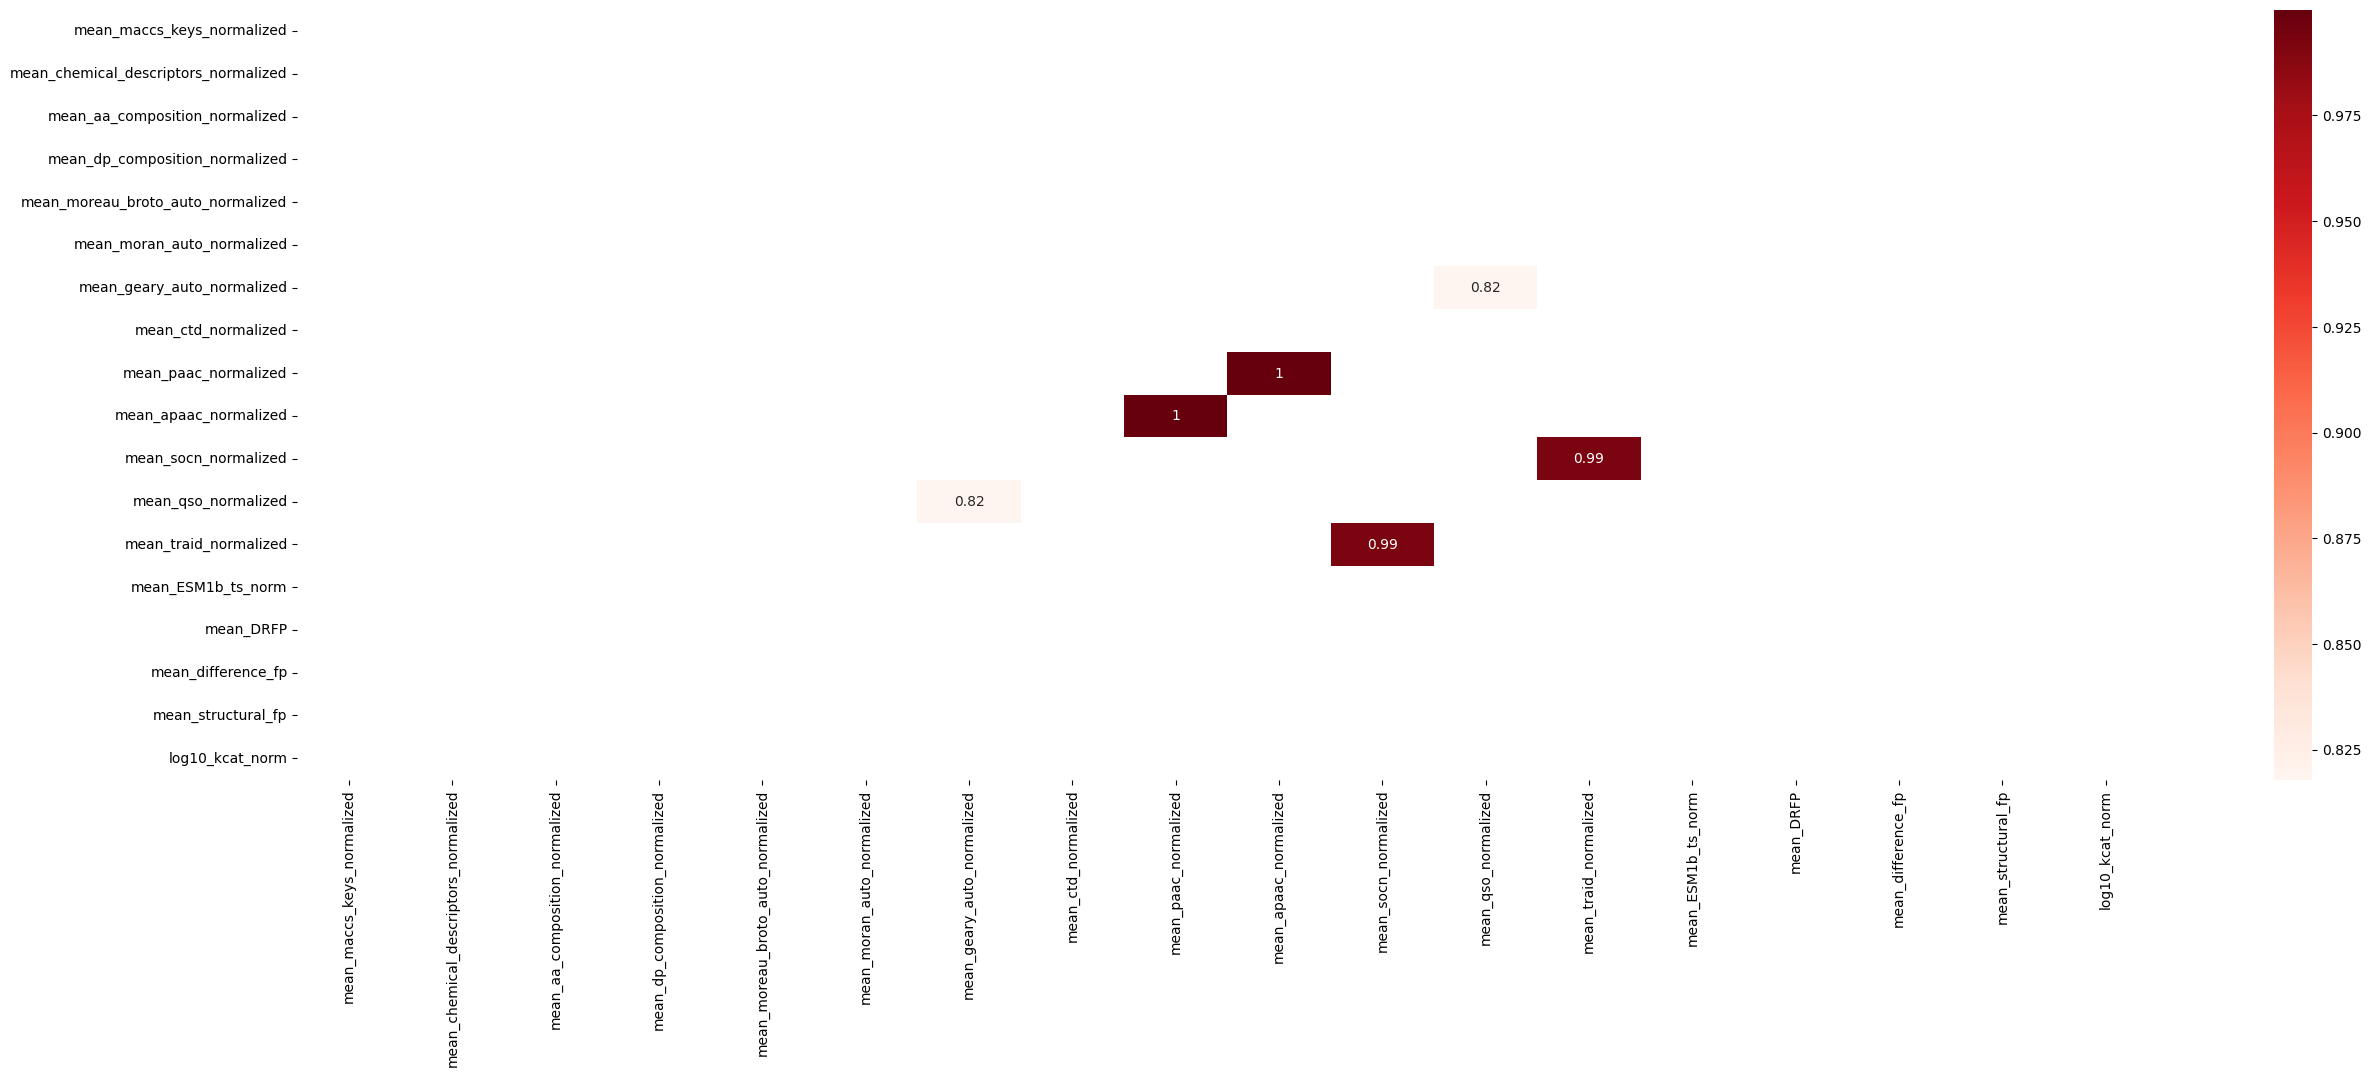

In [ ]:
dfCorr = updated_df.corr().abs()
filteredDf = dfCorr[(dfCorr >= .8) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Features which have high correlation coeffient values between them, we can ignore one of them
- mean_geary_auto_normalized vs mean_qso_normalized (0.82)
- mean_paac_normalized vs mean_apaac_normalized (1)
- mean_socn_normalized vs mean_traid_normalized (0.99)

Above features correlation coefficient with output feature are:
- mean_geary_auto_normalized :  0.034939
- mean_qso_normalized : 0.023000
- mean_paac_normalized : -0.017396
- mean_apaac_normalized :  -0.017396
- mean_socn_normalized : 0.001154
- mean_traid_normalized: 0.011748


only keep high correlated features with output which will be following
- mean_geary_auto_normalized
- mean_paac_normalized
- traid_normalized

feats_to_ignore = ["qso_normalized", "apaac_normalized", "socn_normalized"]

In [ ]:
high_self_corr_feats = ["qso_normalized", "apaac_normalized", "socn_normalized"]

In [ ]:
low_correlation_coeff_with_output = ["mean_moreau_broto_auto_normalized", "mean_chemical_descriptors_normalized", "mean_aa_composition_normalized"]

In [ ]:
all_new_feats = [
    "maccs_keys_normalized",
    "chemical_descriptors_normalized",
    "aa_composition_normalized",
    "dp_composition_normalized",
    "moreau_broto_auto_normalized",
    "moran_auto_normalized",
    "geary_auto_normalized",
    "ctd_normalized",
    "paac_normalized",
    "apaac_normalized",
    "socn_normalized",
    "qso_normalized",
    "traid_normalized",
    "ESM1b_ts_norm",
    "ESM1b_norm",
    "DRFP",
    "difference_fp",
    "structural_fp",
    "log10_kcat_norm"
]



feats_to_ignore = high_self_corr_feats + low_correlation_coeff_with_output

selected_features = set.difference(set(all_new_feats), set(feats_to_ignore))
selected_features

{'DRFP',
 'ESM1b_norm',
 'ESM1b_ts_norm',
 'aa_composition_normalized',
 'chemical_descriptors_normalized',
 'ctd_normalized',
 'difference_fp',
 'dp_composition_normalized',
 'geary_auto_normalized',
 'log10_kcat_norm',
 'maccs_keys_normalized',
 'moran_auto_normalized',
 'moreau_broto_auto_normalized',
 'paac_normalized',
 'structural_fp',
 'traid_normalized'}

In [ ]:
# Subsetting the DataFrame with selected features
train_selected_df = processed_train_df[list(selected_features)]
train_updated_df = get_updated_df(train_selected_df)
train_updated_df.corr()

,mean_maccs_keys_normalized,mean_chemical_descriptors_normalized,mean_aa_composition_normalized,mean_dp_composition_normalized,mean_moreau_broto_auto_normalized,mean_moran_auto_normalized,mean_geary_auto_normalized,mean_ctd_normalized,mean_paac_normalized,mean_traid_normalized,mean_ESM1b_ts_norm,mean_DRFP,mean_difference_fp,mean_structural_fp,log10_kcat_norm
mean_maccs_keys_normalized,1.000000,0.077987,-0.012909,0.017624,-0.033305,-0.041914,-0.003889,0.000999,-0.011037,-0.020048,0.018270,0.000873,-0.197171,-0.047309,-0.029106
mean_chemical_descriptors_normalized,0.077987,1.000000,-0.010267,0.003888,-0.024113,0.002633,-0.000179,-0.006355,-0.002716,-0.014076,0.016127,-0.060250,-0.279794,-0.028584,0.001260
mean_aa_composition_normalized,-0.012909,-0.010267,1.000000,0.012691,0.004961,-0.009507,-0.023622,0.027540,-0.038170,0.004712,0.010661,0.053415,0.012045,0.040310,0.007866
mean_dp_composition_normalized,0.017624,0.003888,0.012691,1.000000,-0.244680,-0.033095,0.199981,-0.053200,-0.057397,0.009919,-0.040613,0.017573,0.005755,-0.031938,0.035111
mean_moreau_broto_auto_normalized,-0.033305,-0.024113,0.004961,-0.244680,1.000000,0.176575,-0.014012,-0.004294,0.049010,0.025579,-0.019453,-0.040945,-0.017882,0.007996,0.000597
mean_moran_auto_normalized,-0.041914,0.002633,-0.009507,-0.033095,0.176575,1.000000,0.014375,0.199185,0.092374,0.311745,-0.082261,-0.003004,-0.038563,0.040720,-0.070615
mean_geary_auto_normalized,-0.003889,-0.000179,-0.023622,0.199981,-0.014012,0.014375,1.000000,0.221936,0.528485,0.123528,-0.237455,-0.078248,0.021795,-0.051138,0.034939
mean_ctd_normalized,0.000999,-0.006355,0.027540,-0.053200,-0.004294,0.199185,0.221936,1.000000,0.206247,0.308624,-0.121483,-0.022172,0.017128,0.010911,0.019861
mean_paac_normalized,-0.011037,-0.002716,-0.038170,-0.057397,0.049010,0.092374,0.528485,0.206247,1.000000,0.100484,-0.113786,-0.043844,0.026175,-0.012853,0.017396
mean_traid_normalized,-0.020048,-0.014076,0.004712,0.009919,0.025579,0.311745,0.123528,0.308624,0.100484,1.000000,-0.004166,-0.098910,-0.028487,-0.109951,0.011748


In [ ]:
# Subsetting the DataFrame with selected features
test_selected_df = processed_test_df[list(selected_features)]
test_updated_df = get_updated_df(test_selected_df)
test_updated_df.corr()

,mean_maccs_keys_normalized,mean_chemical_descriptors_normalized,mean_aa_composition_normalized,mean_dp_composition_normalized,mean_moreau_broto_auto_normalized,mean_moran_auto_normalized,mean_geary_auto_normalized,mean_ctd_normalized,mean_paac_normalized,mean_traid_normalized,mean_ESM1b_ts_norm,mean_DRFP,mean_difference_fp,mean_structural_fp,log10_kcat_norm
mean_maccs_keys_normalized,1.000000,-0.026998,0.047434,0.039118,-0.075139,-0.012180,0.020442,0.082742,0.043628,-0.010497,0.038065,0.029485,-0.028714,-0.110243,0.013822
mean_chemical_descriptors_normalized,-0.026998,1.000000,-0.048168,0.011565,-0.019873,0.039473,-0.038354,0.047446,-0.001797,0.001619,-0.008766,0.017916,-0.107903,-0.102524,0.067745
mean_aa_composition_normalized,0.047434,-0.048168,1.000000,0.056063,-0.040379,0.022013,-0.003283,0.058561,0.061414,-0.003526,0.056367,-0.007407,0.036820,-0.067587,0.015815
mean_dp_composition_normalized,0.039118,0.011565,0.056063,1.000000,-0.251555,-0.108507,0.118352,-0.010024,0.000630,0.052581,0.042819,-0.049556,0.051078,-0.056760,0.028746
mean_moreau_broto_auto_normalized,-0.075139,-0.019873,-0.040379,-0.251555,1.000000,0.221764,-0.100304,0.055885,0.089460,0.024493,-0.007397,-0.050617,-0.015424,-0.034582,0.067971
mean_moran_auto_normalized,-0.012180,0.039473,0.022013,-0.108507,0.221764,1.000000,-0.608622,0.112389,0.116698,0.207392,-0.091077,-0.018114,-0.101430,0.020345,-0.075067
mean_geary_auto_normalized,0.020442,-0.038354,-0.003283,0.118352,-0.100304,-0.608622,1.000000,0.130198,-0.025813,0.131805,-0.024801,-0.073628,0.080527,-0.107444,0.151212
mean_ctd_normalized,0.082742,0.047446,0.058561,-0.010024,0.055885,0.112389,0.130198,1.000000,0.122394,0.272475,0.044683,0.089537,0.134198,-0.013957,-0.041325
mean_paac_normalized,0.043628,-0.001797,0.061414,0.000630,0.089460,0.116698,-0.025813,0.122394,1.000000,0.060544,0.040974,-0.016885,-0.026442,-0.057929,-0.006058
mean_traid_normalized,-0.010497,0.001619,-0.003526,0.052581,0.024493,0.207392,0.131805,0.272475,0.060544,1.000000,-0.039493,-0.027166,-0.008804,-0.039895,0.022508


In [ ]:
test_selected_df.to_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_cnn_features.pkl"))
train_selected_df.to_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_cnn_features.pkl"))